# Group 8
## Labour Datasets EDA analysis

### Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
plt.rcParams['figure.figsize'] = [14, 8]
plt.rcParams['font.size'] = 12

### Load datasets from Google Drive

In [ ]:
base_path = "/content/drive/MyDrive/Design_Project/"

# Load each dataset
lfs_month = pd.read_csv(base_path + "lfs_month.csv")
lfs_month_sa = pd.read_csv(base_path + "lfs_month_sa.csv")
lfs_month_youth = pd.read_csv(base_path + "lfs_month_youth.csv")
lfs_month_duration = pd.read_csv(base_path + "lfs_month_duration.csv")
lfs_month_status = pd.read_csv(base_path + "lfs_month_status.csv")

# Display basic information about the datasets
print("Datasets loaded successfully!")

Datasets loaded successfully!


### Dataset Structure

In [ ]:
def examine_dataset(df, name):
    print(f"\n{'-'*40}\nDataset: {name}\n{'-'*40}")
    print(f"Shape: {df.shape}")
    print("\nFirst 5 rows:")
    print(df.head())
    print("\nData types:")
    print(df.dtypes)
    print("\nBasic statistics:")
    print(df.describe())
    print("\nMissing values:")
    print(df.isnull().sum())
    print(f"{'-'*40}\n")

# Examine each dataset
examine_dataset(lfs_month, "Labor Force Survey Monthly")
examine_dataset(lfs_month_sa, "Labor Force Survey Monthly (Seasonally Adjusted)")
examine_dataset(lfs_month_youth, "Labor Force Survey Monthly (Youth)")
examine_dataset(lfs_month_duration, "Labor Force Survey Monthly (Unemployment Duration)")
examine_dataset(lfs_month_status, "Labor Force Survey Monthly (Employment Status)")


----------------------------------------
Dataset: Labor Force Survey Monthly
----------------------------------------
Shape: (182, 8)

First 5 rows:
         date       lf  lf_employed  lf_unemployed  lf_outside  p_rate  \
0  2010-01-01  12367.9      11931.2          436.7      6927.5    64.1   
1  2010-02-01  12059.8      11632.3          427.4      7225.1    62.5   
2  2010-03-01  12324.2      11895.9          428.3      6993.0    63.8   
3  2010-04-01  12512.0      12133.5          378.5      6894.5    64.5   
4  2010-05-01  12197.6      11798.9          398.7      7186.0    62.9   

   ep_ratio  u_rate  
0      61.8     3.5  
1      60.3     3.5  
2      61.6     3.5  
3      62.5     3.0  
4      60.9     3.3  

Data types:
date              object
lf               float64
lf_employed      float64
lf_unemployed    float64
lf_outside       float64
p_rate           float64
ep_ratio         float64
u_rate           float64
dtype: object

Basic statistics:
                 lf   lf_em

### Data preparation for temporal analaysis

In [ ]:
# Convert date columns to datetime
for df in [lfs_month, lfs_month_sa, lfs_month_youth, lfs_month_duration]:
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])

# Set date as index for time series analysis
lfs_month_indexed = lfs_month.set_index('date')
lfs_month_sa_indexed = lfs_month_sa.set_index('date')

### Unemployment rate trends over time

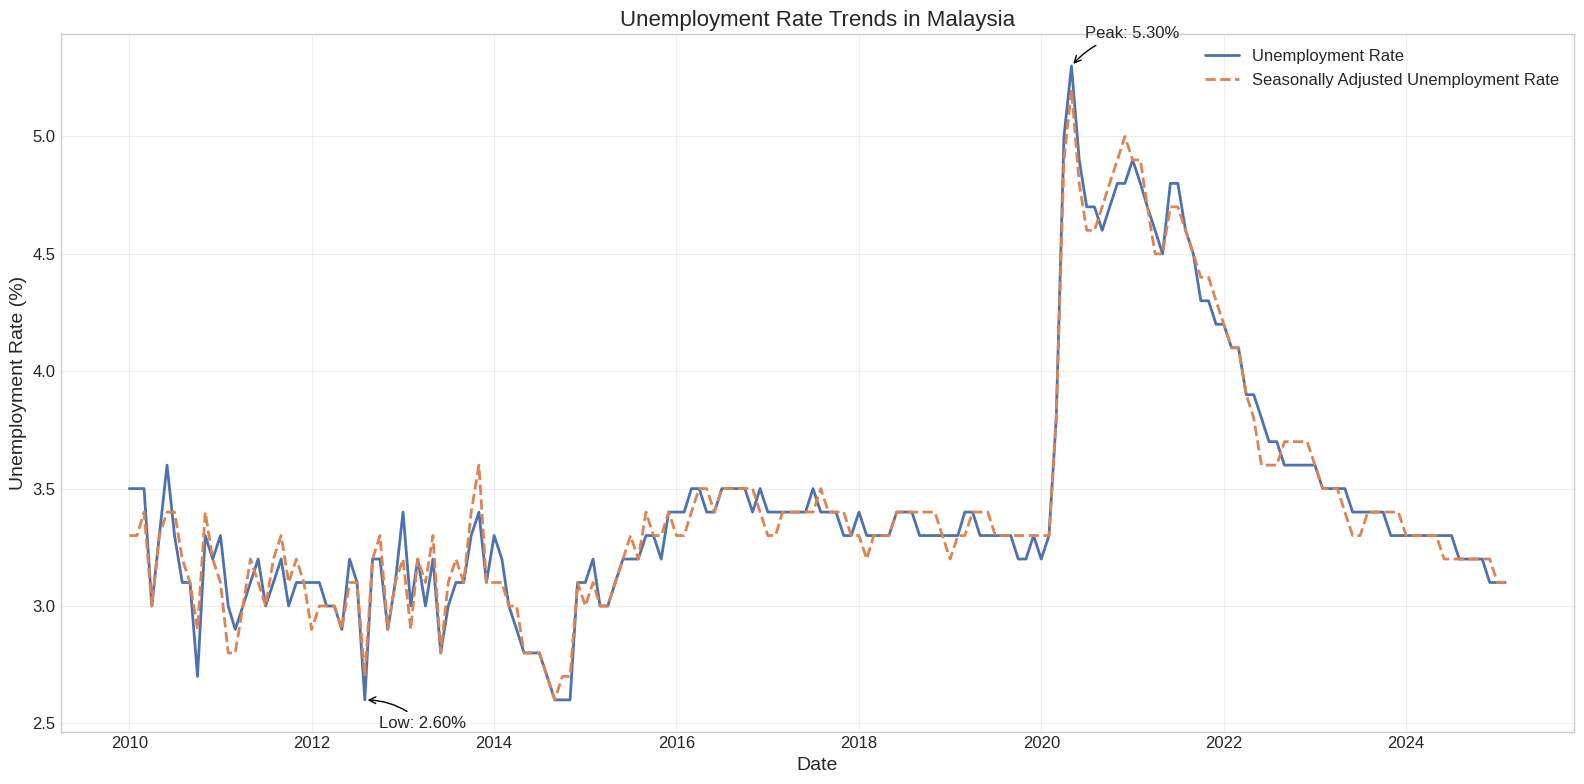

In [ ]:
plt.figure(figsize=(16, 8))

# Original unemployment rate
plt.plot(lfs_month_indexed.index, lfs_month_indexed['u_rate'],
         label='Unemployment Rate', linewidth=2)

# Seasonally adjusted unemployment rate
plt.plot(lfs_month_sa_indexed.index, lfs_month_sa_indexed['u_rate'],
         label='Seasonally Adjusted Unemployment Rate', linewidth=2, linestyle='--')

plt.title('Unemployment Rate Trends in Malaysia', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployment Rate (%)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Add annotations for major events or peaks if applicable
# Identify highest and lowest points
max_point = lfs_month_indexed['u_rate'].idxmax()
min_point = lfs_month_indexed['u_rate'].idxmin()

plt.annotate(f'Peak: {lfs_month_indexed["u_rate"].max():.2f}%',
             xy=(max_point, lfs_month_indexed.loc[max_point, 'u_rate']),
             xytext=(10, 20), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

plt.annotate(f'Low: {lfs_month_indexed["u_rate"].min():.2f}%',
             xy=(min_point, lfs_month_indexed.loc[min_point, 'u_rate']),
             xytext=(10, -20), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

plt.tight_layout()
plt.show()

### Analyze seasonal patterns in unemployment

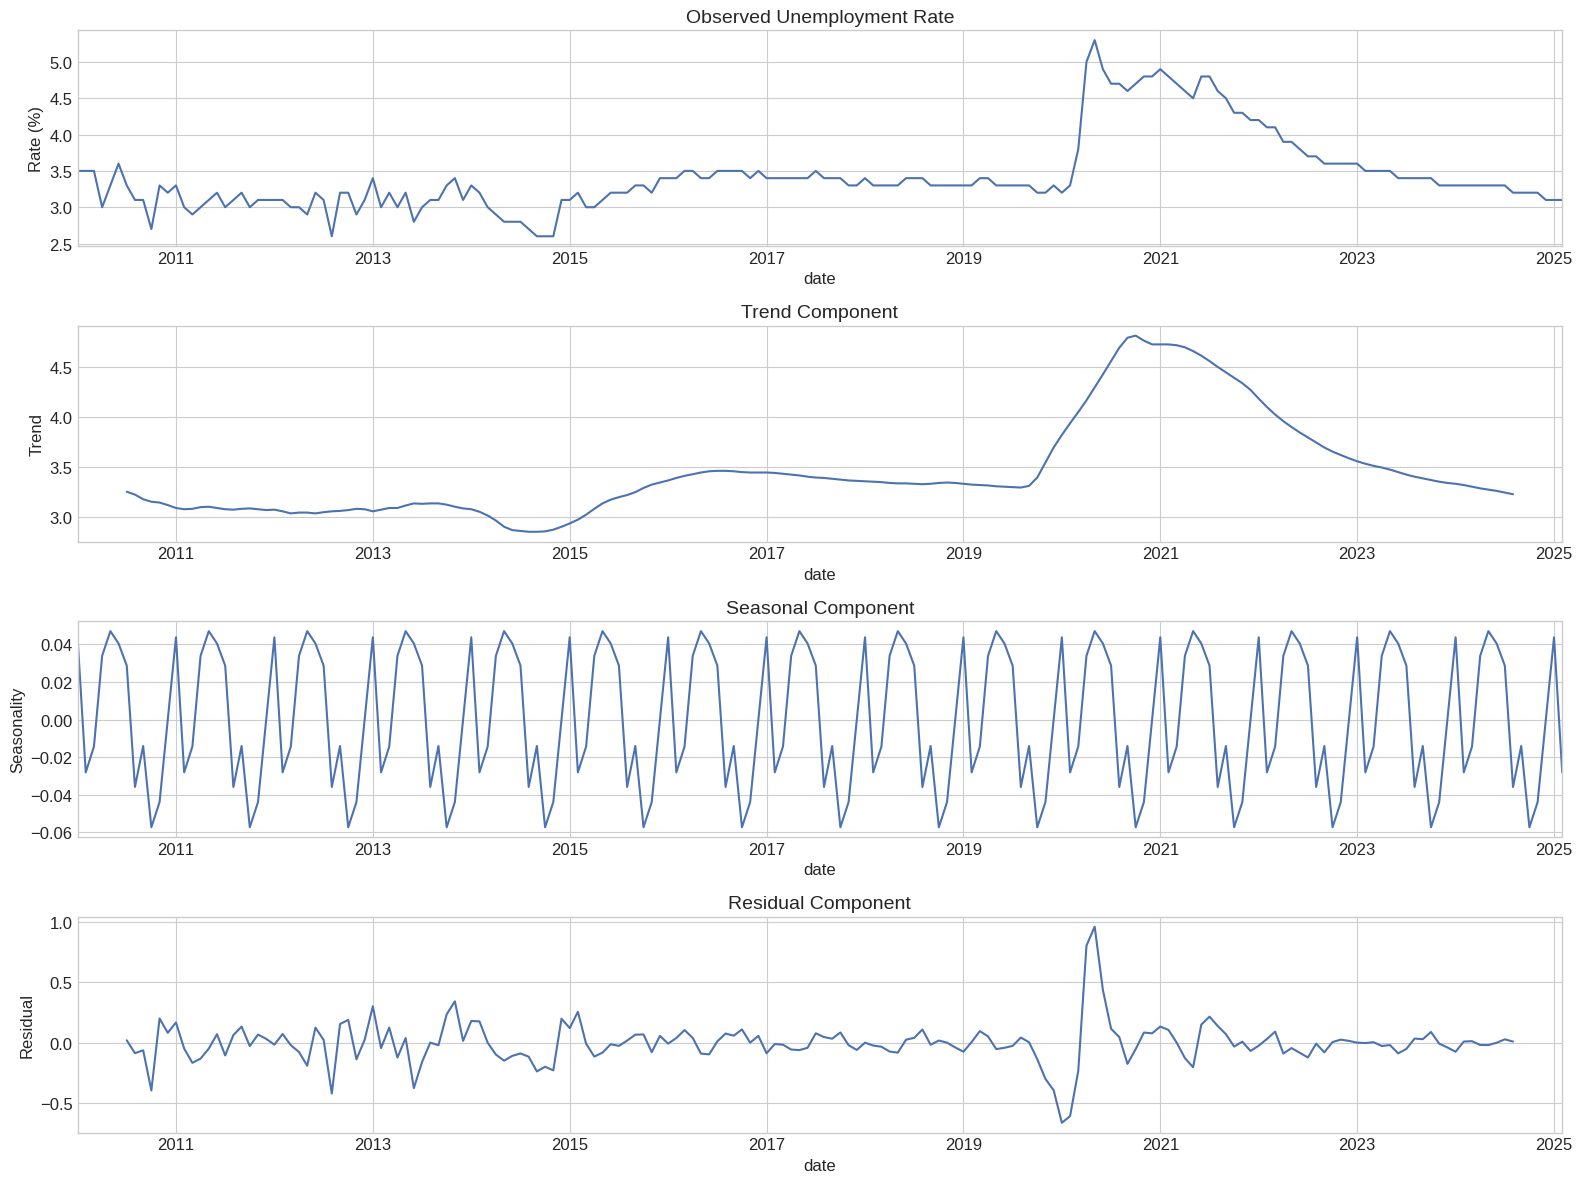

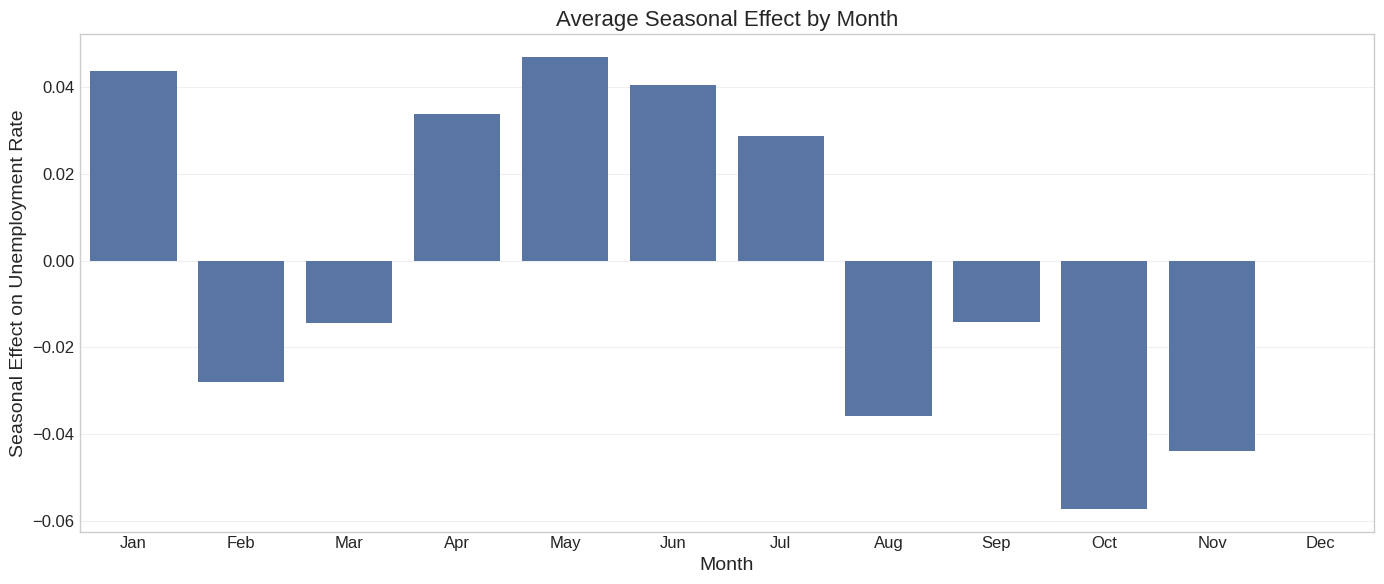

In [ ]:
if len(lfs_month_indexed) >= 24:
    decomposition = seasonal_decompose(lfs_month_indexed['u_rate'], model='additive', period=12)

    # Plot the decomposition
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 12))

    decomposition.observed.plot(ax=ax1)
    ax1.set_title('Observed Unemployment Rate', fontsize=14)
    ax1.set_ylabel('Rate (%)')

    decomposition.trend.plot(ax=ax2)
    ax2.set_title('Trend Component', fontsize=14)
    ax2.set_ylabel('Trend')

    decomposition.seasonal.plot(ax=ax3)
    ax3.set_title('Seasonal Component', fontsize=14)
    ax3.set_ylabel('Seasonality')

    decomposition.resid.plot(ax=ax4)
    ax4.set_title('Residual Component', fontsize=14)
    ax4.set_ylabel('Residual')

    plt.tight_layout()
    plt.show()

    # Monthly seasonal patterns
    plt.figure(figsize=(14, 6))
    seasonal_patterns = decomposition.seasonal.reset_index()
    seasonal_patterns['month'] = seasonal_patterns['date'].dt.month
    monthly_avg = seasonal_patterns.groupby('month')['seasonal'].mean()

    sns.barplot(x=monthly_avg.index, y=monthly_avg.values)
    plt.title('Average Seasonal Effect by Month', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Seasonal Effect on Unemployment Rate', fontsize=14)
    plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Not enough data for seasonal decomposition. Need at least 24 months.")

## **Strutural Analysis**

### Employment status data

In [ ]:
if 'variable' in lfs_month_status.columns:
    lfs_status_wide = lfs_month_status.copy()
    lfs_status_wide['date'] = pd.to_datetime(lfs_status_wide['date'])
else:
    lfs_status_wide = lfs_month_status.copy()
    lfs_status_wide['date'] = pd.to_datetime(lfs_status_wide['date'])

### Employment Status trends

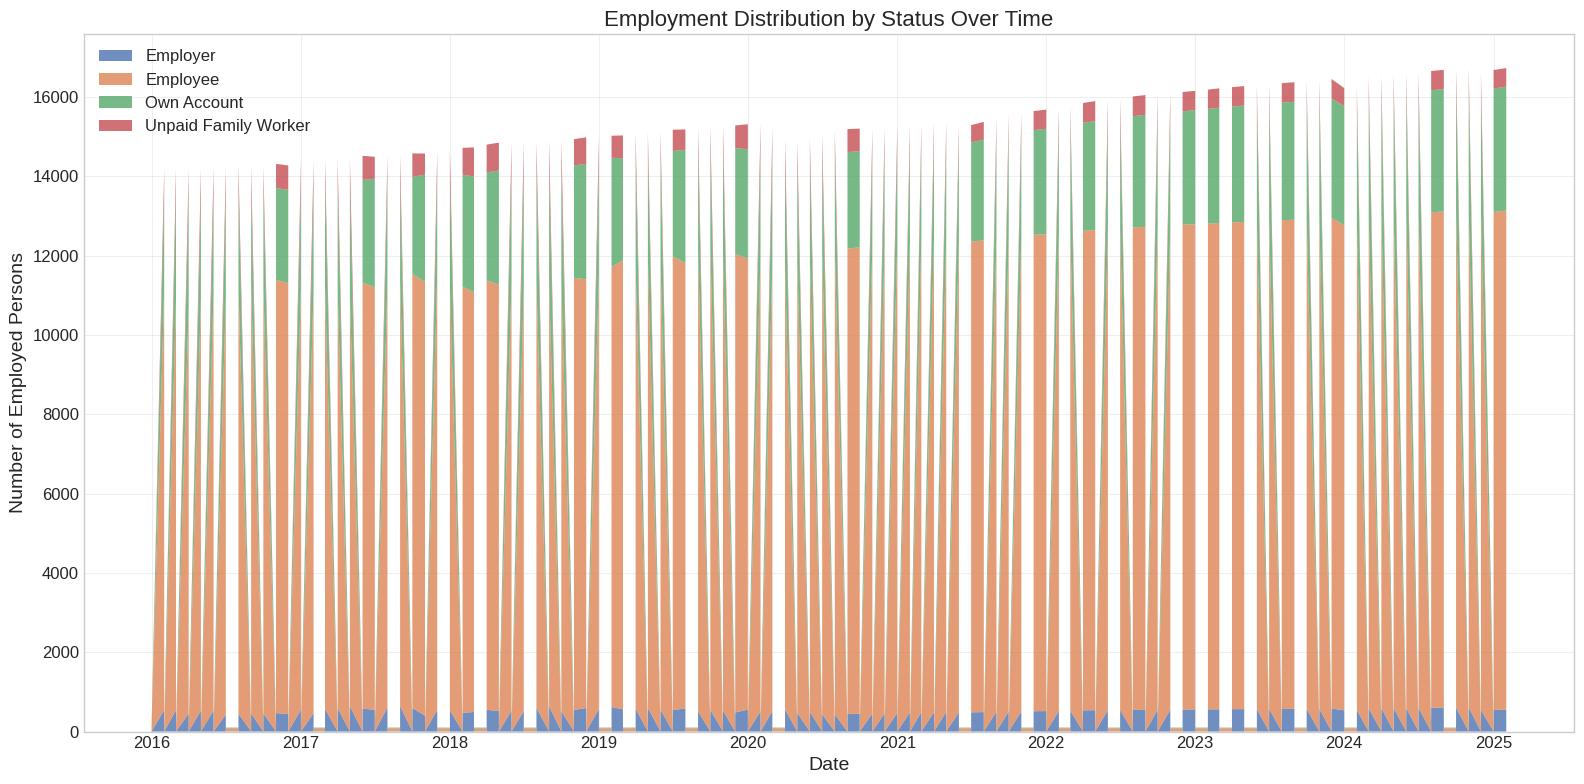

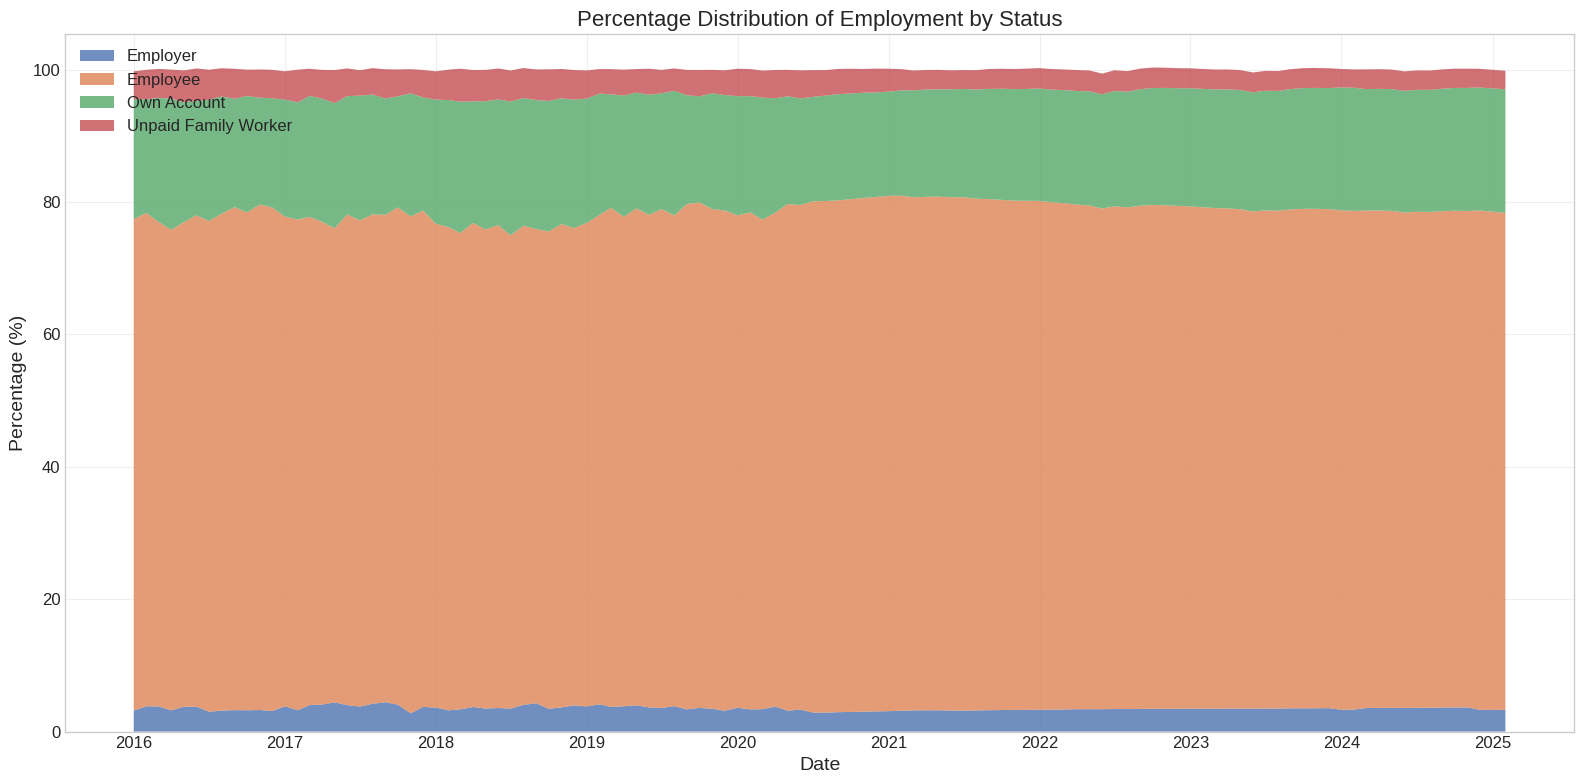

In [ ]:
if 'employed_employer' in lfs_status_wide.columns and 'employed_employee' in lfs_status_wide.columns:
    plt.figure(figsize=(16, 8))

    # Sort by date
    lfs_status_wide = lfs_status_wide.sort_values('date')

    # Stack plot for employment status
    plt.stackplot(lfs_status_wide['date'],
                 lfs_status_wide['employed_employer'],
                 lfs_status_wide['employed_employee'],
                 lfs_status_wide['employed_own_account'],
                 lfs_status_wide['employed_unpaid_family'],
                 labels=['Employer', 'Employee', 'Own Account', 'Unpaid Family Worker'],
                 alpha=0.8)

    plt.title('Employment Distribution by Status Over Time', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Number of Employed Persons', fontsize=14)
    plt.legend(loc='upper left', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Calculate percentage distribution
    status_cols = ['employed_employer', 'employed_employee', 'employed_own_account', 'employed_unpaid_family']
    for col in status_cols:
        lfs_status_wide[f'{col}_pct'] = lfs_status_wide[col] / lfs_status_wide['employed'] * 100

    # Plot percentage distribution
    plt.figure(figsize=(16, 8))
    plt.stackplot(lfs_status_wide['date'],
                 lfs_status_wide['employed_employer_pct'],
                 lfs_status_wide['employed_employee_pct'],
                 lfs_status_wide['employed_own_account_pct'],
                 lfs_status_wide['employed_unpaid_family_pct'],
                 labels=['Employer', 'Employee', 'Own Account', 'Unpaid Family Worker'],
                 alpha=0.8)

    plt.title('Percentage Distribution of Employment by Status', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Percentage (%)', fontsize=14)
    plt.legend(loc='upper left', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Required columns for employment status analysis not found in the dataset.")

### Employment Category Shifts: Start vs End Period



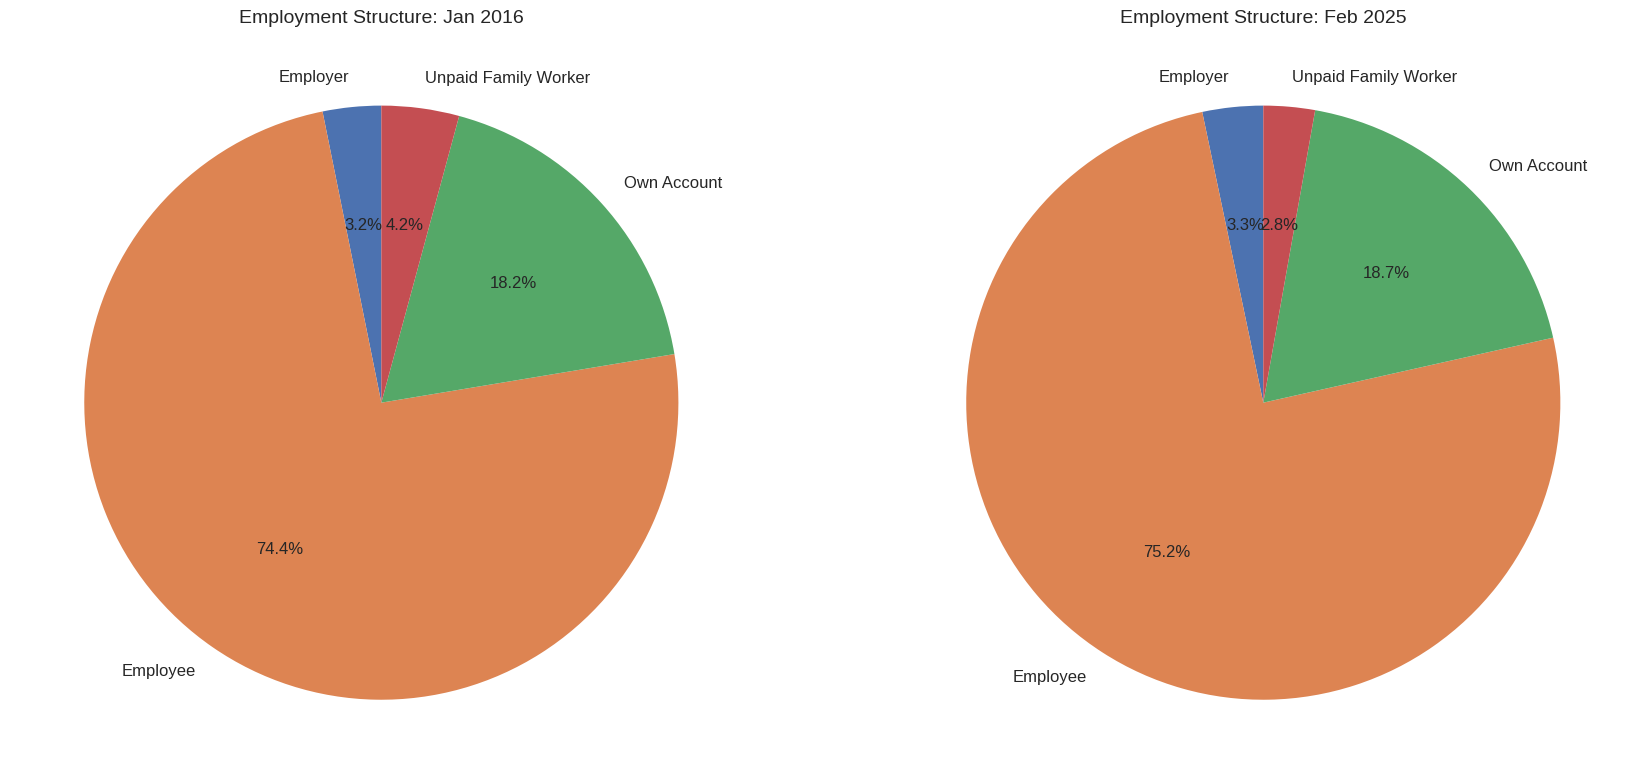

Changes in Employment Structure:
               Category    Start    End  Absolute Change  Percentage Change
0              Employer    449.0   3.29          -445.71         -99.267261
1              Employee  10534.1  75.08        -10459.02         -99.287267
2           Own Account   2570.3  18.66         -2551.64         -99.274015
3  Unpaid Family Worker    597.1   2.79          -594.31         -99.532742


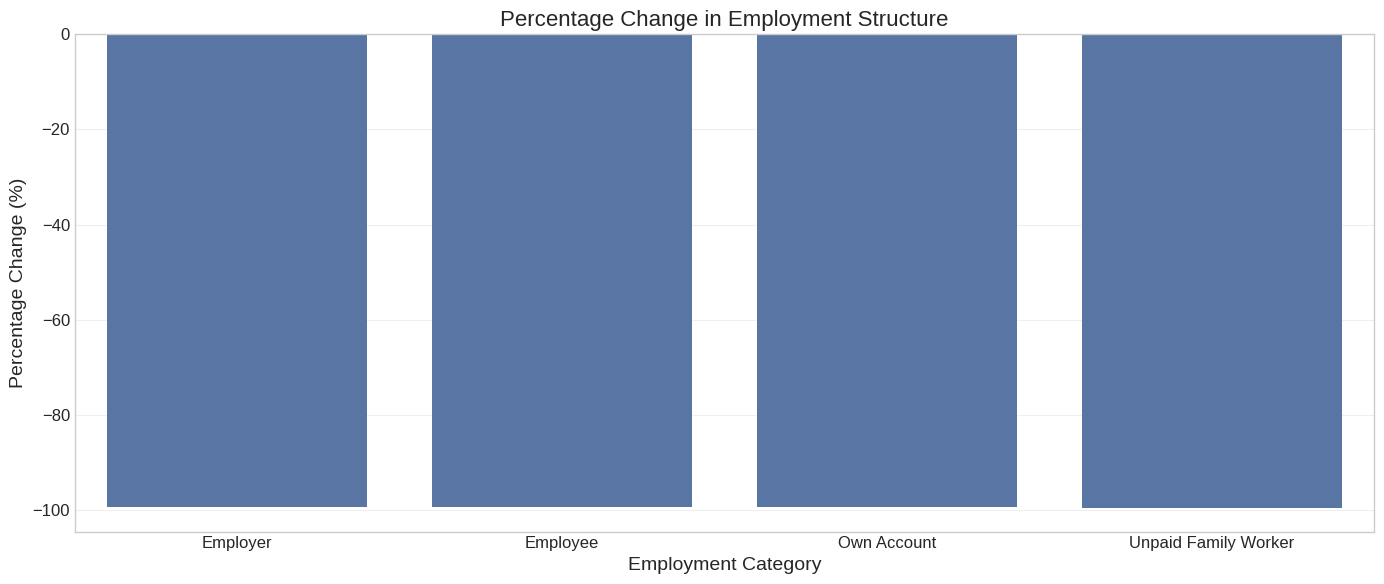

In [ ]:
if 'employed_employer' in lfs_status_wide.columns:
    # Get the earliest and latest periods
    earliest_period = lfs_status_wide.sort_values('date').iloc[0]
    latest_period = lfs_status_wide.sort_values('date').iloc[-1]

    # Data for pie charts
    status_cols = ['employed_employer', 'employed_employee', 'employed_own_account', 'employed_unpaid_family']
    labels = ['Employer', 'Employee', 'Own Account', 'Unpaid Family Worker']

    earliest_data = [earliest_period[col] for col in status_cols]
    latest_data = [latest_period[col] for col in status_cols]

    # Create pie charts
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

    ax1.pie(earliest_data, labels=labels, autopct='%1.1f%%', startangle=90, shadow=False)
    ax1.set_title(f'Employment Structure: {earliest_period["date"].strftime("%b %Y")}', fontsize=14)

    ax2.pie(latest_data, labels=labels, autopct='%1.1f%%', startangle=90, shadow=False)
    ax2.set_title(f'Employment Structure: {latest_period["date"].strftime("%b %Y")}', fontsize=14)

    plt.tight_layout()
    plt.show()

    # Calculate absolute and percentage changes
    changes = pd.DataFrame({
        'Category': labels,
        'Start': earliest_data,
        'End': latest_data,
        'Absolute Change': [latest_data[i] - earliest_data[i] for i in range(len(labels))],
        'Percentage Change': [(latest_data[i] - earliest_data[i])/earliest_data[i]*100 if earliest_data[i] > 0 else float('inf') for i in range(len(labels))]
    })

    # Displaying changes
    print("Changes in Employment Structure:")
    print(changes)

    # Plot the changes
    plt.figure(figsize=(14, 6))
    sns.barplot(x='Category', y='Percentage Change', data=changes)
    plt.title('Percentage Change in Employment Structure', fontsize=16)
    plt.xlabel('Employment Category', fontsize=14)
    plt.ylabel('Percentage Change (%)', fontsize=14)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Required columns for employment structure change analysis not found in the dataset.")

Duration Based Unemployment Analysis

In [ ]:
# Convert date to datetime 
lfs_month_duration['date'] = pd.to_datetime(lfs_month_duration['date'])
lfs_duration_indexed = lfs_month_duration.set_index('date')

duration_cols = ['unemployed_active_3mo', 'unemployed_active_6mo',
                'unemployed_active_12mo', 'unemployed_active_long']

### Unemployment visualization by duration categories

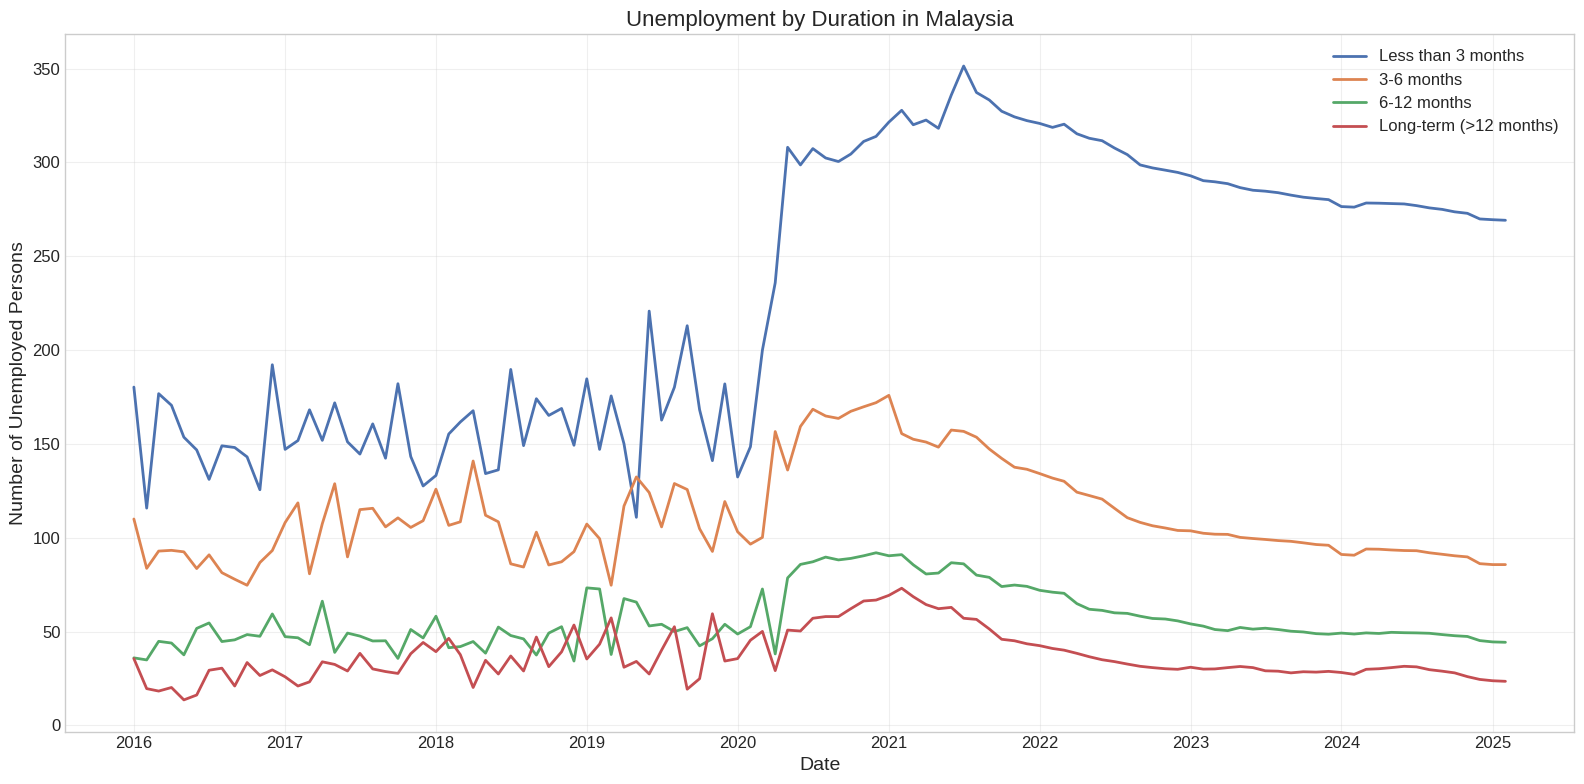

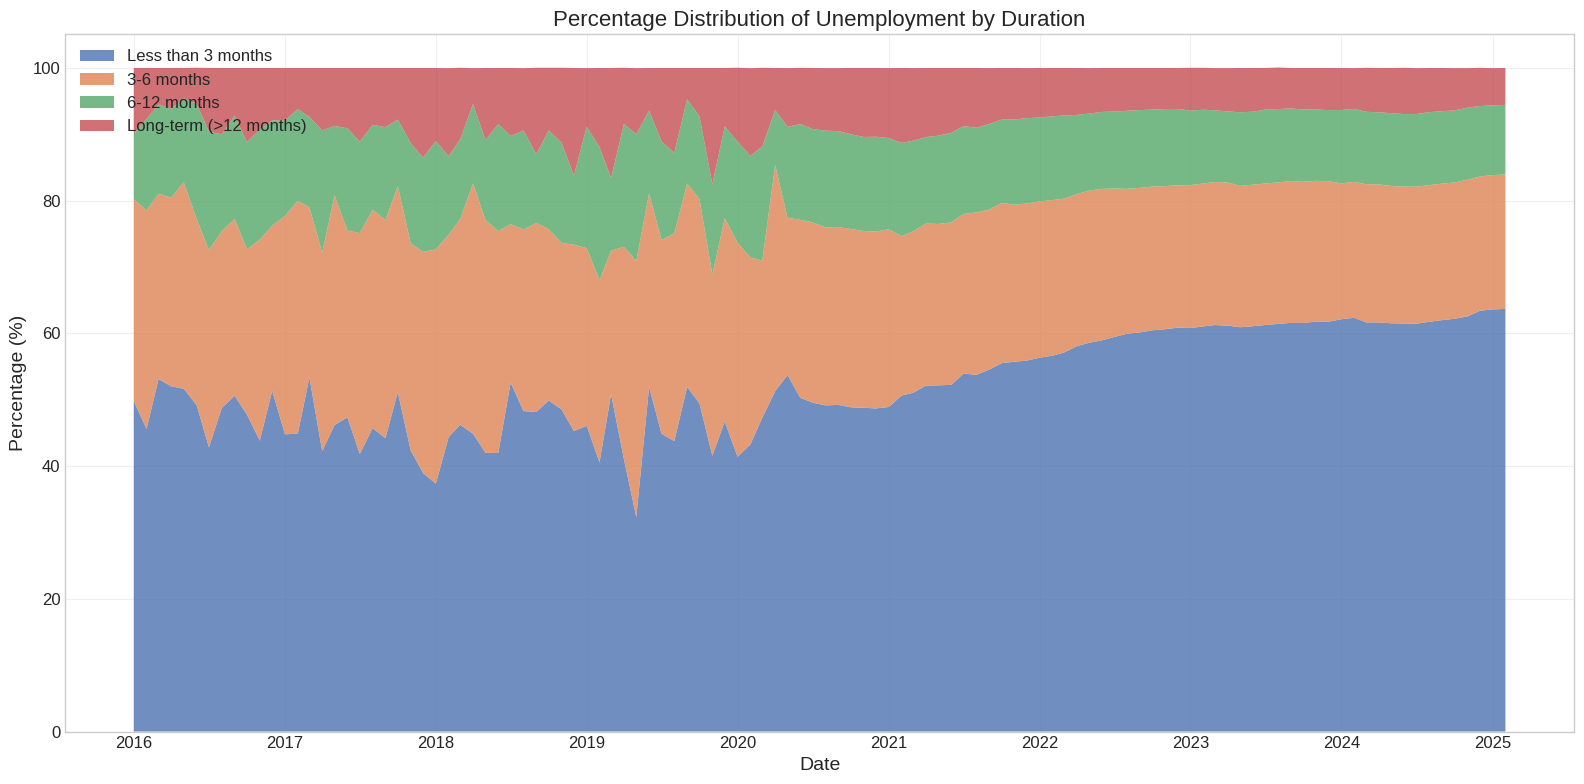

In [ ]:
if all(col in lfs_month_duration.columns for col in duration_cols):
    plt.figure(figsize=(16, 8))

    # Different cattegories plot
    plt.plot(lfs_month_duration['date'], lfs_month_duration['unemployed_active_3mo'],
             label='Less than 3 months', linewidth=2)
    plt.plot(lfs_month_duration['date'], lfs_month_duration['unemployed_active_6mo'],
             label='3-6 months', linewidth=2)
    plt.plot(lfs_month_duration['date'], lfs_month_duration['unemployed_active_12mo'],
             label='6-12 months', linewidth=2)
    plt.plot(lfs_month_duration['date'], lfs_month_duration['unemployed_active_long'],
             label='Long-term (>12 months)', linewidth=2)

    plt.title('Unemployment by Duration in Malaysia', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Number of Unemployed Persons', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Calculate percentage of total active unemployment for each duration category
    for col in duration_cols:
        lfs_month_duration[f'{col}_pct'] = lfs_month_duration[col] / lfs_month_duration['unemployed_active'] * 100

    # Stacked area chart for percentage distribution
    plt.figure(figsize=(16, 8))
    plt.stackplot(lfs_month_duration['date'],
                 lfs_month_duration['unemployed_active_3mo_pct'],
                 lfs_month_duration['unemployed_active_6mo_pct'],
                 lfs_month_duration['unemployed_active_12mo_pct'],
                 lfs_month_duration['unemployed_active_long_pct'],
                 labels=['Less than 3 months', '3-6 months', '6-12 months', 'Long-term (>12 months)'],
                 alpha=0.8)

    plt.title('Percentage Distribution of Unemployment by Duration', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Percentage (%)', fontsize=14)
    plt.legend(loc='upper left', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Required columns for unemployment duration analysis not found in the dataset.")

### Analysis of long-term unemployment trends

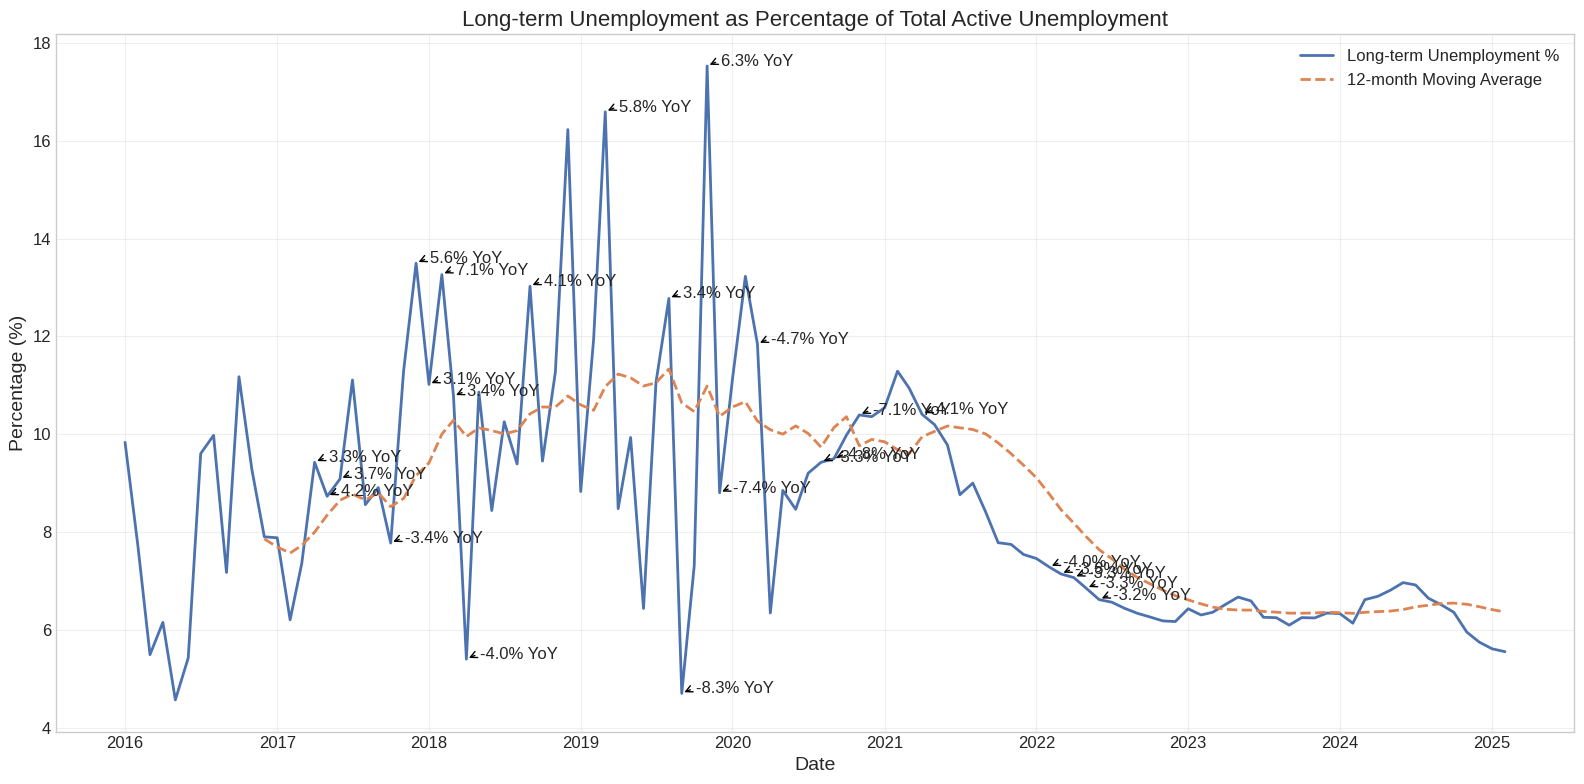

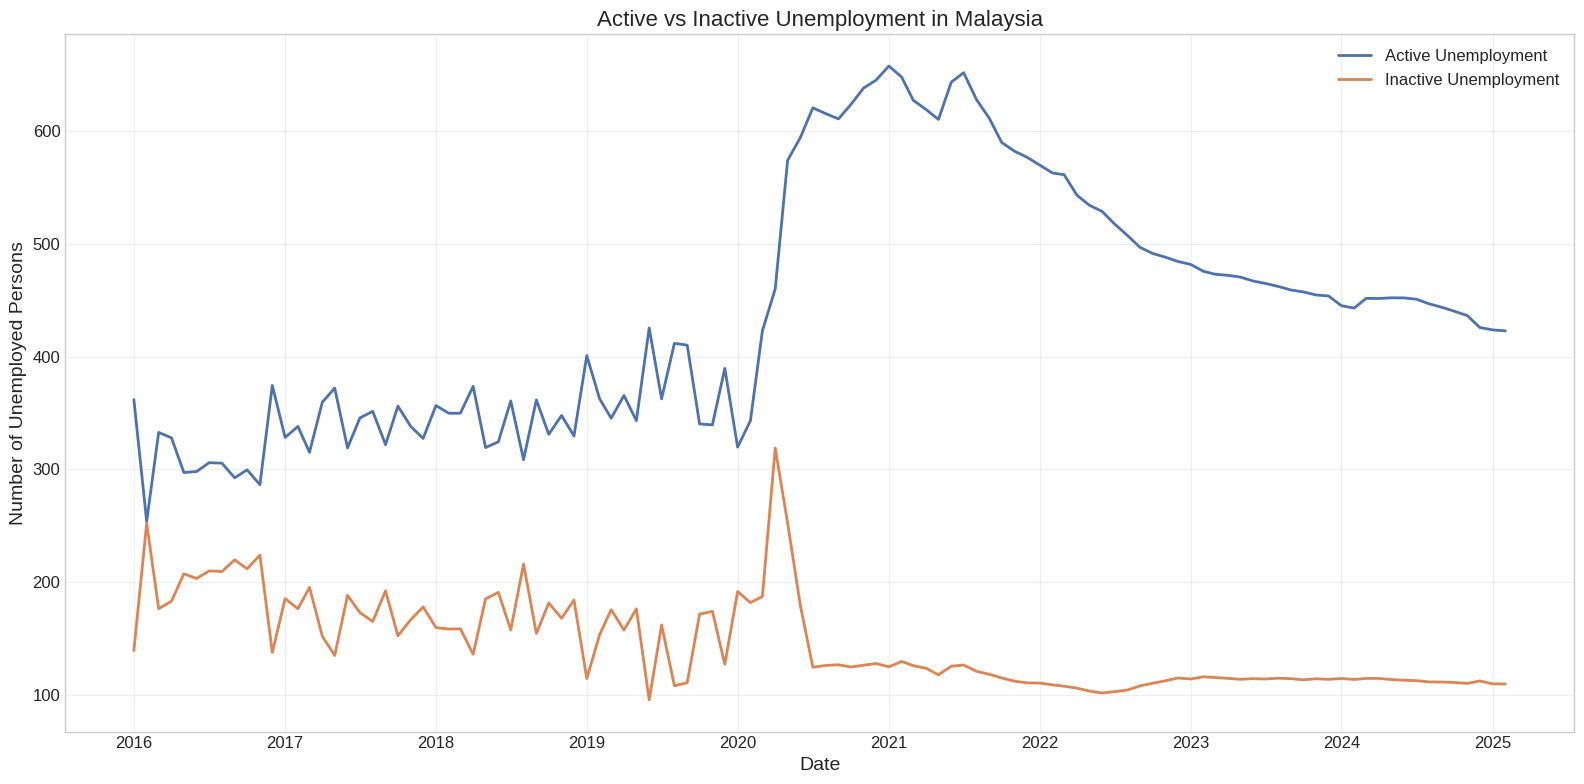

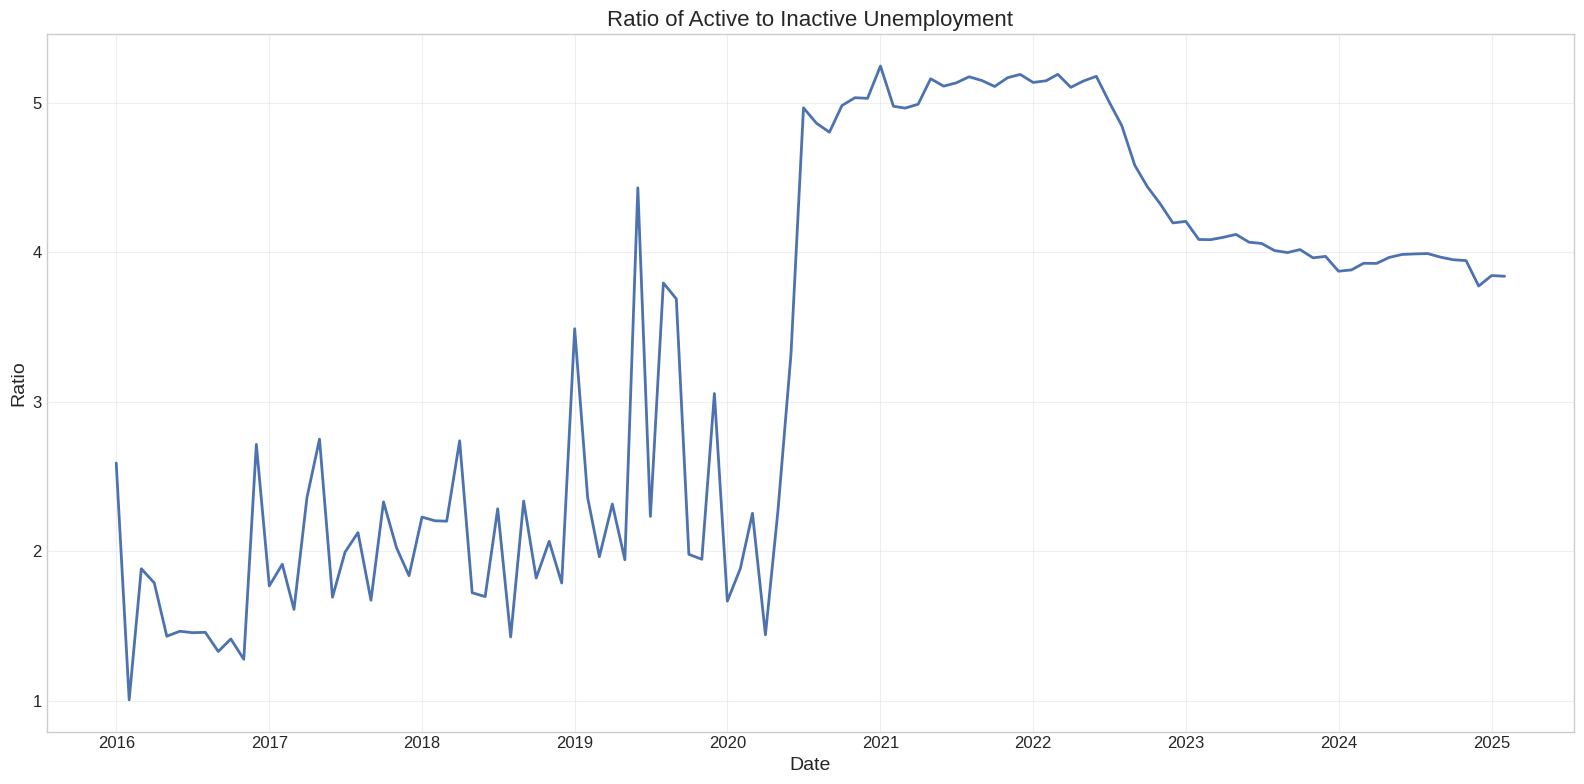

In [ ]:
if 'unemployed_active_long' in lfs_month_duration.columns and 'unemployed_active' in lfs_month_duration.columns:
    # Calculate long-term unemployment as percentage of total unemployment
    lfs_month_duration['long_term_pct'] = lfs_month_duration['unemployed_active_long'] / lfs_month_duration['unemployed_active'] * 100

    # Plot
    plt.figure(figsize=(16, 8))
    plt.plot(lfs_month_duration['date'], lfs_month_duration['long_term_pct'],
             label='Long-term Unemployment %', linewidth=2)

    # Rolling average
    rolling_avg = lfs_month_duration['long_term_pct'].rolling(window=12).mean()
    plt.plot(lfs_month_duration['date'], rolling_avg,
             label='12-month Moving Average', linewidth=2, linestyle='--')

    plt.title('Long-term Unemployment as Percentage of Total Active Unemployment', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Percentage (%)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)

    # Find trends or changes over time
    window_size = 12  # 12 months
    if len(lfs_month_duration) >= window_size * 2:
        # Calculate year-over-year changes
        lfs_month_duration['yoy_change'] = lfs_month_duration['long_term_pct'].diff(periods=12)

        # Identify periods of significant increase or decrease
        threshold = lfs_month_duration['yoy_change'].abs().mean() * 1.5
        significant_periods = lfs_month_duration[lfs_month_duration['yoy_change'].abs() > threshold]

        for idx, row in significant_periods.iterrows():
            plt.annotate(f'{row["yoy_change"]:.1f}% YoY',
                     xy=(row['date'], row['long_term_pct']),
                     xytext=(10, 0), textcoords='offset points',
                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

    plt.tight_layout()
    plt.show()

    # Compare active vs inactive unemployment
    if 'unemployed_inactive' in lfs_month_duration.columns:
        plt.figure(figsize=(16, 8))

        plt.plot(lfs_month_duration['date'], lfs_month_duration['unemployed_active'],
                 label='Active Unemployment', linewidth=2)
        plt.plot(lfs_month_duration['date'], lfs_month_duration['unemployed_inactive'],
                 label='Inactive Unemployment', linewidth=2)

        plt.title('Active vs Inactive Unemployment in Malaysia', fontsize=16)
        plt.xlabel('Date', fontsize=14)
        plt.ylabel('Number of Unemployed Persons', fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        # Calculate ratio of active to inactive
        lfs_month_duration['active_to_inactive_ratio'] = lfs_month_duration['unemployed_active'] / lfs_month_duration['unemployed_inactive']

        plt.figure(figsize=(16, 8))
        plt.plot(lfs_month_duration['date'], lfs_month_duration['active_to_inactive_ratio'],
                 linewidth=2)

        plt.title('Ratio of Active to Inactive Unemployment', fontsize=16)
        plt.xlabel('Date', fontsize=14)
        plt.ylabel('Ratio', fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
else:
    print("Required columns for long-term unemployment analysis not found in the dataset.")

Youth Employment Analysis

In [ ]:
# Convert date to datetime
lfs_month_youth['date'] = pd.to_datetime(lfs_month_youth['date'])
lfs_youth_indexed = lfs_month_youth.set_index('date')

# Get general unemployment rate from the main dataset for comparison
if 'u_rate' in lfs_month.columns:
    lfs_month['date'] = pd.to_datetime(lfs_month['date'])
    u_rate_general = lfs_month.set_index('date')['u_rate']
else:
    print("General unemployment rate not found in the main dataset.")

### Comparison of youth unemployment and general unemployment

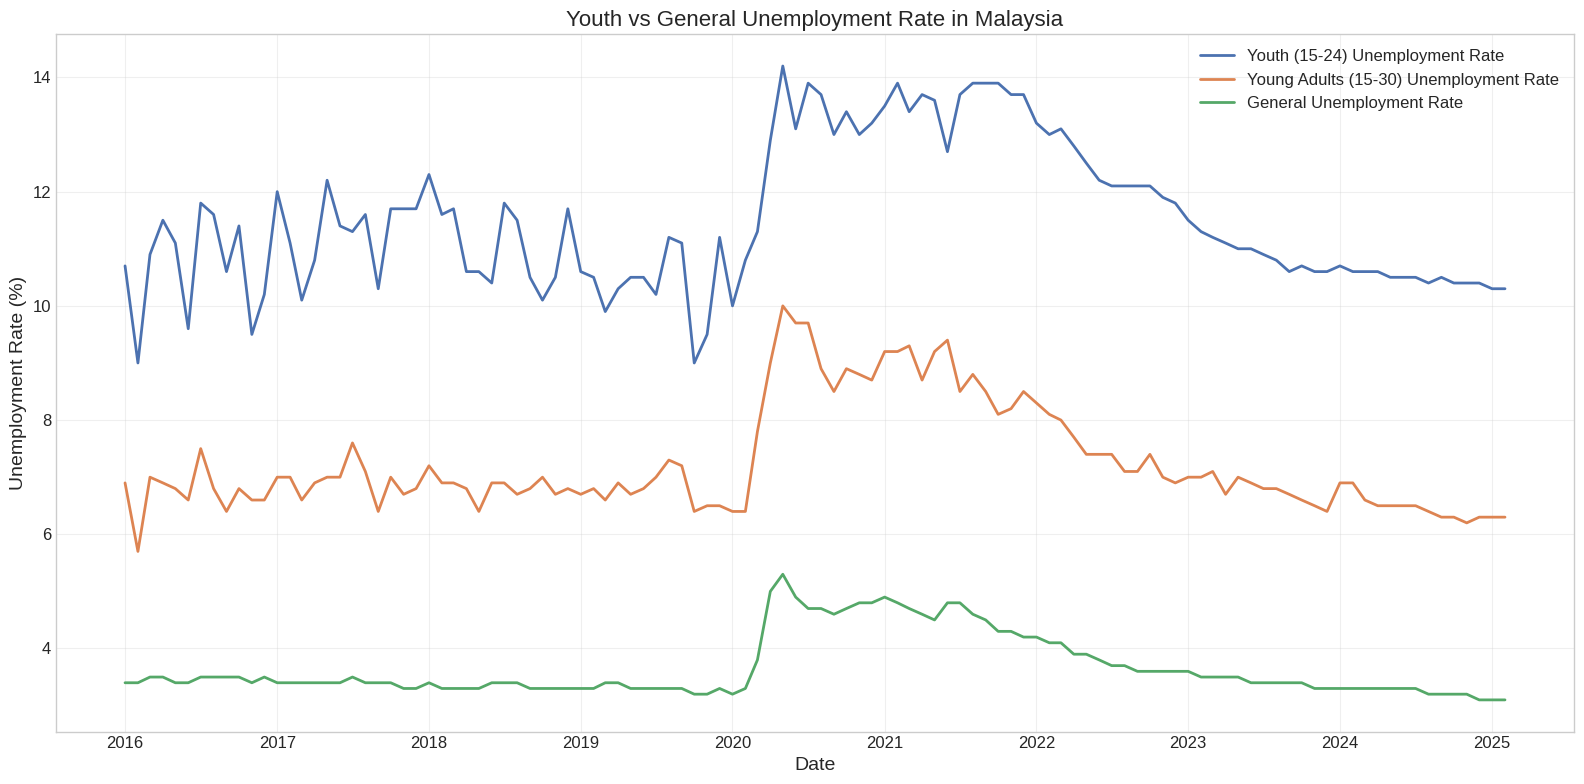

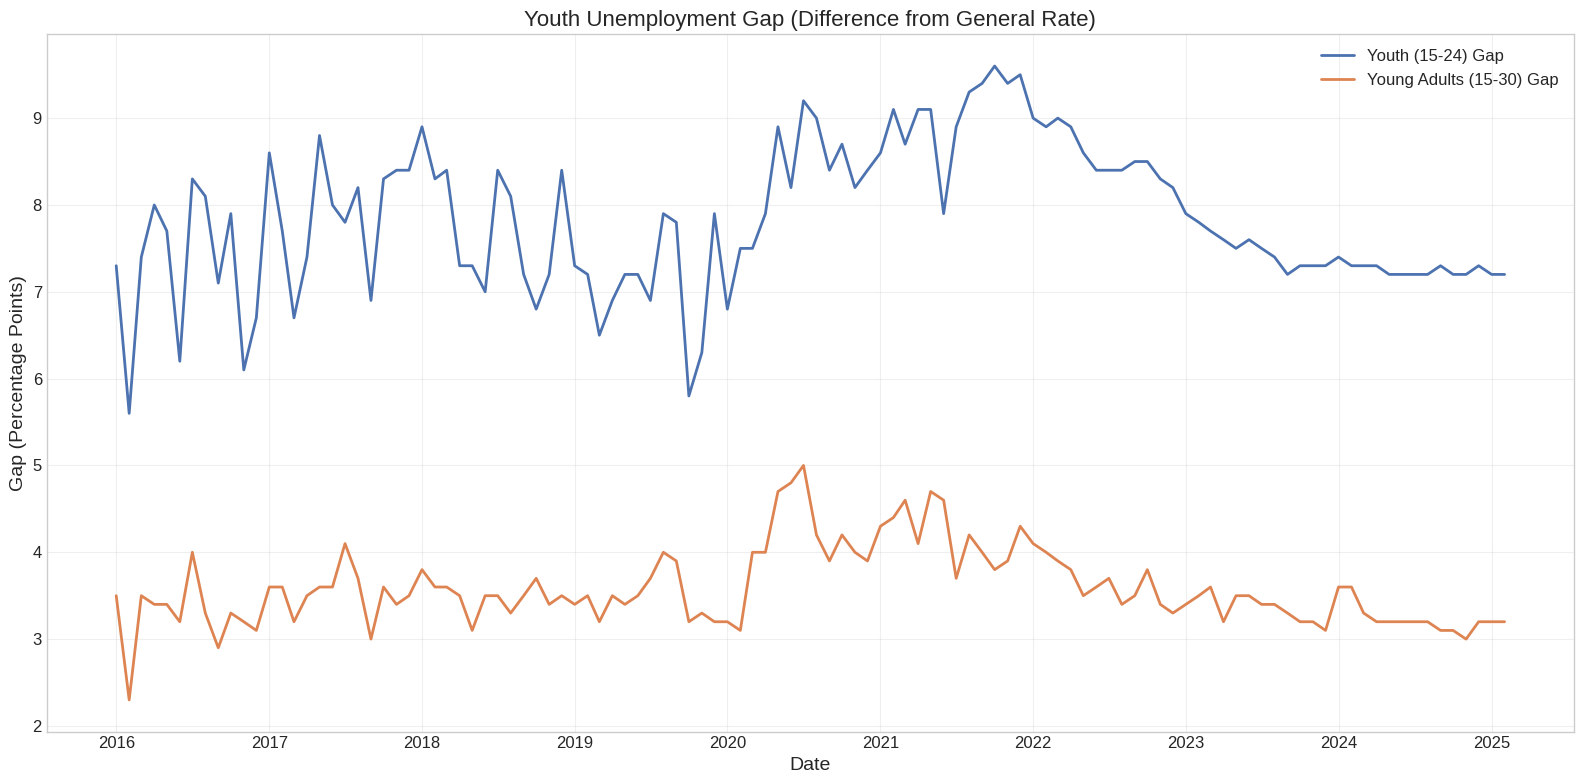

In [ ]:
if all(col in lfs_month_youth.columns for col in ['u_rate_15_24', 'u_rate_15_30']):
    # Merge youth unemployment with general unemployment
    youth_vs_general = pd.DataFrame({
        'Youth (15-24)': lfs_youth_indexed['u_rate_15_24'],
        'Young Adults (15-30)': lfs_youth_indexed['u_rate_15_30']
    })

    # Add general unemployment
    if 'u_rate' in lfs_month.columns:
        # Reindex general unemployment to match youth unemployment dates
        u_rate_reindexed = u_rate_general.reindex(youth_vs_general.index)
        youth_vs_general['General'] = u_rate_reindexed

    # Plot comparison
    plt.figure(figsize=(16, 8))

    for column in youth_vs_general.columns:
        plt.plot(youth_vs_general.index, youth_vs_general[column],
                 label=f'{column} Unemployment Rate', linewidth=2)

    plt.title('Youth vs General Unemployment Rate in Malaysia', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Unemployment Rate (%)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Calculate unemployment rate gaps
    if 'General' in youth_vs_general.columns:
        youth_vs_general['Youth Gap (15-24)'] = youth_vs_general['Youth (15-24)'] - youth_vs_general['General']
        youth_vs_general['Young Adults Gap (15-30)'] = youth_vs_general['Young Adults (15-30)'] - youth_vs_general['General']

        # Plot
        plt.figure(figsize=(16, 8))

        plt.plot(youth_vs_general.index, youth_vs_general['Youth Gap (15-24)'],
                 label='Youth (15-24) Gap', linewidth=2)
        plt.plot(youth_vs_general.index, youth_vs_general['Young Adults Gap (15-30)'],
                 label='Young Adults (15-30) Gap', linewidth=2)

        plt.title('Youth Unemployment Gap (Difference from General Rate)', fontsize=16)
        plt.xlabel('Date', fontsize=14)
        plt.ylabel('Gap (Percentage Points)', fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
else:
    print("Required columns for youth unemployment comparison not found in the dataset.")

### Youth unemployment critical periods identification

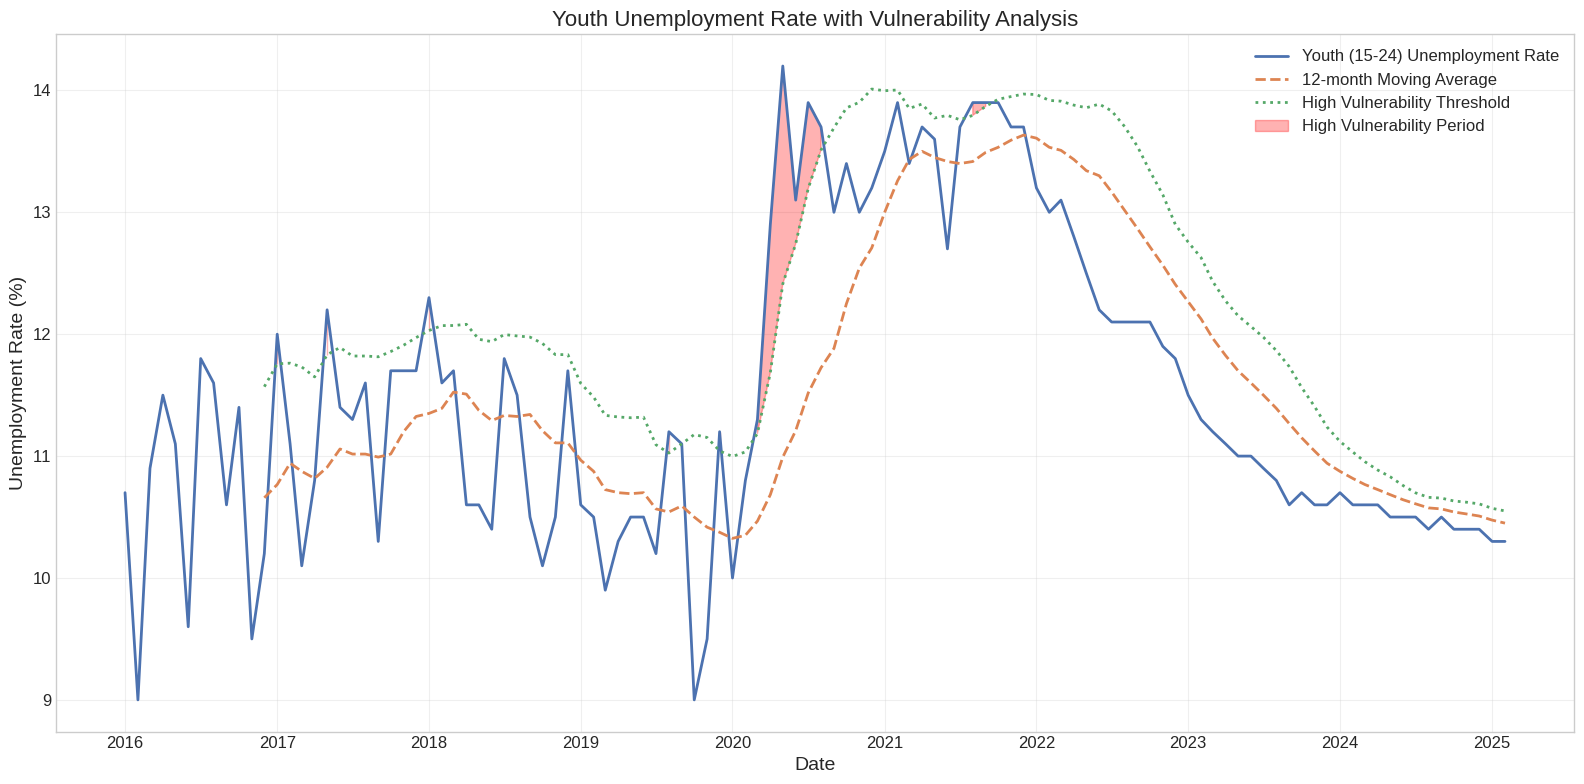

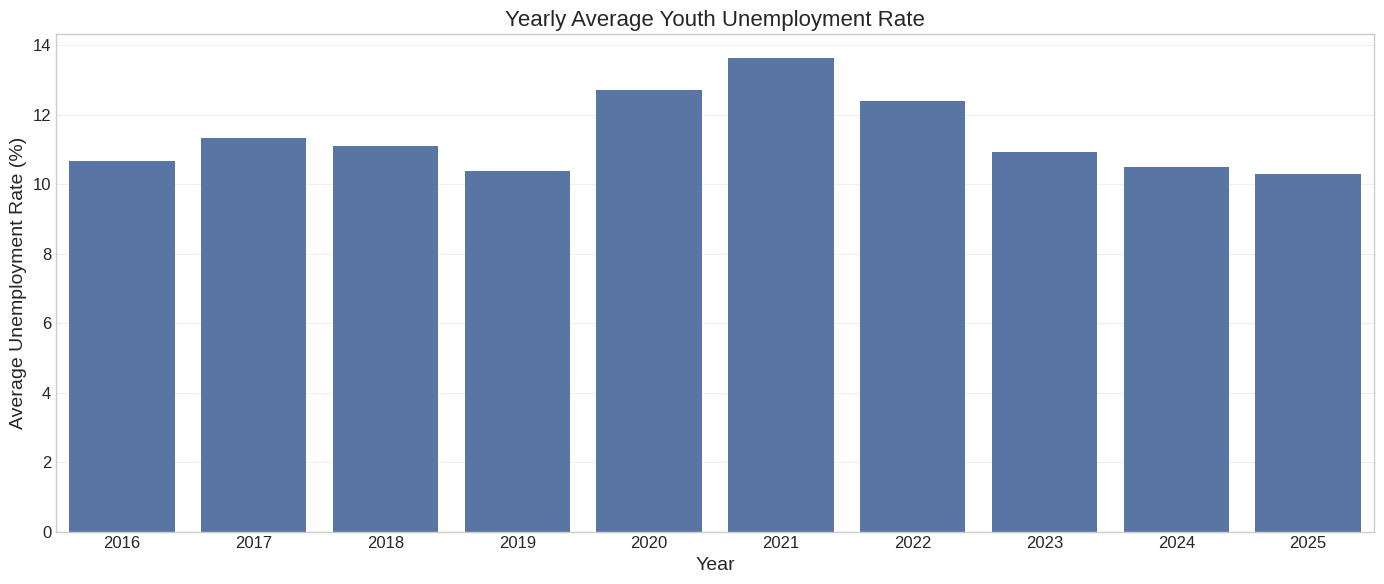

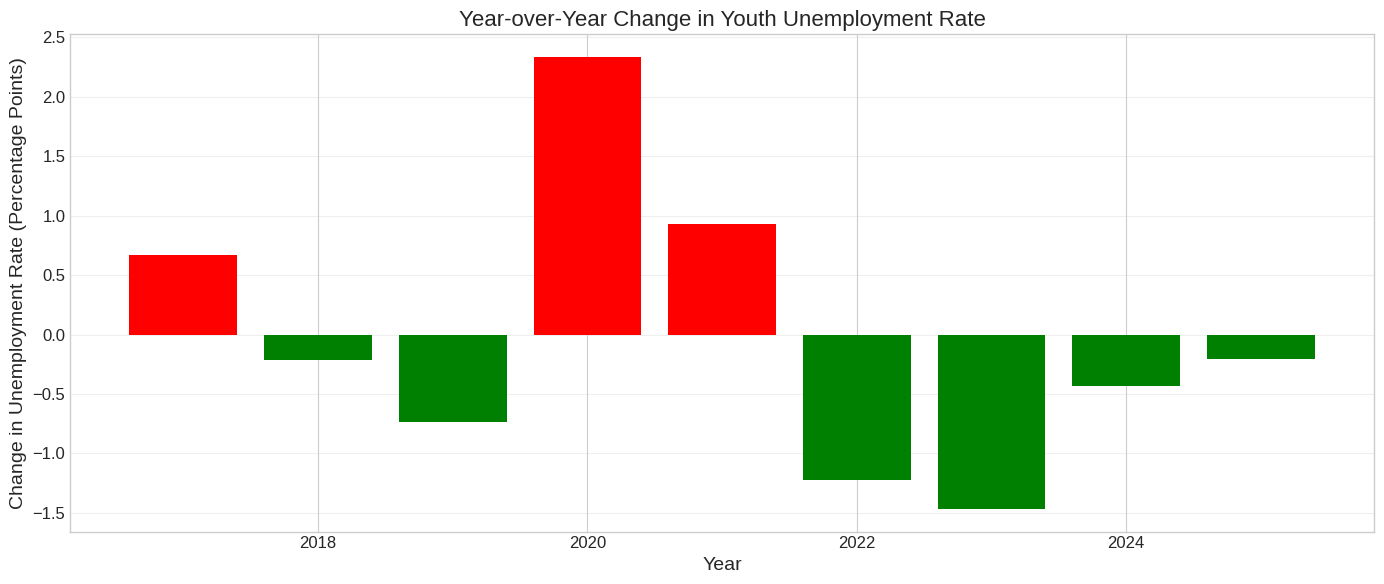

In [ ]:
if 'u_rate_15_24' in lfs_month_youth.columns:
    # Calculate rolling statistics
    rolling_mean = lfs_youth_indexed['u_rate_15_24'].rolling(window=12).mean()
    rolling_std = lfs_youth_indexed['u_rate_15_24'].rolling(window=12).std()

    # Define thresholds for high vulnerability
    high_threshold = rolling_mean + rolling_std

    # Plot with vulnerability zones
    plt.figure(figsize=(16, 8))

    plt.plot(lfs_youth_indexed.index, lfs_youth_indexed['u_rate_15_24'],
             label='Youth (15-24) Unemployment Rate', linewidth=2)
    plt.plot(lfs_youth_indexed.index, rolling_mean,
             label='12-month Moving Average', linewidth=2, linestyle='--')
    plt.plot(lfs_youth_indexed.index, high_threshold,
             label='High Vulnerability Threshold', linewidth=2, linestyle=':')

    # Fill high vulnerability periods
    plt.fill_between(lfs_youth_indexed.index,
                    lfs_youth_indexed['u_rate_15_24'], high_threshold,
                    where=(lfs_youth_indexed['u_rate_15_24'] > high_threshold),
                    color='red', alpha=0.3, label='High Vulnerability Period')

    plt.title('Youth Unemployment Rate with Vulnerability Analysis', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Unemployment Rate (%)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Calculate yearly average to detect yearly patterns
    yearly_avg = lfs_youth_indexed['u_rate_15_24'].resample('Y').mean()
    yearly_avg_df = pd.DataFrame(yearly_avg).reset_index()
    yearly_avg_df['Year'] = yearly_avg_df['date'].dt.year

    plt.figure(figsize=(14, 6))
    sns.barplot(x='Year', y='u_rate_15_24', data=yearly_avg_df)
    plt.title('Yearly Average Youth Unemployment Rate', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Average Unemployment Rate (%)', fontsize=14)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Calculate year-over-year changes
    if len(yearly_avg_df) > 1:
        yearly_avg_df['YoY Change'] = yearly_avg_df['u_rate_15_24'].diff()
        yearly_avg_df['YoY Change %'] = yearly_avg_df['u_rate_15_24'].pct_change() * 100

        plt.figure(figsize=(14, 6))

        # Create a color map based on positive/negative changes
        colors = ['g' if x < 0 else 'r' for x in yearly_avg_df['YoY Change'][1:]]

        plt.bar(yearly_avg_df['Year'][1:], yearly_avg_df['YoY Change'][1:], color=colors)
        plt.title('Year-over-Year Change in Youth Unemployment Rate', fontsize=16)
        plt.xlabel('Year', fontsize=14)
        plt.ylabel('Change in Unemployment Rate (Percentage Points)', fontsize=14)
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
else:
    print("Required columns for youth unemployment vulnerability analysis not found in the dataset.")

Labor Force Participation Analysis

In [ ]:
# Convert date to datetime
lfs_month['date'] = pd.to_datetime(lfs_month['date'])
lfs_month_indexed = lfs_month.set_index('date')

### Analysis of labor force participation trends

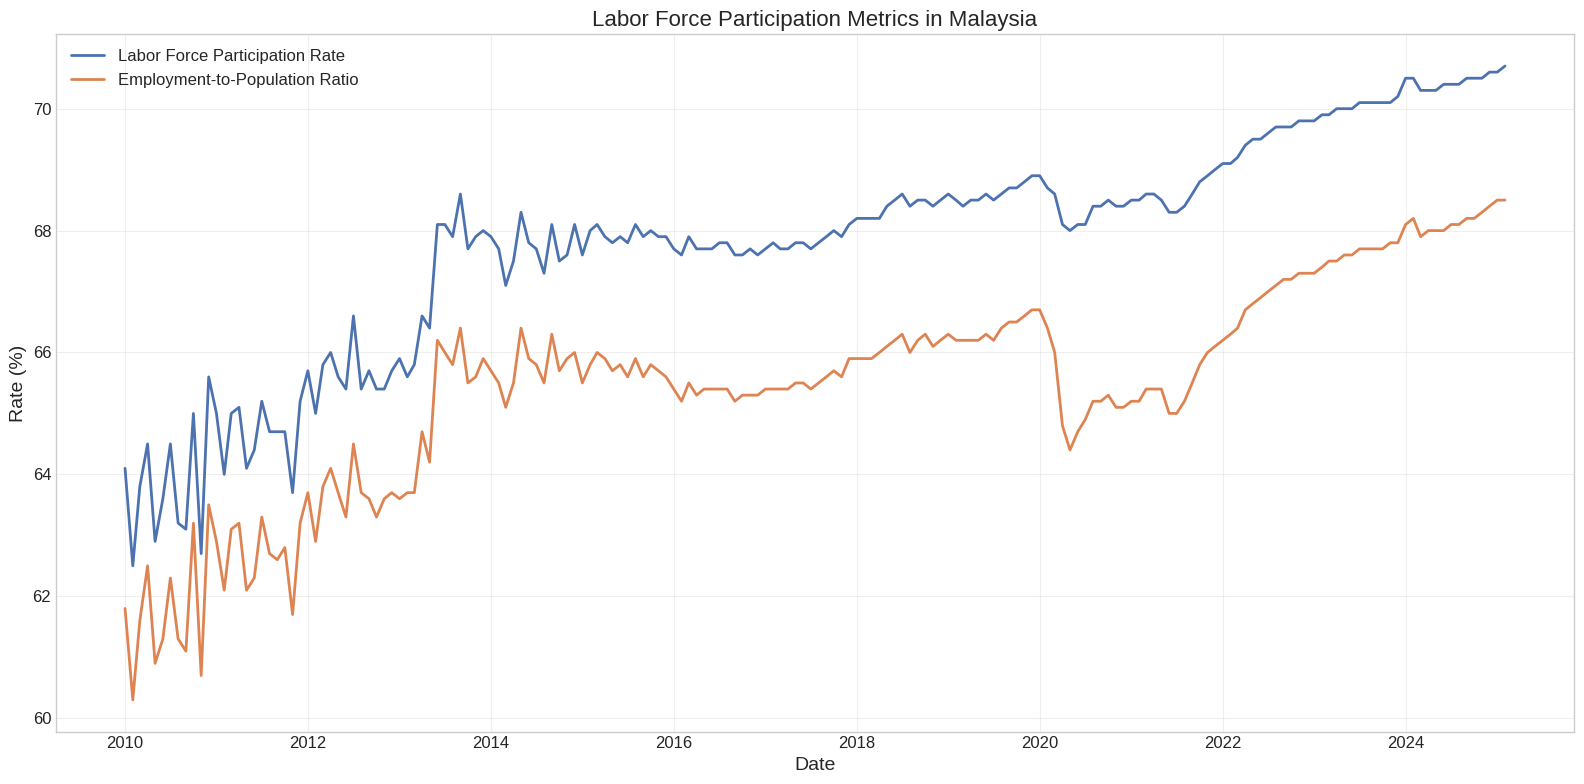

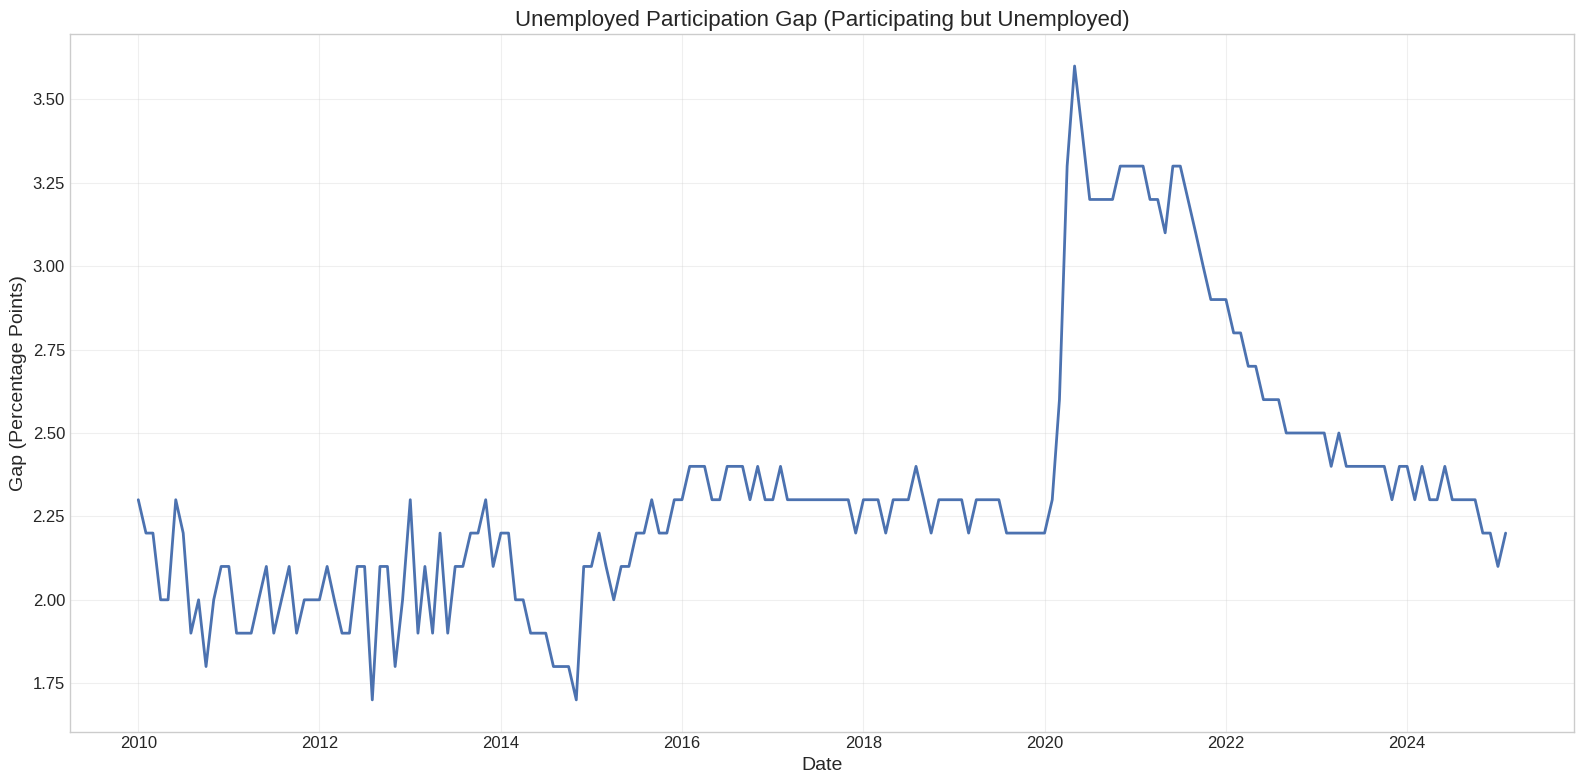

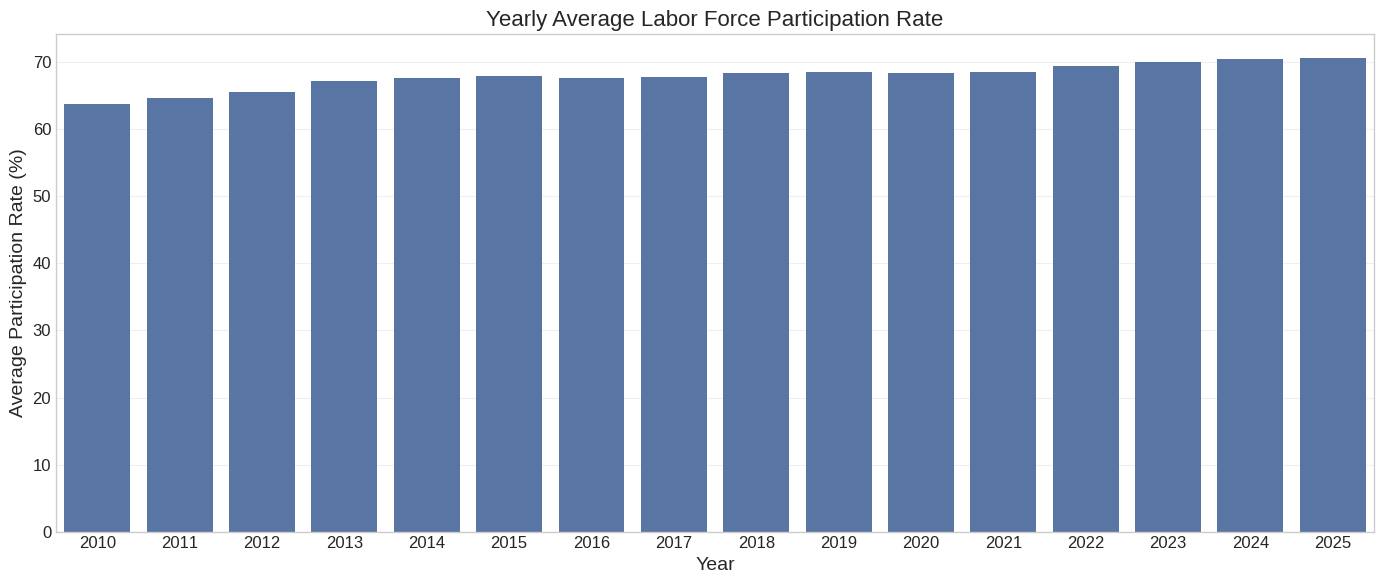

In [ ]:
if all(col in lfs_month.columns for col in ['p_rate', 'ep_ratio']):
    # Plot participation rate and employment-to-population ratio
    plt.figure(figsize=(16, 8))

    plt.plot(lfs_month_indexed.index, lfs_month_indexed['p_rate'],
             label='Labor Force Participation Rate', linewidth=2)
    plt.plot(lfs_month_indexed.index, lfs_month_indexed['ep_ratio'],
             label='Employment-to-Population Ratio', linewidth=2)

    plt.title('Labor Force Participation Metrics in Malaysia', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Rate (%)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Calculate the gap between participation rate and employment ratio
    lfs_month_indexed['unemployed_participation_gap'] = lfs_month_indexed['p_rate'] - lfs_month_indexed['ep_ratio']

    plt.figure(figsize=(16, 8))
    plt.plot(lfs_month_indexed.index, lfs_month_indexed['unemployed_participation_gap'],
             linewidth=2)

    plt.title('Unemployed Participation Gap (Participating but Unemployed)', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Gap (Percentage Points)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Calculate yearly average participation rates
    yearly_avg = lfs_month_indexed['p_rate'].resample('Y').mean()
    yearly_avg_df = pd.DataFrame(yearly_avg).reset_index()
    yearly_avg_df['Year'] = yearly_avg_df['date'].dt.year

    plt.figure(figsize=(14, 6))
    sns.barplot(x='Year', y='p_rate', data=yearly_avg_df)
    plt.title('Yearly Average Labor Force Participation Rate', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Average Participation Rate (%)', fontsize=14)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Required columns for labor force participation analysis not found in the dataset.")

### Analysis of labor force composition

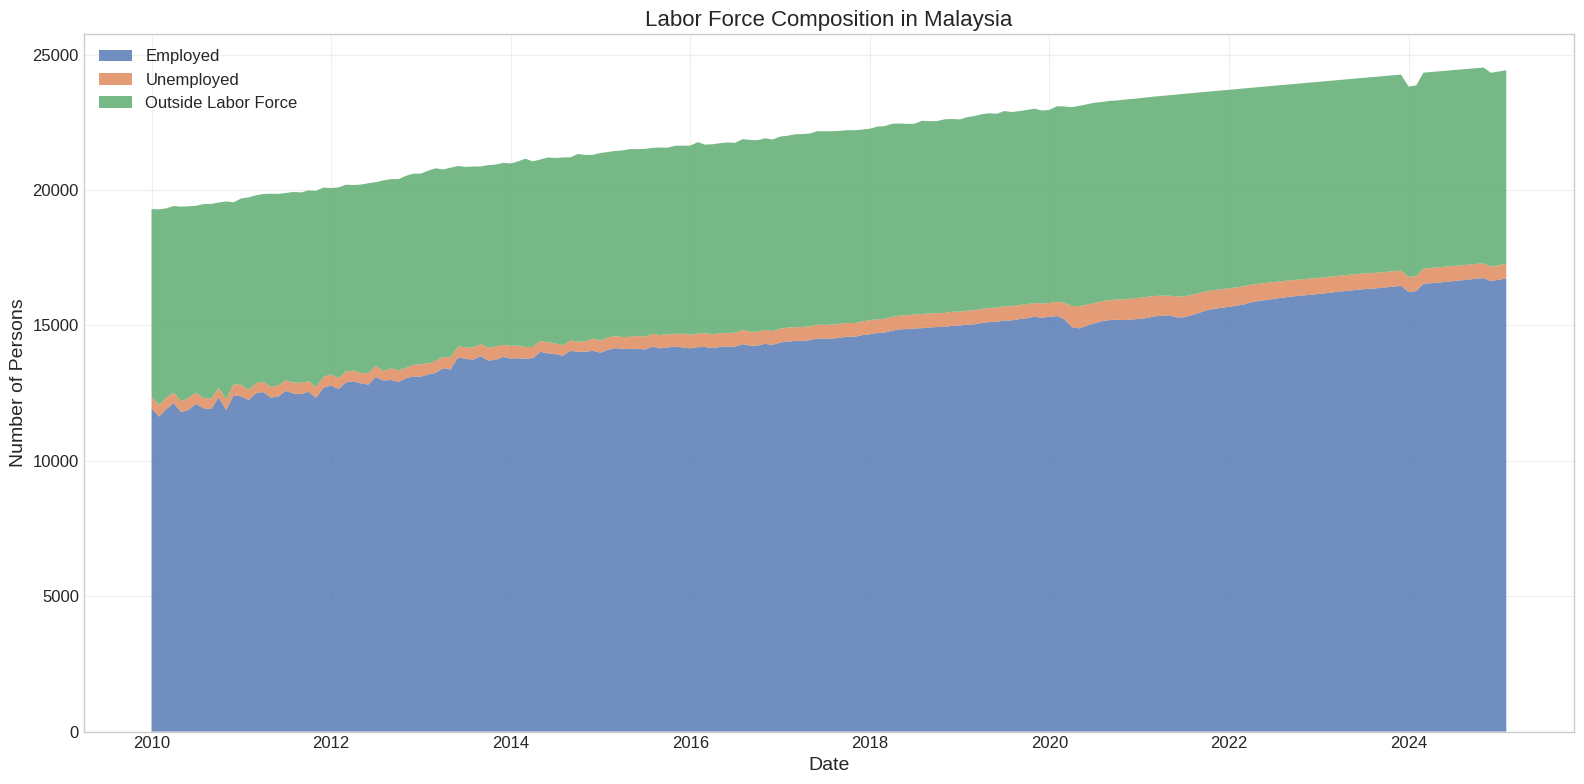

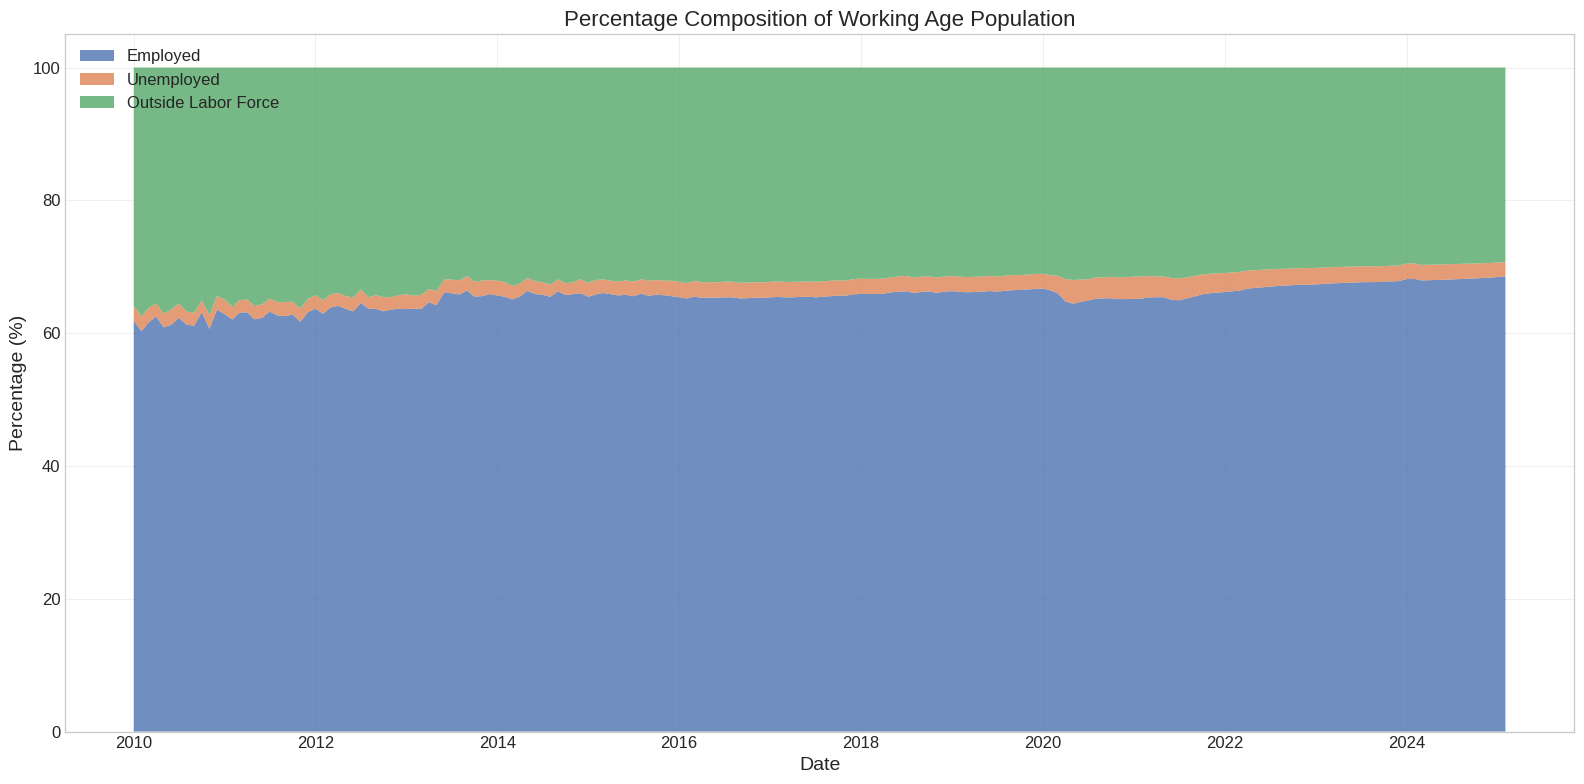

In [ ]:
if all(col in lfs_month.columns for col in ['lf', 'lf_employed', 'lf_unemployed', 'lf_outside']):
    # Create a stacked area chart for labor force composition
    plt.figure(figsize=(16, 8))

    plt.stackplot(lfs_month['date'],
                 lfs_month['lf_employed'],
                 lfs_month['lf_unemployed'],
                 lfs_month['lf_outside'],
                 labels=['Employed', 'Unemployed', 'Outside Labor Force'],
                 alpha=0.8)

    plt.title('Labor Force Composition in Malaysia', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Number of Persons', fontsize=14)
    plt.legend(loc='upper left', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Calculate percentage composition
    total_population = lfs_month['lf_employed'] + lfs_month['lf_unemployed'] + lfs_month['lf_outside']
    lfs_month['employed_pct'] = lfs_month['lf_employed'] / total_population * 100
    lfs_month['unemployed_pct'] = lfs_month['lf_unemployed'] / total_population * 100
    lfs_month['outside_pct'] = lfs_month['lf_outside'] / total_population * 100

    # Plot percentage composition
    plt.figure(figsize=(16, 8))

    plt.stackplot(lfs_month['date'],
                 lfs_month['employed_pct'],
                 lfs_month['unemployed_pct'],
                 lfs_month['outside_pct'],
                 labels=['Employed', 'Unemployed', 'Outside Labor Force'],
                 alpha=0.8)

    plt.title('Percentage Composition of Working Age Population', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Percentage (%)', fontsize=14)
    plt.legend(loc='upper left', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Required columns for labor force composition analysis not found in the dataset.")

## Statistical Analysis

### Statistical summary of Key Labor Market Metrics

Summary Statistics for Key Labor Market Metrics:


Metric       Mean  Median   Min   Max  \
0                      Unemployment Rate (%)   3.436813    3.30   2.6   5.3   
1                     Participation Rate (%)  67.790110   68.10  62.5  70.7   
2         Employment-to-Population Ratio (%)  65.455495   65.65  60.3  68.5   
3        Youth (15-24) Unemployment Rate (%)  11.496364   11.20   9.0  14.2   
4  Young Adult (15-30) Unemployment Rate (%)   7.248182    6.90   5.7  10.0   

   Range   Std Dev  Coef of Var  Skewness  Kurtosis  25th Percentile  \
0    2.7  0.525396     0.152873  1.561817  2.146722            3.125   
1    8.2  1.853118     0.027336 -0.837748  0.282070           67.600   
2    8.2  1.731077     0.026447 -0.716228  0.402203           65.000   
3    5.2  1.264978     0.110033  0.499403 -0.671574           10.500   
4    4.3  0.937078     0.129285  1.242152  0.565926            6.600   

   75th Percentile    IQR  
0            3.500  0.375  
1           68.700  1.100  
2           66.300  1.300  
3           12.200  1.700  
4            7.475  0.875

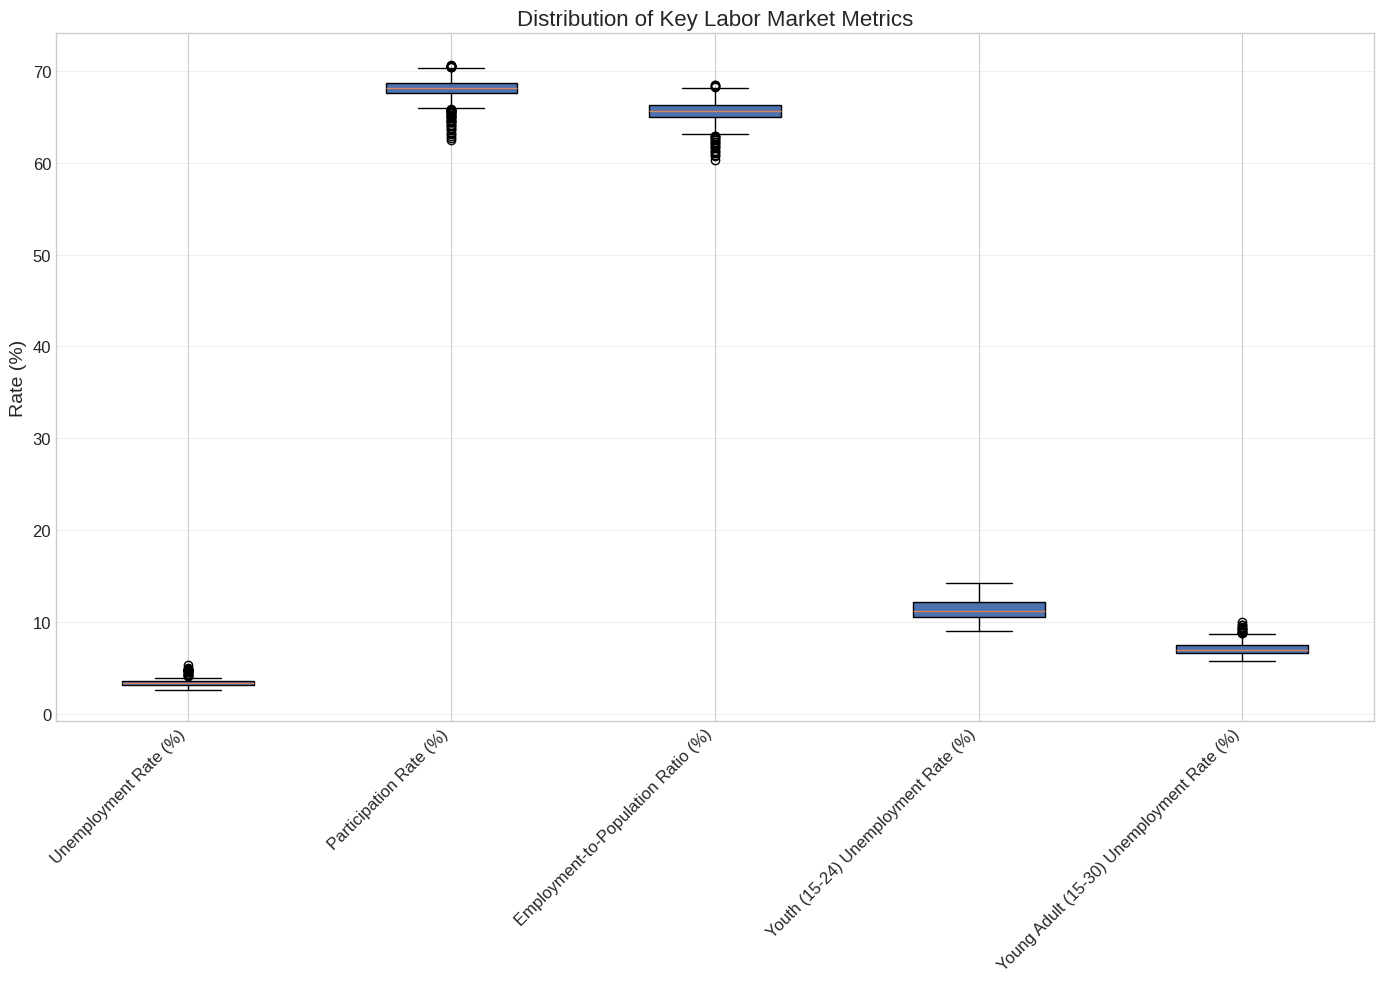

In [ ]:
# Function to calculate comprehensive statistics
def calculate_stats(series, name):
    stats = {
        'Metric': name,
        'Mean': series.mean(),
        'Median': series.median(),
        'Min': series.min(),
        'Max': series.max(),
        'Range': series.max() - series.min(),
        'Std Dev': series.std(),
        'Coef of Var': series.std() / series.mean() if series.mean() != 0 else None,
        'Skewness': series.skew(),
        'Kurtosis': series.kurtosis(),
        '25th Percentile': series.quantile(0.25),
        '75th Percentile': series.quantile(0.75),
        'IQR': series.quantile(0.75) - series.quantile(0.25)
    }
    return pd.Series(stats)

# List of metrics to analyze
metrics = []

# General labor force metrics
if 'u_rate' in lfs_month.columns:
    metrics.append((lfs_month['u_rate'], 'Unemployment Rate (%)'))
if 'p_rate' in lfs_month.columns:
    metrics.append((lfs_month['p_rate'], 'Participation Rate (%)'))
if 'ep_ratio' in lfs_month.columns:
    metrics.append((lfs_month['ep_ratio'], 'Employment-to-Population Ratio (%)'))

# Youth unemployment metrics
if 'u_rate_15_24' in lfs_month_youth.columns:
    metrics.append((lfs_month_youth['u_rate_15_24'], 'Youth (15-24) Unemployment Rate (%)'))
if 'u_rate_15_30' in lfs_month_youth.columns:
    metrics.append((lfs_month_youth['u_rate_15_30'], 'Young Adult (15-30) Unemployment Rate (%)'))

# Calculate statistics for all metrics
stats_df = pd.DataFrame([calculate_stats(series, name) for series, name in metrics])

# Display the statistics
print("Summary Statistics for Key Labor Market Metrics:")
display(stats_df)

# Create a compact visualization of the statistics
plt.figure(figsize=(14, 10))

# Create box plots for the metrics
data_to_plot = [series for series, _ in metrics]
labels = [name for _, name in metrics]

plt.boxplot(data_to_plot, labels=labels, patch_artist=True)
plt.title('Distribution of Key Labor Market Metrics', fontsize=16)
plt.ylabel('Rate (%)', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Analysis of key metrics distribution

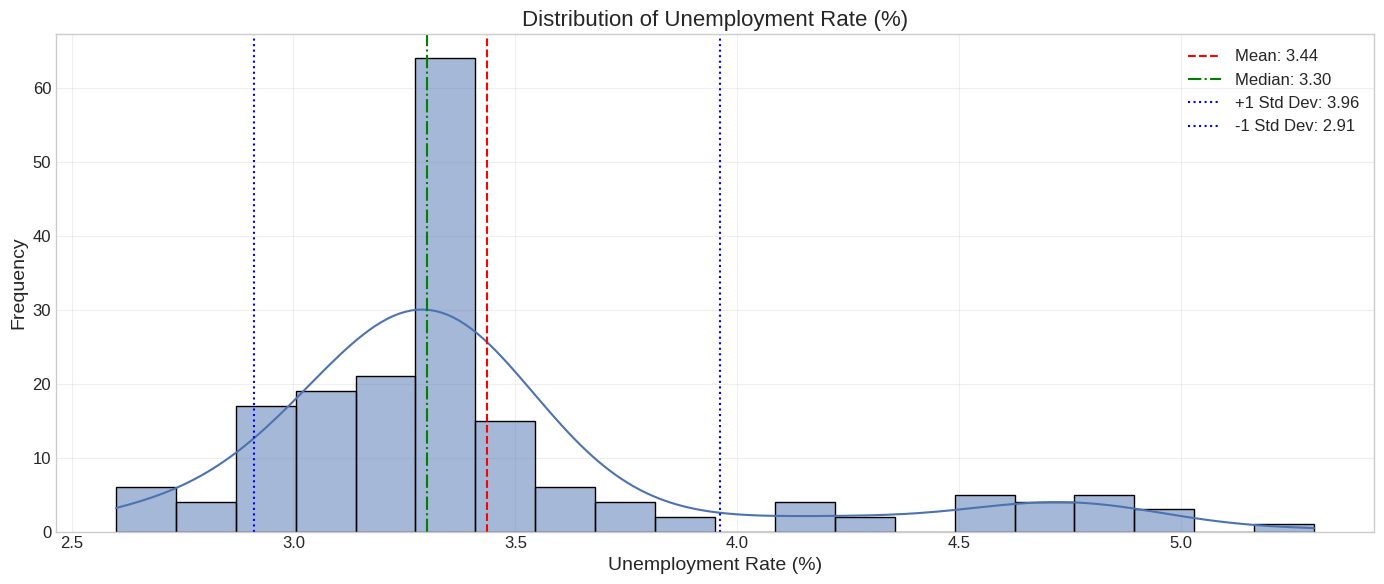

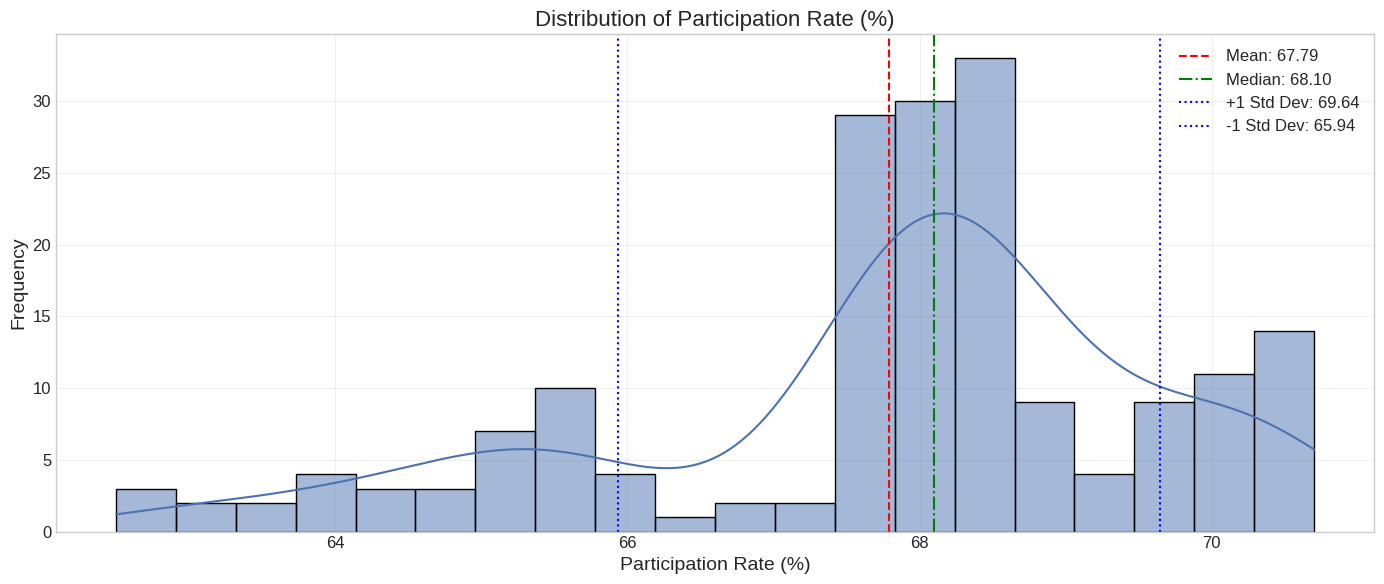

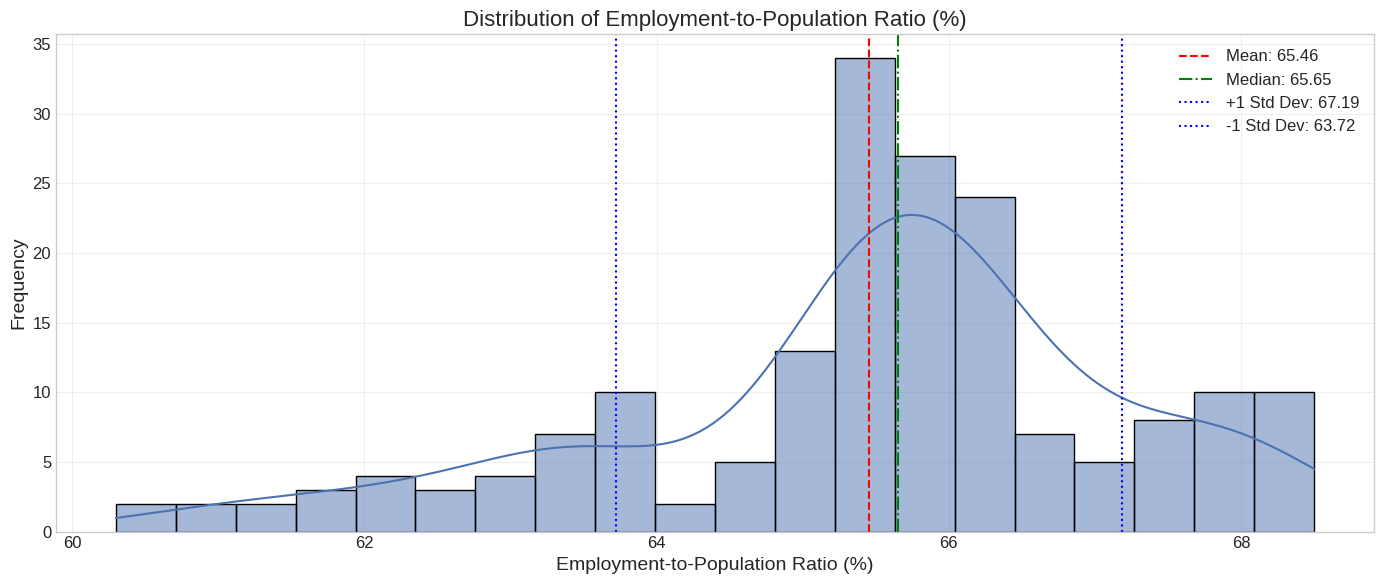

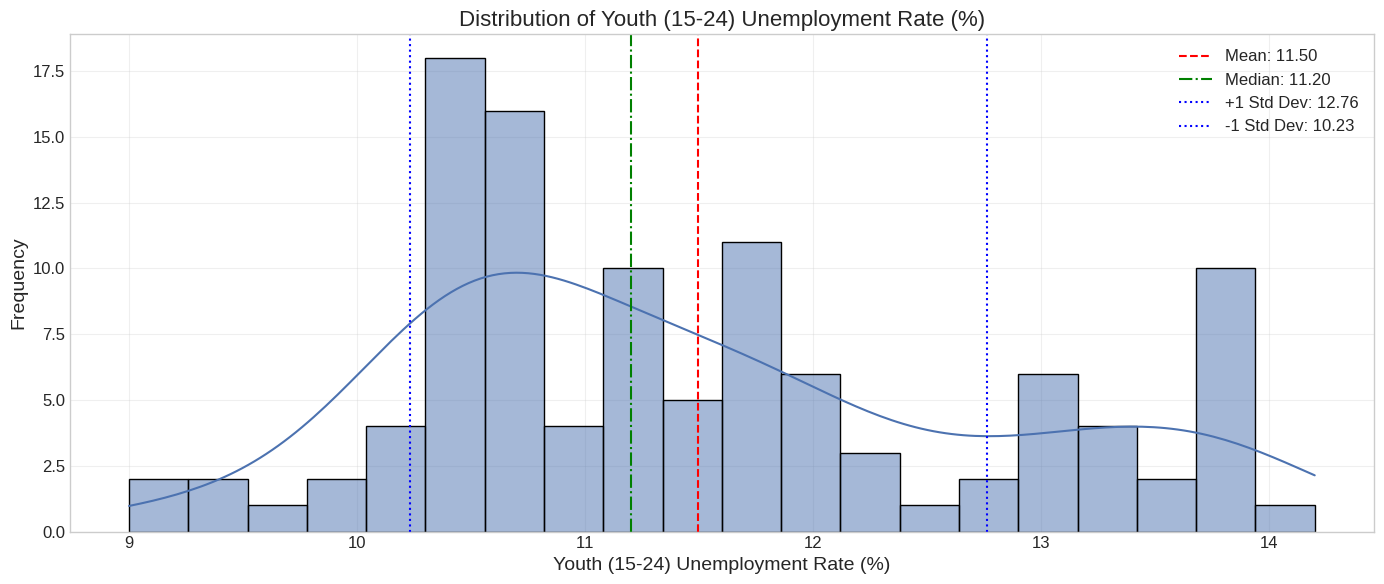

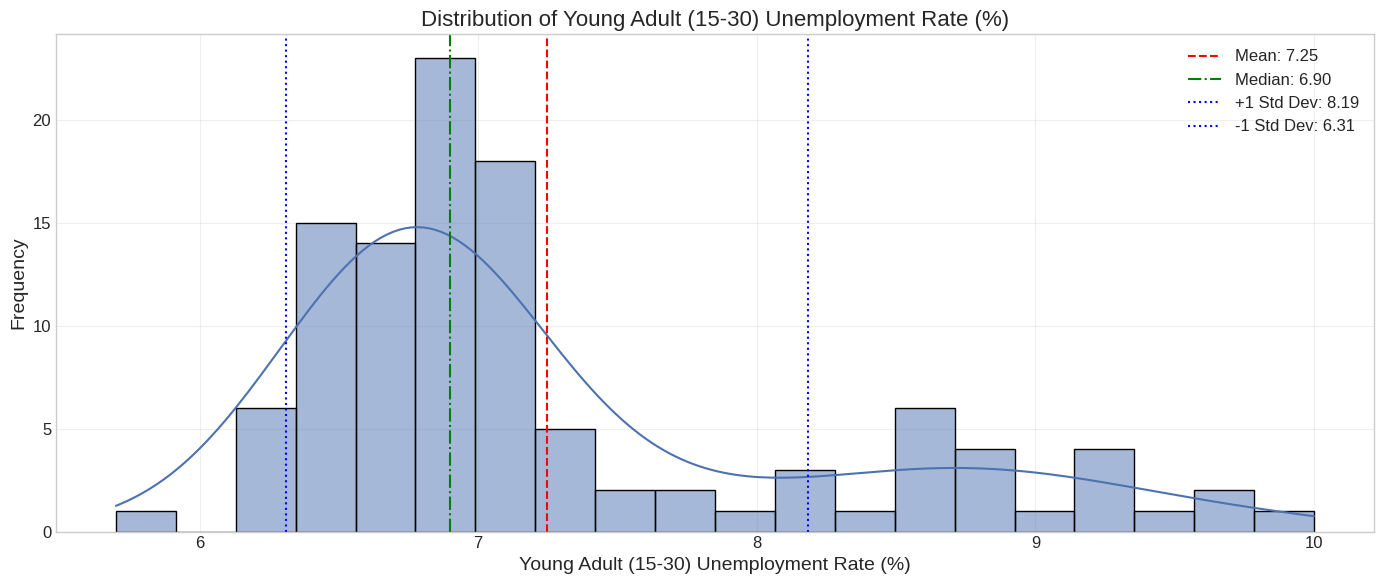

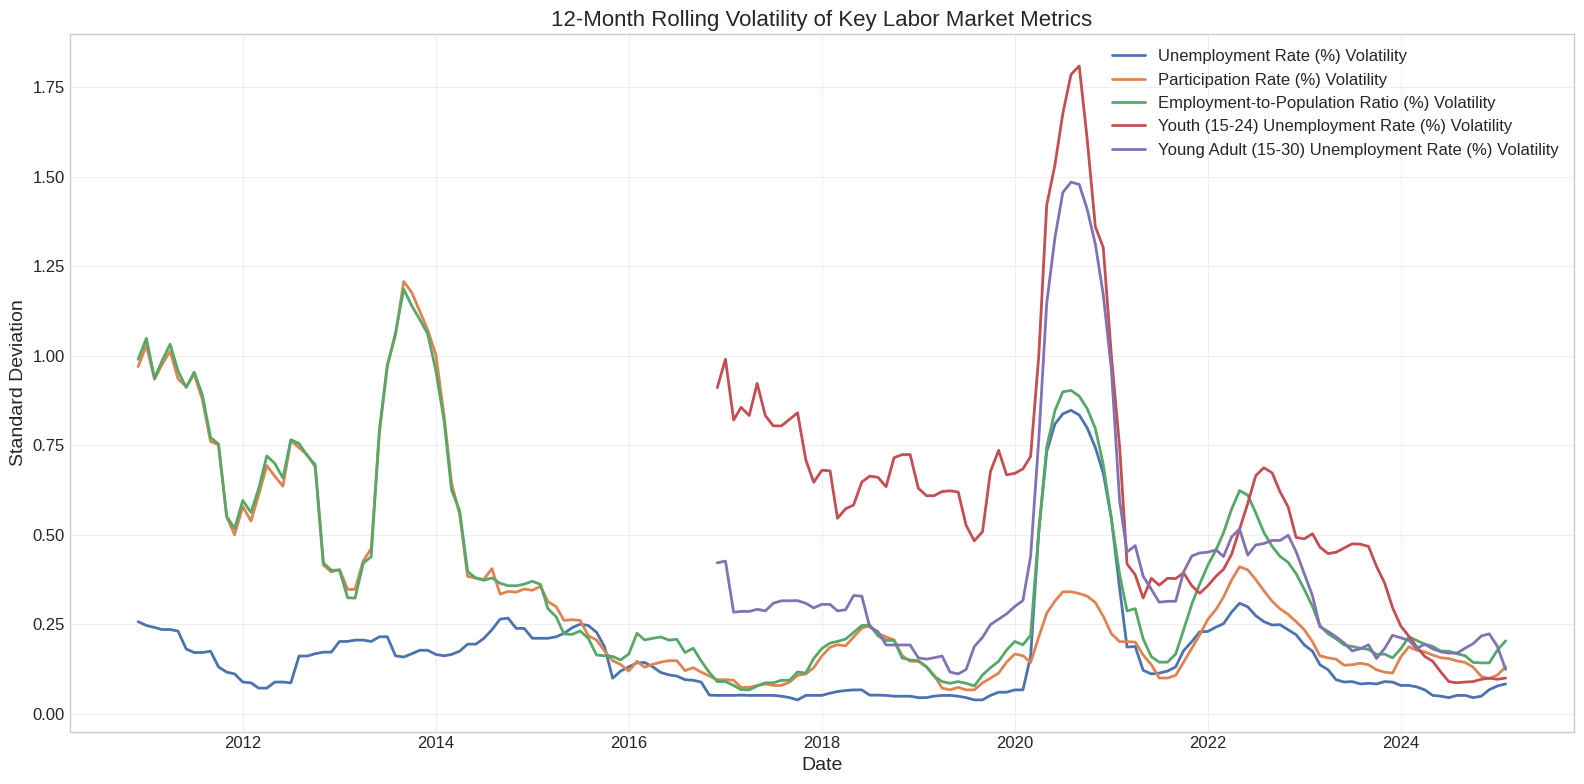

In [ ]:
# Function to create distribution plots
def create_distribution_plot(series, name):
    plt.figure(figsize=(14, 6))

    # Create histogram with KDE
    sns.histplot(series, kde=True, bins=20)

    # Add vertical lines for key statistics
    plt.axvline(series.mean(), color='r', linestyle='--', label=f'Mean: {series.mean():.2f}')
    plt.axvline(series.median(), color='g', linestyle='-.', label=f'Median: {series.median():.2f}')
    plt.axvline(series.mean() + series.std(), color='b', linestyle=':',
               label=f'+1 Std Dev: {series.mean() + series.std():.2f}')
    plt.axvline(series.mean() - series.std(), color='b', linestyle=':',
               label=f'-1 Std Dev: {series.mean() - series.std():.2f}')

    plt.title(f'Distribution of {name}', fontsize=16)
    plt.xlabel(name, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Create distribution plots for each metric
for series, name in metrics:
    create_distribution_plot(series, name)

# Calculate moving standard deviation to check for volatility
plt.figure(figsize=(16, 8))

for series, name in metrics:
    # Calculate rolling standard deviation (volatility)
    rolling_std = series.rolling(window=12).std()

    rolling_std_df = pd.DataFrame(rolling_std)
    rolling_std_df.columns = [name]

    # Get dates for plotting
    if 'date' in lfs_month.columns:
        if len(series) == len(lfs_month):
            dates = lfs_month['date']
        elif len(series) == len(lfs_month_youth):
            dates = lfs_month_youth['date']
        else:
            dates = pd.date_range(start='2010-01-01', periods=len(series), freq='M')
    else:
        dates = pd.date_range(start='2010-01-01', periods=len(series), freq='M')

    # Plot rolling standard deviation
    plt.plot(dates, rolling_std, label=f'{name} Volatility', linewidth=2)

plt.title('12-Month Rolling Volatility of Key Labor Market Metrics', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Standard Deviation', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Outlier Detection


Outlier Analysis for Unemployment Rate (%):
Number of outliers detected: 24
Percentage of outliers: 13.19%
Outlier bounds: (2.56, 4.06)
Outlier values:
  Date: 2020-04-01 00:00:00, Value: 5.00
  Date: 2020-05-01 00:00:00, Value: 5.30
  Date: 2020-06-01 00:00:00, Value: 4.90
  Date: 2020-07-01 00:00:00, Value: 4.70
  Date: 2020-08-01 00:00:00, Value: 4.70
  Date: 2020-09-01 00:00:00, Value: 4.60
  Date: 2020-10-01 00:00:00, Value: 4.70
  Date: 2020-11-01 00:00:00, Value: 4.80
  Date: 2020-12-01 00:00:00, Value: 4.80
  Date: 2021-01-01 00:00:00, Value: 4.90
  Date: 2021-02-01 00:00:00, Value: 4.80
  Date: 2021-03-01 00:00:00, Value: 4.70
  Date: 2021-04-01 00:00:00, Value: 4.60
  Date: 2021-05-01 00:00:00, Value: 4.50
  Date: 2021-06-01 00:00:00, Value: 4.80
  Date: 2021-07-01 00:00:00, Value: 4.80
  Date: 2021-08-01 00:00:00, Value: 4.60
  Date: 2021-09-01 00:00:00, Value: 4.50
  Date: 2021-10-01 00:00:00, Value: 4.30
  Date: 2021-11-01 00:00:00, Value: 4.30
  Date: 2021-12-01 00:00:00

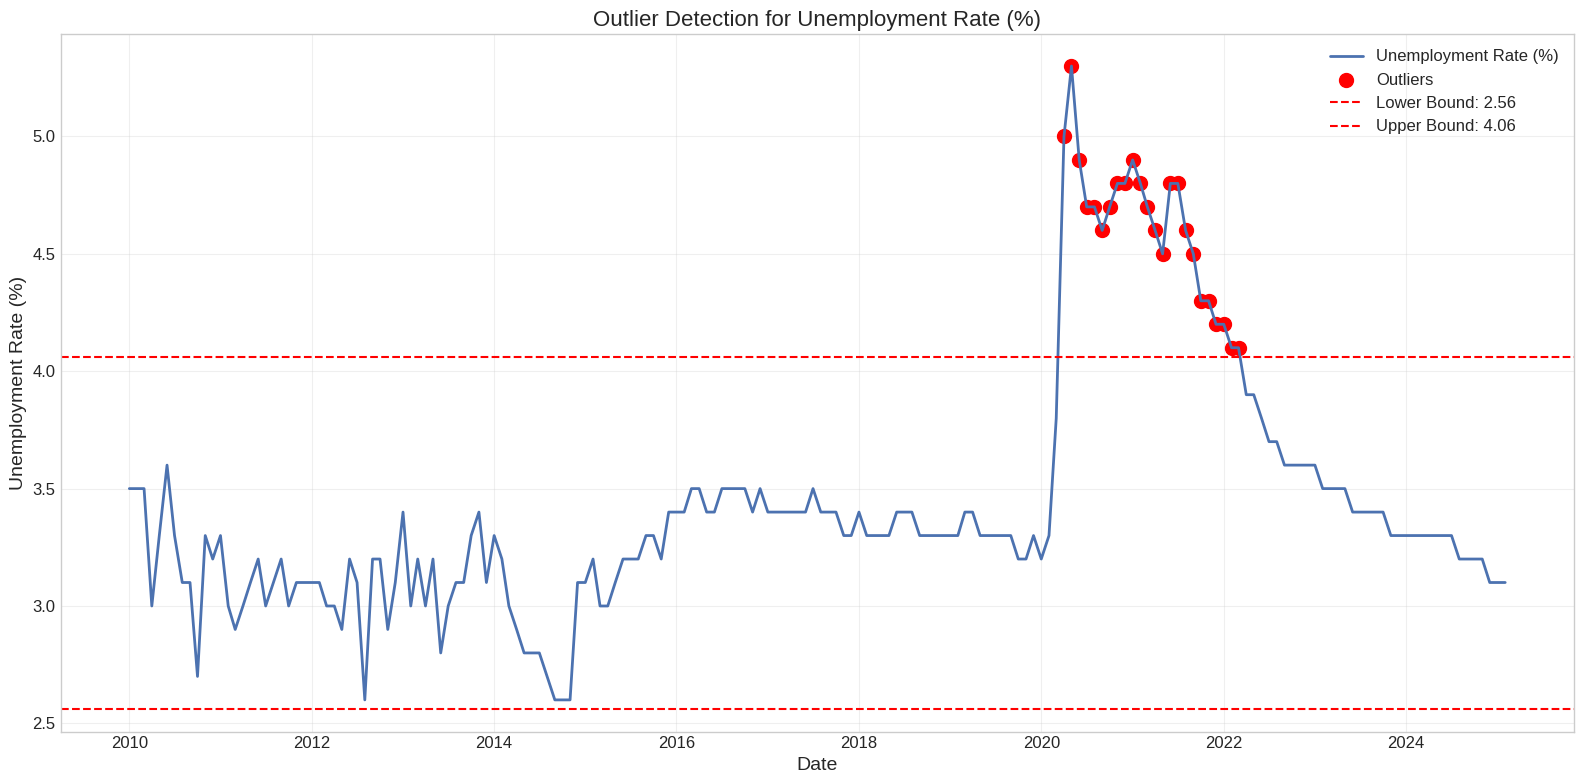


Outlier Analysis for Participation Rate (%):
Number of outliers detected: 48
Percentage of outliers: 26.37%
Outlier bounds: (65.95, 70.35)
Outlier values:
  Date: 2010-01-01 00:00:00, Value: 64.10
  Date: 2010-02-01 00:00:00, Value: 62.50
  Date: 2010-03-01 00:00:00, Value: 63.80
  Date: 2010-04-01 00:00:00, Value: 64.50
  Date: 2010-05-01 00:00:00, Value: 62.90
  Date: 2010-06-01 00:00:00, Value: 63.60
  Date: 2010-07-01 00:00:00, Value: 64.50
  Date: 2010-08-01 00:00:00, Value: 63.20
  Date: 2010-09-01 00:00:00, Value: 63.10
  Date: 2010-10-01 00:00:00, Value: 65.00
  Date: 2010-11-01 00:00:00, Value: 62.70
  Date: 2010-12-01 00:00:00, Value: 65.60
  Date: 2011-01-01 00:00:00, Value: 65.00
  Date: 2011-02-01 00:00:00, Value: 64.00
  Date: 2011-03-01 00:00:00, Value: 65.00
  Date: 2011-04-01 00:00:00, Value: 65.10
  Date: 2011-05-01 00:00:00, Value: 64.10
  Date: 2011-06-01 00:00:00, Value: 64.40
  Date: 2011-07-01 00:00:00, Value: 65.20
  Date: 2011-08-01 00:00:00, Value: 64.70
  Da

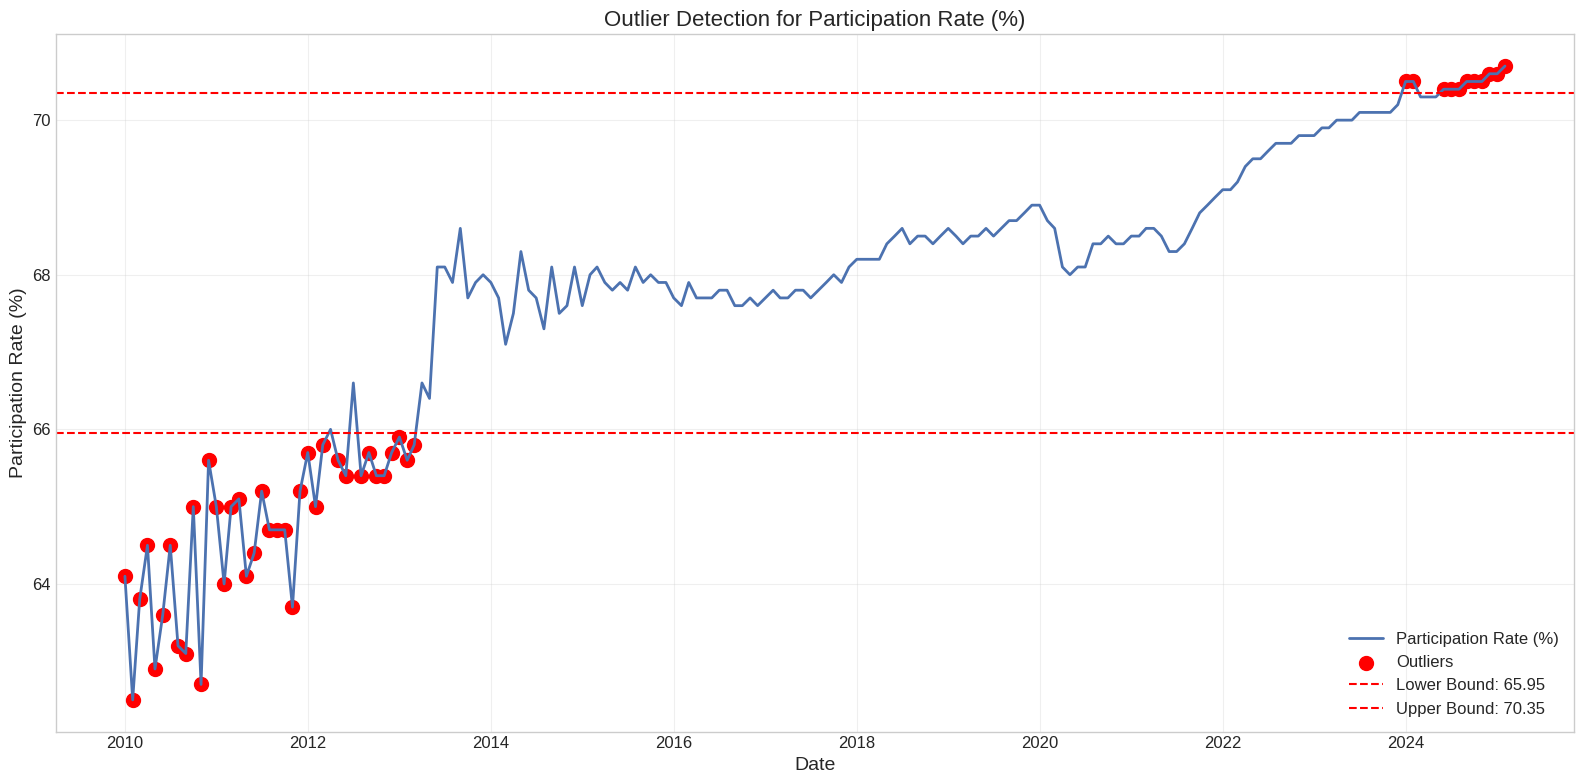


Outlier Analysis for Employment-to-Population Ratio (%):
Number of outliers detected: 23
Percentage of outliers: 12.64%
Outlier bounds: (63.05, 68.25)
Outlier values:
  Date: 2010-01-01 00:00:00, Value: 61.80
  Date: 2010-02-01 00:00:00, Value: 60.30
  Date: 2010-03-01 00:00:00, Value: 61.60
  Date: 2010-04-01 00:00:00, Value: 62.50
  Date: 2010-05-01 00:00:00, Value: 60.90
  Date: 2010-06-01 00:00:00, Value: 61.30
  Date: 2010-07-01 00:00:00, Value: 62.30
  Date: 2010-08-01 00:00:00, Value: 61.30
  Date: 2010-09-01 00:00:00, Value: 61.10
  Date: 2010-11-01 00:00:00, Value: 60.70
  Date: 2011-01-01 00:00:00, Value: 62.90
  Date: 2011-02-01 00:00:00, Value: 62.10
  Date: 2011-05-01 00:00:00, Value: 62.10
  Date: 2011-06-01 00:00:00, Value: 62.30
  Date: 2011-08-01 00:00:00, Value: 62.70
  Date: 2011-09-01 00:00:00, Value: 62.60
  Date: 2011-10-01 00:00:00, Value: 62.80
  Date: 2011-11-01 00:00:00, Value: 61.70
  Date: 2012-02-01 00:00:00, Value: 62.90
  Date: 2024-11-01 00:00:00, Value

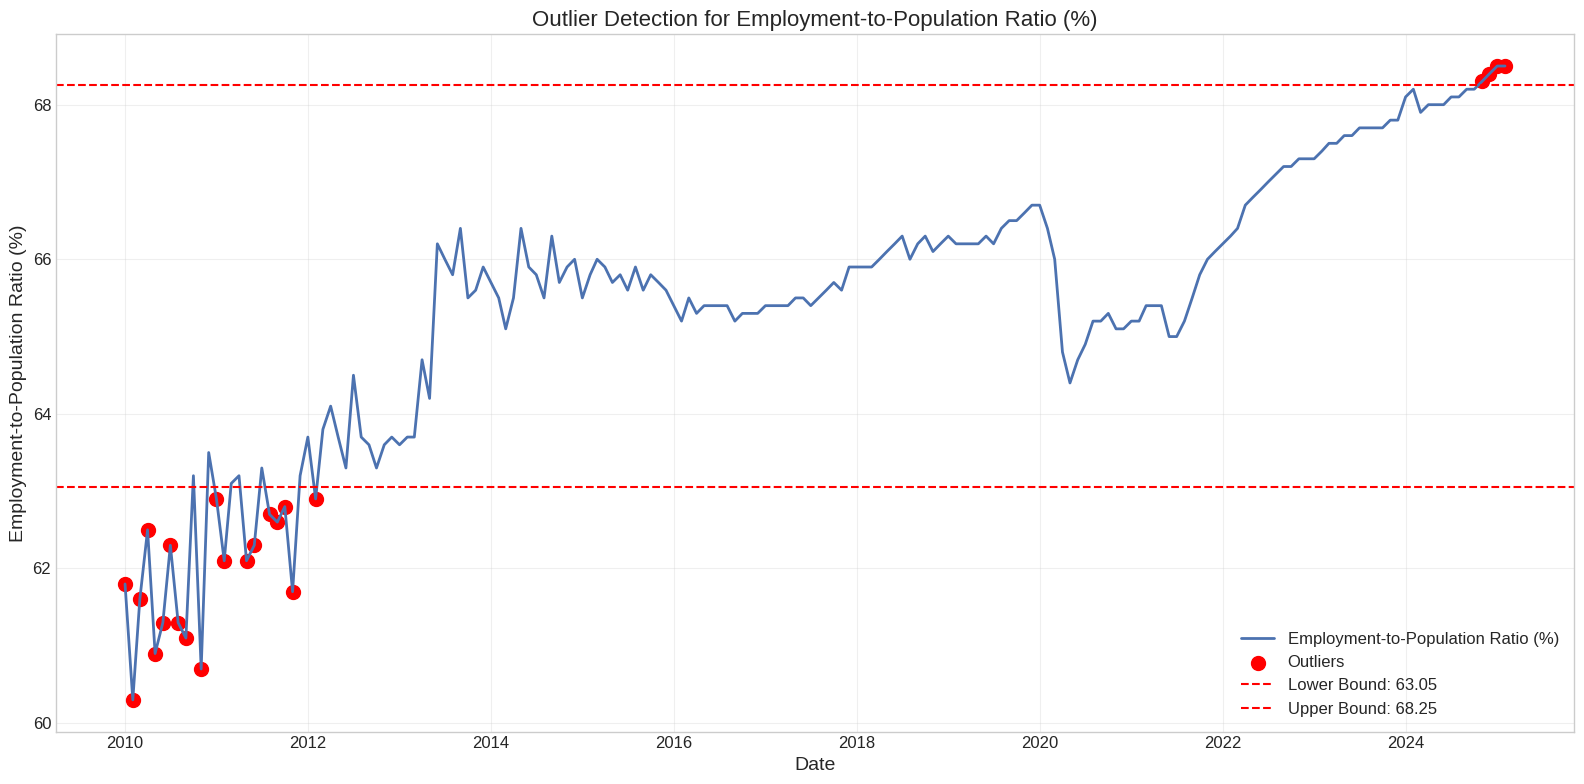


Outlier Analysis for Youth (15-24) Unemployment Rate (%):
Number of outliers detected: 0
Percentage of outliers: 0.00%
Outlier bounds: (7.95, 14.75)


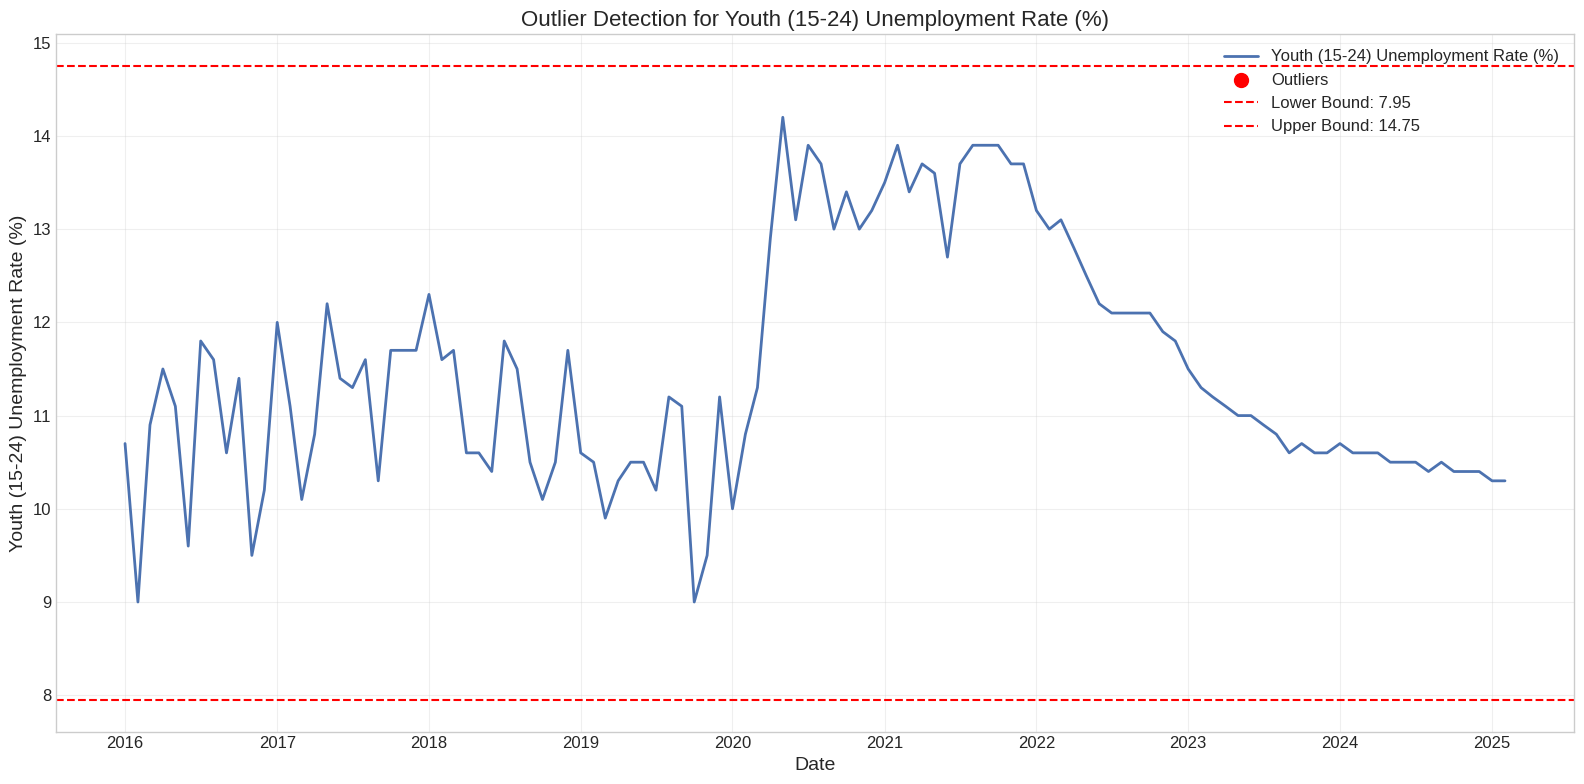


Outlier Analysis for Young Adult (15-30) Unemployment Rate (%):
Number of outliers detected: 13
Percentage of outliers: 11.82%
Outlier bounds: (5.29, 8.79)
Outlier values:
  Date: 2020-04-01 00:00:00, Value: 9.00
  Date: 2020-05-01 00:00:00, Value: 10.00
  Date: 2020-06-01 00:00:00, Value: 9.70
  Date: 2020-07-01 00:00:00, Value: 9.70
  Date: 2020-08-01 00:00:00, Value: 8.90
  Date: 2020-10-01 00:00:00, Value: 8.90
  Date: 2020-11-01 00:00:00, Value: 8.80
  Date: 2021-01-01 00:00:00, Value: 9.20
  Date: 2021-02-01 00:00:00, Value: 9.20
  Date: 2021-03-01 00:00:00, Value: 9.30
  Date: 2021-05-01 00:00:00, Value: 9.20
  Date: 2021-06-01 00:00:00, Value: 9.40
  Date: 2021-08-01 00:00:00, Value: 8.80


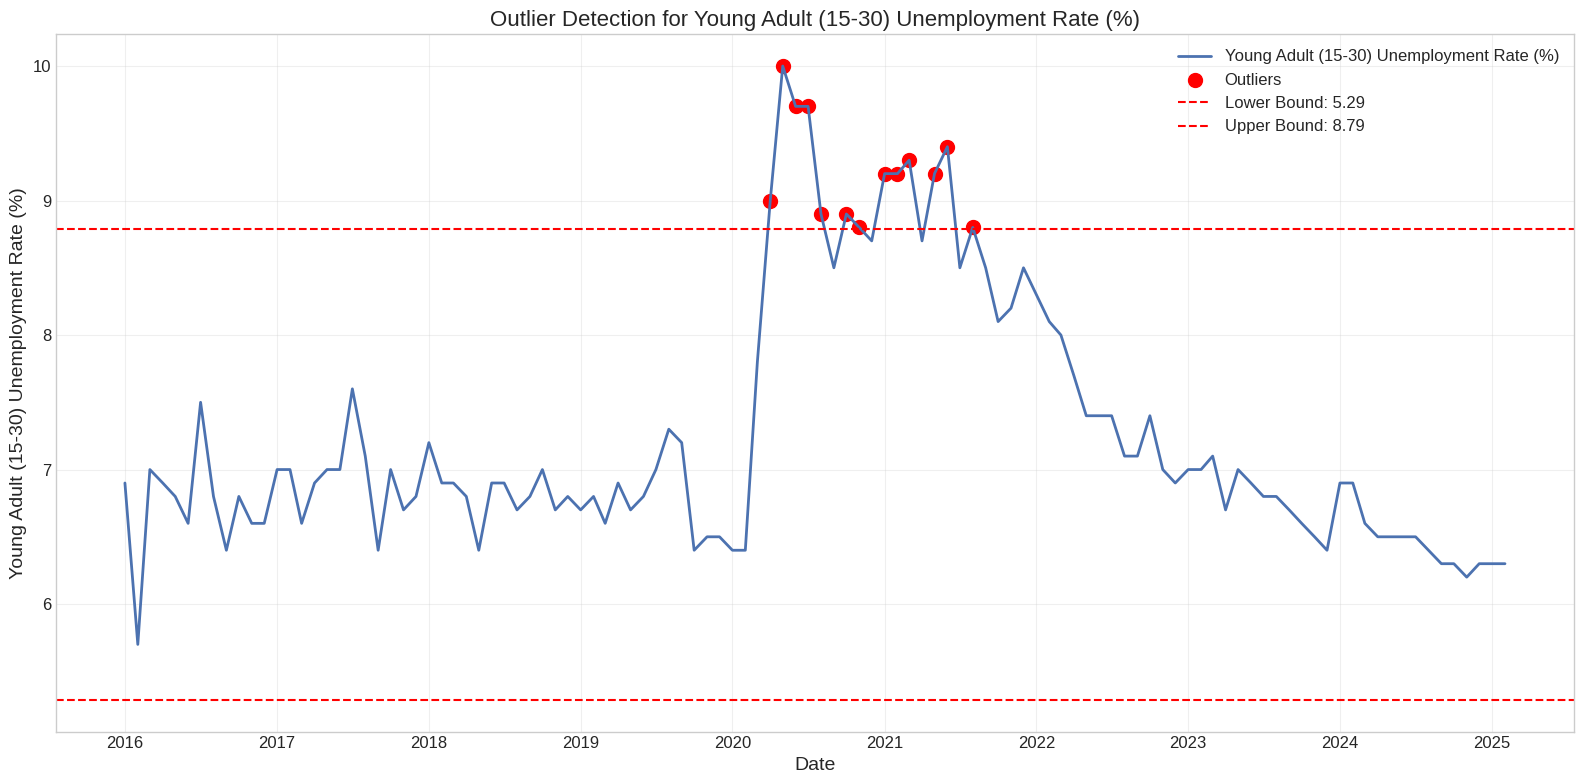

In [ ]:
# Create function for outlier detection
def detect_outliers(series, name):
    # Calculate Q1, Q3, and IQR
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = series[(series < lower_bound) | (series > upper_bound)]

    # Print outlier information
    print(f"\nOutlier Analysis for {name}:")
    print(f"Number of outliers detected: {len(outliers)}")
    print(f"Percentage of outliers: {len(outliers) / len(series) * 100:.2f}%")
    print(f"Outlier bounds: ({lower_bound:.2f}, {upper_bound:.2f})")

    if len(outliers) > 0:
        print("Outlier values:")
        for idx, value in outliers.items():
            # Trying to determine date for the outlier
            if hasattr(idx, 'strftime'):  
                outlier_date = idx.strftime('%Y-%m-%d')
            elif isinstance(idx, (int, np.integer)):  
                if 'date' in lfs_month.columns and len(series) == len(lfs_month):
                    outlier_date = lfs_month.iloc[idx]['date'] if idx < len(lfs_month) else 'Unknown'
                elif 'date' in lfs_month_youth.columns and len(series) == len(lfs_month_youth):
                    outlier_date = lfs_month_youth.iloc[idx]['date'] if idx < len(lfs_month_youth) else 'Unknown'
                else:
                    outlier_date = 'Unknown'
            else:
                outlier_date = 'Unknown'

            print(f"  Date: {outlier_date}, Value: {value:.2f}")

    # Plot the series with outliers highlighted
    plt.figure(figsize=(16, 8))

    # Get dates for plotting
    if 'date' in lfs_month.columns:
        if len(series) == len(lfs_month):
            dates = lfs_month['date']
        elif len(series) == len(lfs_month_youth):
            dates = lfs_month_youth['date']
        else:
            dates = pd.date_range(start='2010-01-01', periods=len(series), freq='M')
    else:
        dates = pd.date_range(start='2010-01-01', periods=len(series), freq='M')

    # Create a DataFrame with dates and series
    plot_df = pd.DataFrame({
        'date': dates,
        'value': series
    })

    # Plot the series
    plt.plot(plot_df['date'], plot_df['value'], label=name, linewidth=2)

    # Highlight outliers
    outlier_dates = []
    outlier_values = []

    for idx, value in outliers.items():
        if isinstance(idx, (int, np.integer)):
            if idx < len(plot_df):
                outlier_dates.append(plot_df['date'].iloc[idx])
                outlier_values.append(value)
        elif hasattr(idx, 'strftime'):  # If index is a datetime
            outlier_dates.append(idx)
            outlier_values.append(value)

    plt.scatter(outlier_dates, outlier_values, color='red', s=100, label='Outliers')

    # Add horizontal lines for outlier bounds
    plt.axhline(y=lower_bound, color='r', linestyle='--', label=f'Lower Bound: {lower_bound:.2f}')
    plt.axhline(y=upper_bound, color='r', linestyle='--', label=f'Upper Bound: {upper_bound:.2f}')

    plt.title(f'Outlier Detection for {name}', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel(name, fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Detect outliers for each metric
for series, name in metrics:
    detect_outliers(series, name)

## Correlation & Relationship Analysis

### Correlation analysis for data preparation

In [ ]:
# Create a combined dataset with all key variables
for df in [lfs_month, lfs_month_sa, lfs_month_youth, lfs_month_duration, lfs_month_status]:
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])

# Create a base dataframe with dates
correlation_df = pd.DataFrame({'date': lfs_month['date']})

# Add main labor force metrics
key_cols = ['lf', 'lf_employed', 'lf_unemployed', 'p_rate', 'u_rate', 'ep_ratio']
for col in key_cols:
    if col in lfs_month.columns:
        correlation_df[col] = lfs_month[col]

# Add youth unemployment metrics
if 'date' in lfs_month_youth.columns:
    # Merge youth unemployment data
    youth_df = lfs_month_youth[['date', 'u_rate_15_24', 'u_rate_15_30']]
    correlation_df = pd.merge(correlation_df, youth_df, on='date', how='left')

# Add unemployment duration metrics
if 'date' in lfs_month_duration.columns:
    # Select relevant columns for duration
    duration_cols = ['date', 'unemployed_active', 'unemployed_active_3mo',
                     'unemployed_active_6mo', 'unemployed_active_12mo',
                     'unemployed_active_long', 'unemployed_inactive']

    duration_df = lfs_month_duration[duration_cols]
    correlation_df = pd.merge(correlation_df, duration_df, on='date', how='left')

# Add employment status distribution
if 'variable' in lfs_month_status.columns:
    # Need to pivot the data first
    status_pivoted = lfs_month_status.pivot_table(
        index='date',
        columns='variable',
        values=['employed', 'employed_employer', 'employed_employee',
                'employed_own_account', 'employed_unpaid_family']
    ).reset_index()

    # Flatten the column hierarchy
    status_pivoted.columns = ['_'.join(col).strip() if col[1] else col[0] for col in status_pivoted.columns.values]

    correlation_df = pd.merge(correlation_df, status_pivoted, on='date', how='left')
else:
    # Select only employment distribution columns
    status_cols = ['date', 'employed', 'employed_employer', 'employed_employee',
                  'employed_own_account', 'employed_unpaid_family']

    status_df = lfs_month_status[status_cols]
    correlation_df = pd.merge(correlation_df, status_df, on='date', how='left')

# Set date as index
correlation_df = correlation_df.set_index('date')

# Display the shape of the combined dataframe
print(f"Combined dataframe shape: {correlation_df.shape}")
print(f"Columns in combined dataframe: {correlation_df.columns.tolist()}")

Combined dataframe shape: (182, 24)
Columns in combined dataframe: ['lf', 'lf_employed', 'lf_unemployed', 'p_rate', 'u_rate', 'ep_ratio', 'u_rate_15_24', 'u_rate_15_30', 'unemployed_active', 'unemployed_active_3mo', 'unemployed_active_6mo', 'unemployed_active_12mo', 'unemployed_active_long', 'unemployed_inactive', 'employed_persons', 'employed_share', 'employed_employee_persons', 'employed_employee_share', 'employed_employer_persons', 'employed_employer_share', 'employed_own_account_persons', 'employed_own_account_share', 'employed_unpaid_family_persons', 'employed_unpaid_family_share']


### Correlation Matrix and Heatmap

Checking data before correlation analysis:
Shape of correlation_df: (182, 24)
Column types:
lf                                float64
lf_employed                       float64
lf_unemployed                     float64
p_rate                            float64
u_rate                            float64
ep_ratio                          float64
u_rate_15_24                      float64
u_rate_15_30                      float64
unemployed_active                 float64
unemployed_active_3mo             float64
unemployed_active_6mo             float64
unemployed_active_12mo            float64
unemployed_active_long            float64
unemployed_inactive               float64
employed_persons                  float64
employed_share                    float64
employed_employee_persons         float64
employed_employee_share           float64
employed_employer_persons         float64
employed_employer_share           float64
employed_own_account_persons      float64
employed_own_account_share

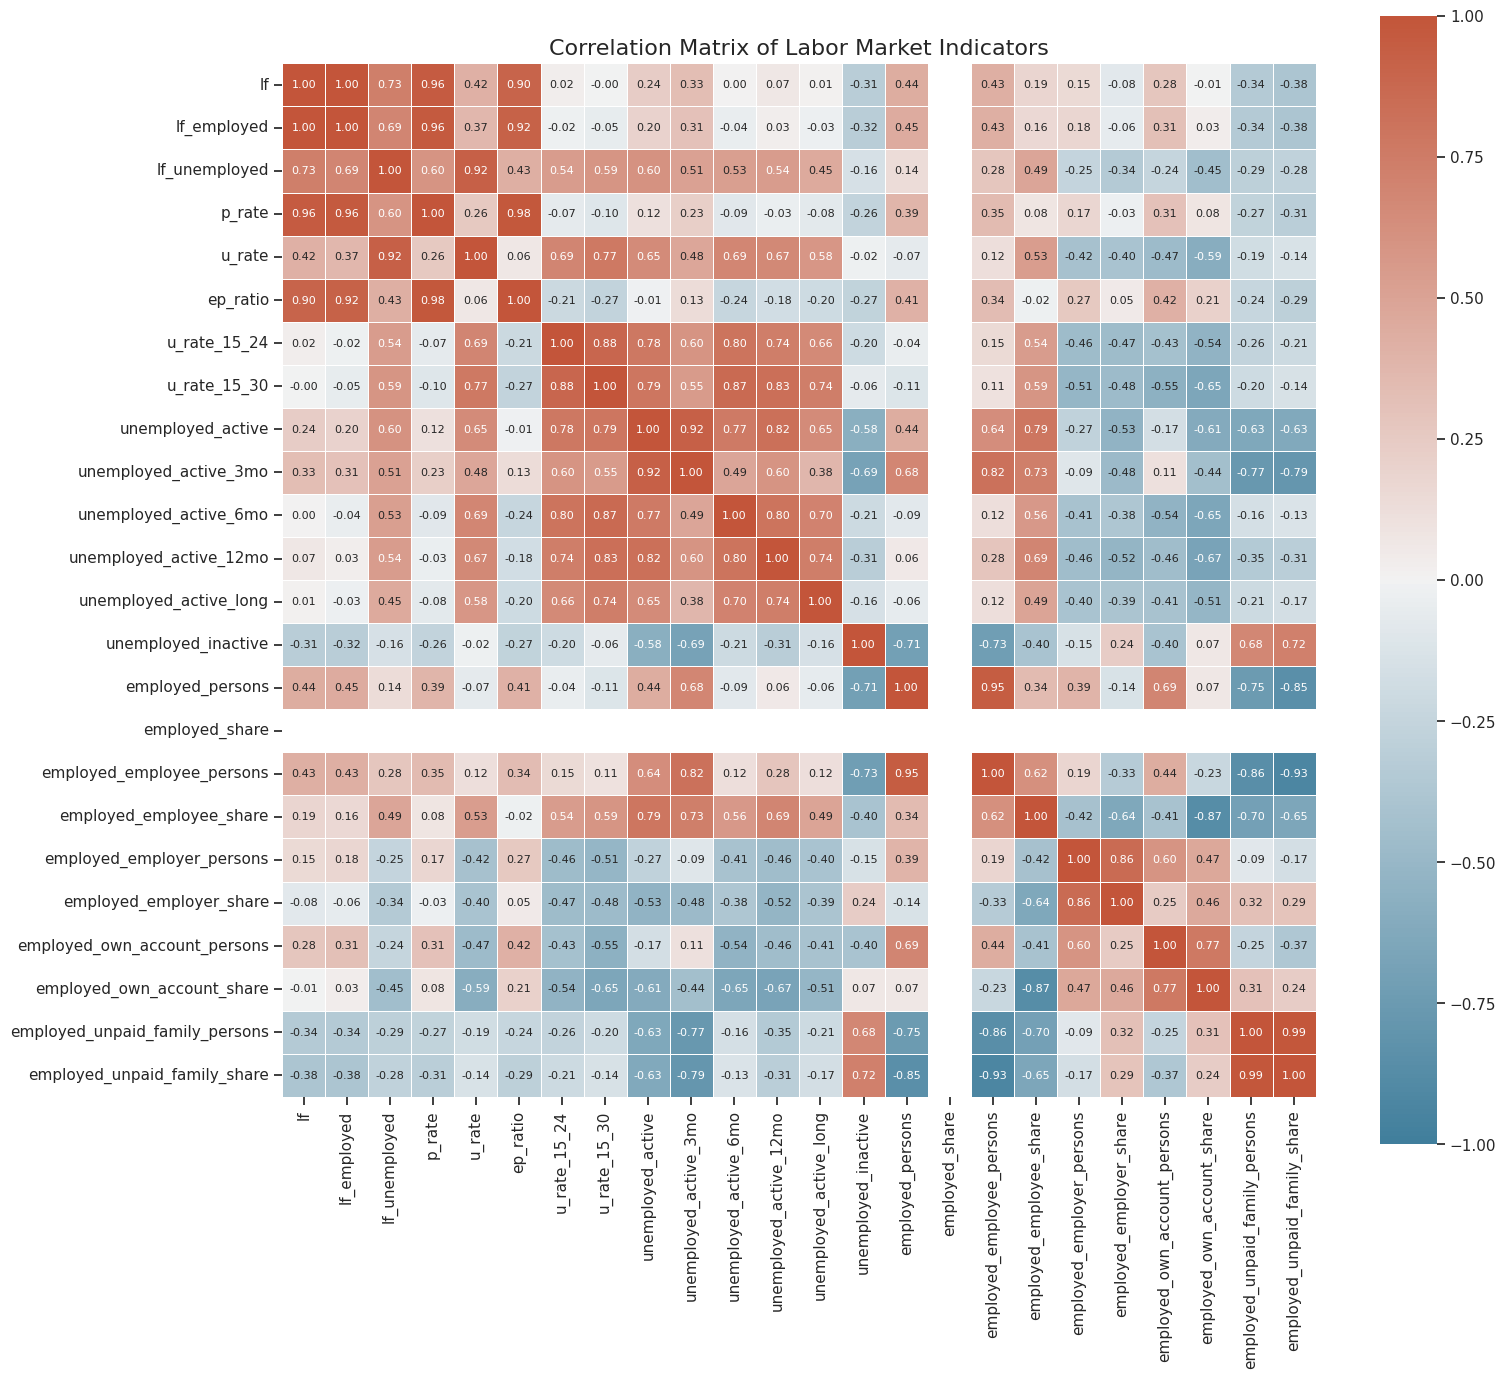


Strongly Correlated Variable Pairs (|correlation| >= 0.7):


Variable 1                      Variable 2  \
0                               lf                     lf_employed   
39  employed_unpaid_family_persons    employed_unpaid_family_share   
7                           p_rate                        ep_ratio   
4                      lf_employed                          p_rate   
2                               lf                          p_rate   
31                employed_persons       employed_employee_persons   
35       employed_employee_persons    employed_unpaid_family_share   
6                    lf_unemployed                          u_rate   
17               unemployed_active           unemployed_active_3mo   
5                      lf_employed                        ep_ratio   
3                               lf                        ep_ratio   
9                     u_rate_15_24                    u_rate_15_30   
36         employed_employee_share      employed_own_account_share   
14                    u_rate_15_30           unemployed_active_6mo   
34       employed_employee_persons  employed_unpaid_family_persons   
37       employed_employer_persons         employed_employer_share   
33                employed_persons    employed_unpaid_family_share   
15                    u_rate_15_30          unemployed_active_12mo   
19               unemployed_active          unemployed_active_12mo   
21           unemployed_active_3mo       employed_employee_persons   
11                    u_rate_15_24           unemployed_active_6mo   
25           unemployed_active_6mo          unemployed_active_12mo   
24           unemployed_active_3mo    employed_unpaid_family_share   
20               unemployed_active         employed_employee_share   
13                    u_rate_15_30               unemployed_active   
10                    u_rate_15_24               unemployed_active   
8                           u_rate                    u_rate_15_30   
23           unemployed_active_3mo  employed_unpaid_family_persons   
38    employed_own_account_persons      employed_own_account_share   
18               unemployed_active           unemployed_active_6mo   
32                employed_persons  employed_unpaid_family_persons   
12                    u_rate_15_24          unemployed_active_12mo   
16                    u_rate_15_30          unemployed_active_long   
27          unemployed_active_12mo          unemployed_active_long   
22           unemployed_active_3mo         employed_employee_share   
1                               lf                   lf_unemployed   
29             unemployed_inactive       employed_employee_persons   
30             unemployed_inactive    employed_unpaid_family_share   
28             unemployed_inactive                employed_persons   
26           unemployed_active_6mo          unemployed_active_long   

    Correlation  Abs Correlation  
0      0.998442         0.998442  
39     0.985382         0.985382  
7      0.979629         0.979629  
4      0.964220         0.964220  
2      0.957133         0.957133  
31     0.948665         0.948665  
35    -0.925933         0.925933  
6      0.923185         0.923185  
17     0.922643         0.922643  
5      0.920998         0.920998  
3      0.903062         0.903062  
9      0.883384         0.883384  
36    -0.867402         0.867402  
14     0.865795         0.865795  
34    -0.858902         0.858902  
37     0.856004         0.856004  
33    -0.847927         0.847927  
15     0.828236         0.828236  
19     0.823572         0.823572  
21     0.818024         0.818024  
11     0.799395         0.799395  
25     0.798016         0.798016  
24    -0.788890         0.788890  
20     0.787836         0.787836  
13     0.785746         0.785746  
10     0.776760         0.776760  
8      0.770927         0.770927  
23    -0.768553         0.768553  
38     0.767373         0.767373  
18     0.765295         0.765295  
32    -0.747930         0.747930  
12     0.742141         0.742141 

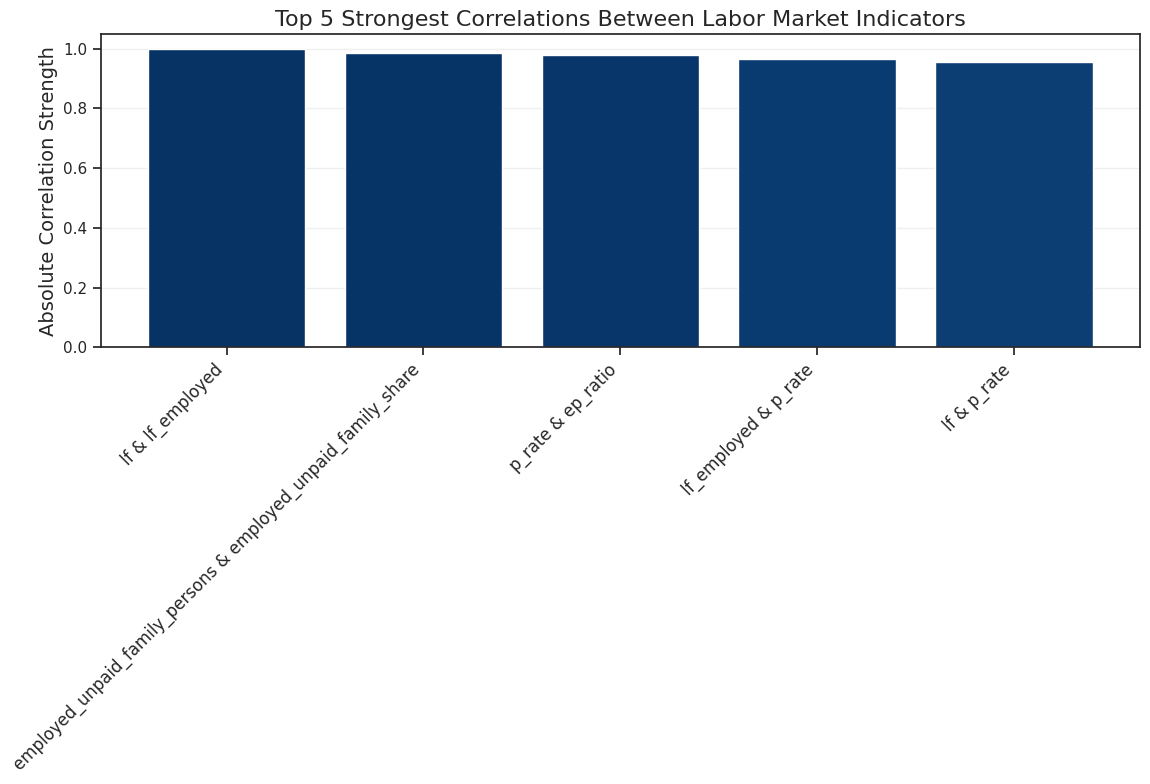

In [ ]:
# First, check all columns for any issues
print("Checking data before correlation analysis:")
print(f"Shape of correlation_df: {correlation_df.shape}")
print("Column types:")
print(correlation_df.dtypes)
print("\nMissing values by column:")
print(correlation_df.isnull().sum())

# Select only numeric columns and drop any columns with all NaN values
numeric_df = correlation_df.select_dtypes(include=['float64', 'int64'])
for col in numeric_df.columns:
    if numeric_df[col].isnull().all():
        print(f"Dropping empty column: {col}")
        numeric_df = numeric_df.drop(col, axis=1)

for col in numeric_df.columns:
    if numeric_df[col].isnull().any():
        print(f"Column {col} has {numeric_df[col].isnull().sum()} missing values. Filling with mean.")
        numeric_df[col] = numeric_df[col].fillna(numeric_df[col].mean())

# Check if we have enough data after cleaning
if len(numeric_df.columns) > 1:
    print(f"\nCalculating correlation matrix with {len(numeric_df.columns)} variables")

    # Calculate correlation matrix with minimum periods parameter to handle partial data
    corr_matrix = numeric_df.corr(method='pearson', min_periods=10)

    # Plot the correlation heatmap
    plt.figure(figsize=(16, 14))

    if not corr_matrix.isnull().any().any():
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    else:
        print("Warning: Correlation matrix contains NaN values. Not using upper triangle mask.")
        mask = None

    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Create heatmap with appropriate mask
    if mask is not None:
        sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
                   square=True, linewidths=.5, annot=True, fmt=".2f", annot_kws={"size": 8})
    else:
        sns.heatmap(corr_matrix, cmap=cmap, vmax=1, vmin=-1, center=0,
                   square=True, linewidths=.5, annot=True, fmt=".2f", annot_kws={"size": 8})

    plt.title('Correlation Matrix of Labor Market Indicators', fontsize=16)
    plt.tight_layout()
    plt.show()

    # Identify strongly correlated pairs (excluding self-correlations)
    strong_threshold = 0.7
    strong_corr = pd.DataFrame(columns=['Variable 1', 'Variable 2', 'Correlation'])

    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            # Skip if there's a NaN value
            if pd.isna(corr_matrix.iloc[i, j]):
                continue

            if abs(corr_matrix.iloc[i, j]) >= strong_threshold:
                strong_corr = pd.concat([strong_corr, pd.DataFrame({
                    'Variable 1': [corr_matrix.columns[i]],
                    'Variable 2': [corr_matrix.columns[j]],
                    'Correlation': [corr_matrix.iloc[i, j]],
                    'Abs Correlation': [abs(corr_matrix.iloc[i, j])]
                })], ignore_index=True)

    # Sort by absolute correlation value
    strong_corr = strong_corr.sort_values('Abs Correlation', ascending=False)

    if len(strong_corr) > 0:
        print("\nStrongly Correlated Variable Pairs (|correlation| >= 0.7):")
        display(strong_corr)

        # Visualize top 5 correlations
        top_5 = strong_corr.head(5)
        plt.figure(figsize=(12, 8))

        plt.bar(
            [f"{row['Variable 1']} & {row['Variable 2']}" for _, row in top_5.iterrows()],
            top_5['Abs Correlation'],
            color=[plt.cm.RdBu(int((corr + 1) * 127.5)) for corr in top_5['Correlation']]
        )

        plt.title('Top 5 Strongest Correlations Between Labor Market Indicators', fontsize=16)
        plt.ylabel('Absolute Correlation Strength', fontsize=14)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print("\nNo variable pairs with correlation >= 0.7 found.")
else:
    print("Not enough columns for correlation analysis after cleaning")

### Scattered plot of key relationships

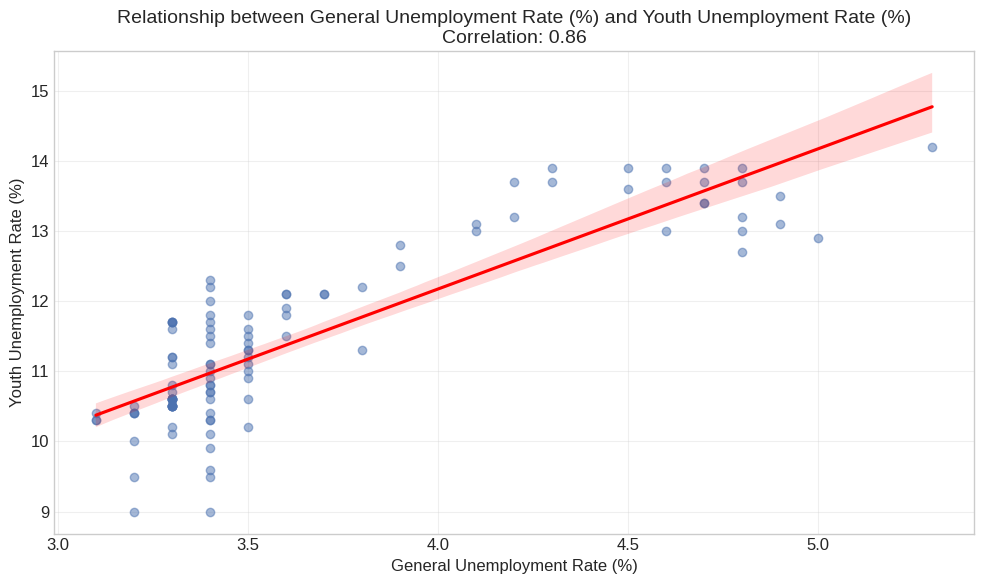

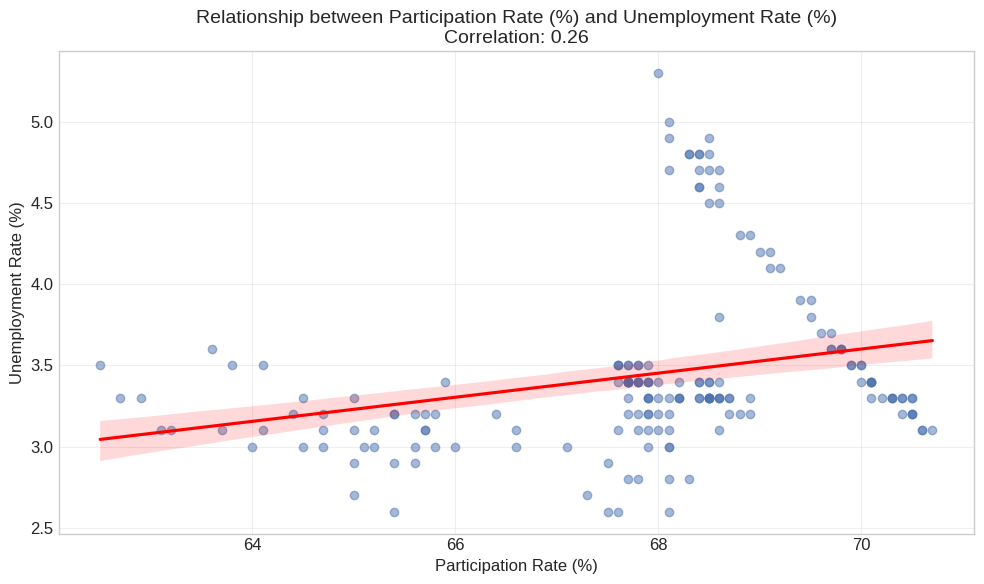

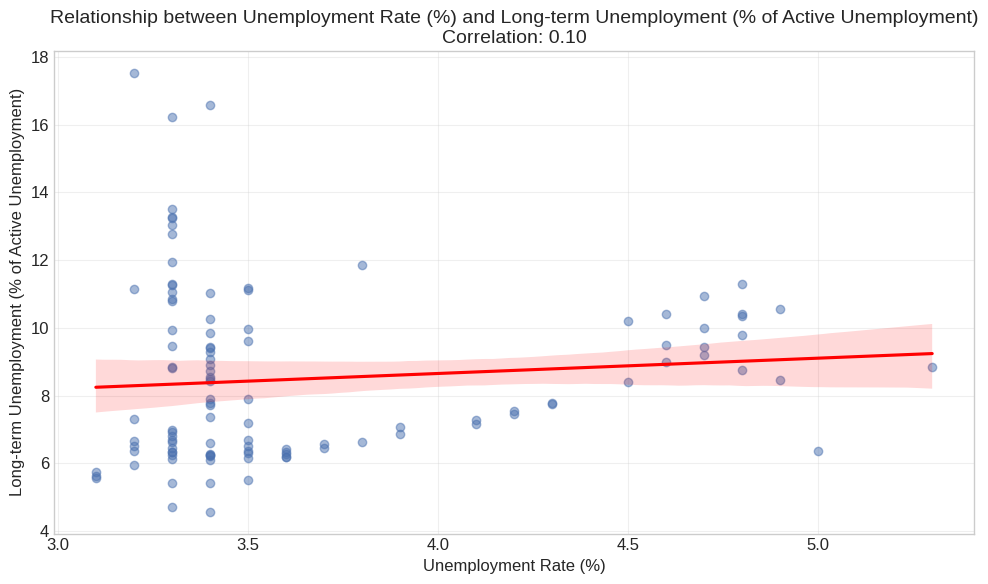

<Figure size 1200x1000 with 0 Axes>

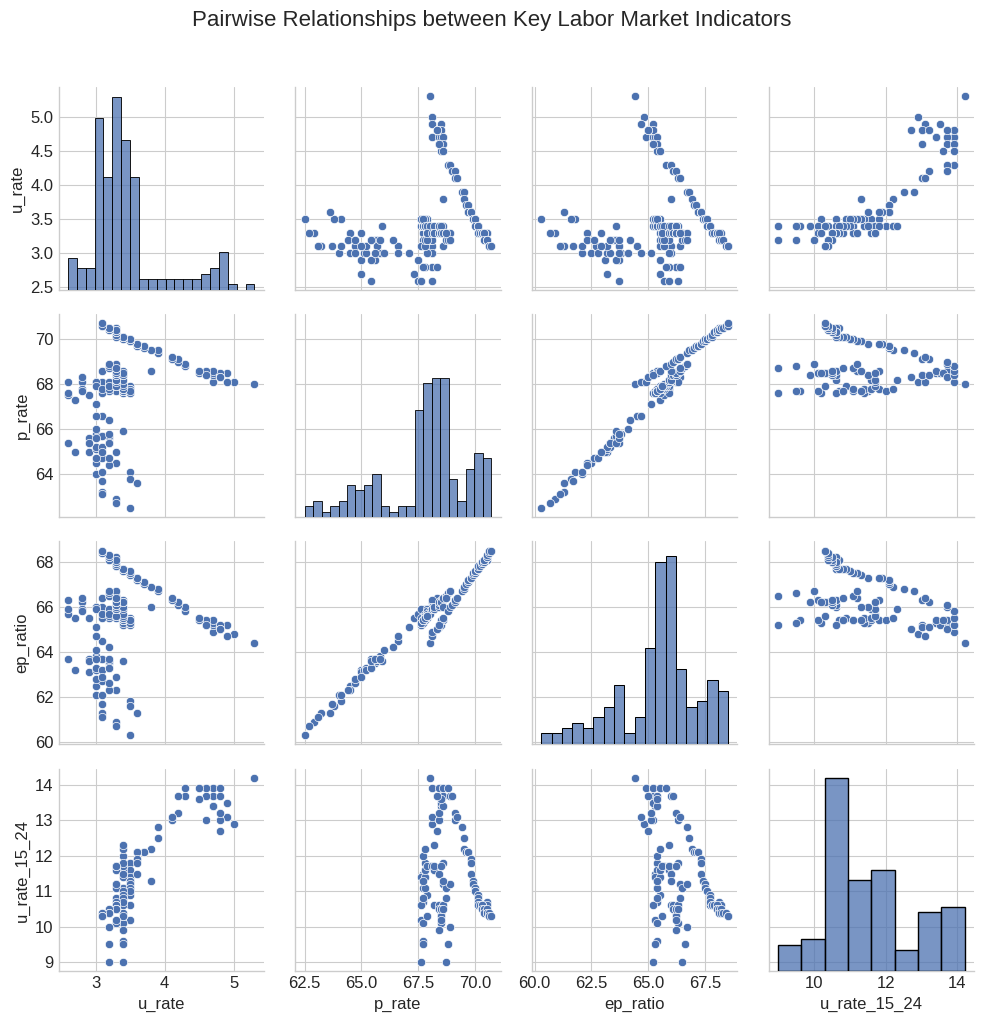

In [ ]:
# Function to create scatter plots with regression line
def plot_relationship(x, y, x_label, y_label):
    plt.figure(figsize=(10, 6))

    # Create scatter plot
    sns.regplot(x=x, y=y, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

    # Calculate correlation coefficient
    corr = x.corr(y)

    plt.title(f'Relationship between {x_label} and {y_label}\nCorrelation: {corr:.2f}', fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Define key relationships to explore
relationships = []

# Unemployment and Youth Unemployment
if all(col in correlation_df.columns for col in ['u_rate', 'u_rate_15_24']):
    relationships.append((correlation_df['u_rate'], correlation_df['u_rate_15_24'],
                          'General Unemployment Rate (%)', 'Youth Unemployment Rate (%)'))

# Labor force participation and unemployment
if all(col in correlation_df.columns for col in ['p_rate', 'u_rate']):
    relationships.append((correlation_df['p_rate'], correlation_df['u_rate'],
                          'Participation Rate (%)', 'Unemployment Rate (%)'))

# Long-term unemployment and overall unemployment
if all(col in correlation_df.columns for col in ['unemployed_active_long', 'u_rate']):
    long_term_pct = correlation_df['unemployed_active_long'] / correlation_df['unemployed_active'] * 100
    relationships.append((correlation_df['u_rate'], long_term_pct,
                         'Unemployment Rate (%)', 'Long-term Unemployment (% of Active Unemployment)'))

# Employment structure and unemployment
if all(col in correlation_df.columns for col in ['employed_employee', 'employed', 'u_rate']):
    employee_pct = correlation_df['employed_employee'] / correlation_df['employed'] * 100
    relationships.append((employee_pct, correlation_df['u_rate'],
                         'Employee Share (% of Employed)', 'Unemployment Rate (%)'))

# Plot each relationship
for x, y, x_label, y_label in relationships:
    plot_relationship(x, y, x_label, y_label)

# Create pairplot for key variables
key_variables = ['u_rate', 'p_rate', 'ep_ratio']
if 'u_rate_15_24' in correlation_df.columns:
    key_variables.append('u_rate_15_24')

plt.figure(figsize=(12, 10))
sns.pairplot(correlation_df[key_variables], height=2.5)
plt.suptitle('Pairwise Relationships between Key Labor Market Indicators', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## Seasonally Adjusted vs Non-Adjusted Comparison

### Comparison

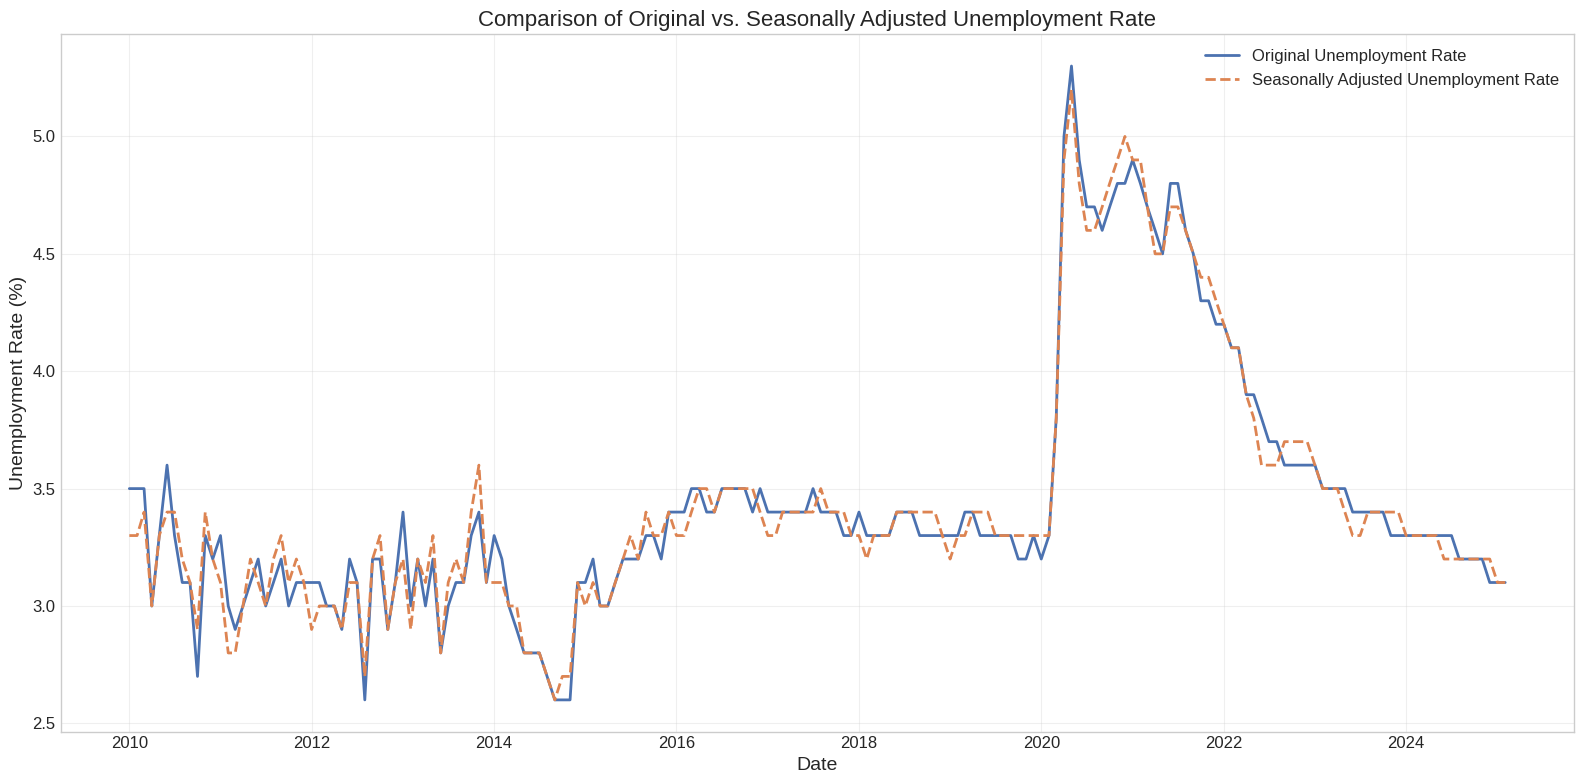

In [ ]:
lfs_month['date'] = pd.to_datetime(lfs_month['date'])
lfs_month_sa['date'] = pd.to_datetime(lfs_month_sa['date'])

# Create a combined dataset for comparison
sa_comparison = pd.merge(
    lfs_month[['date', 'u_rate']].rename(columns={'u_rate': 'u_rate_original'}),
    lfs_month_sa[['date', 'u_rate']].rename(columns={'u_rate': 'u_rate_sa'}),
    on='date', how='inner'
)

# Calculate the difference between original and seasonally adjusted values
sa_comparison['adjustment_effect'] = sa_comparison['u_rate_sa'] - sa_comparison['u_rate_original']

# Plot the comparison
plt.figure(figsize=(16, 8))

plt.plot(sa_comparison['date'], sa_comparison['u_rate_original'],
         label='Original Unemployment Rate', linewidth=2)
plt.plot(sa_comparison['date'], sa_comparison['u_rate_sa'],
         label='Seasonally Adjusted Unemployment Rate', linewidth=2, linestyle='--')

plt.title('Comparison of Original vs. Seasonally Adjusted Unemployment Rate', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployment Rate (%)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Analysis

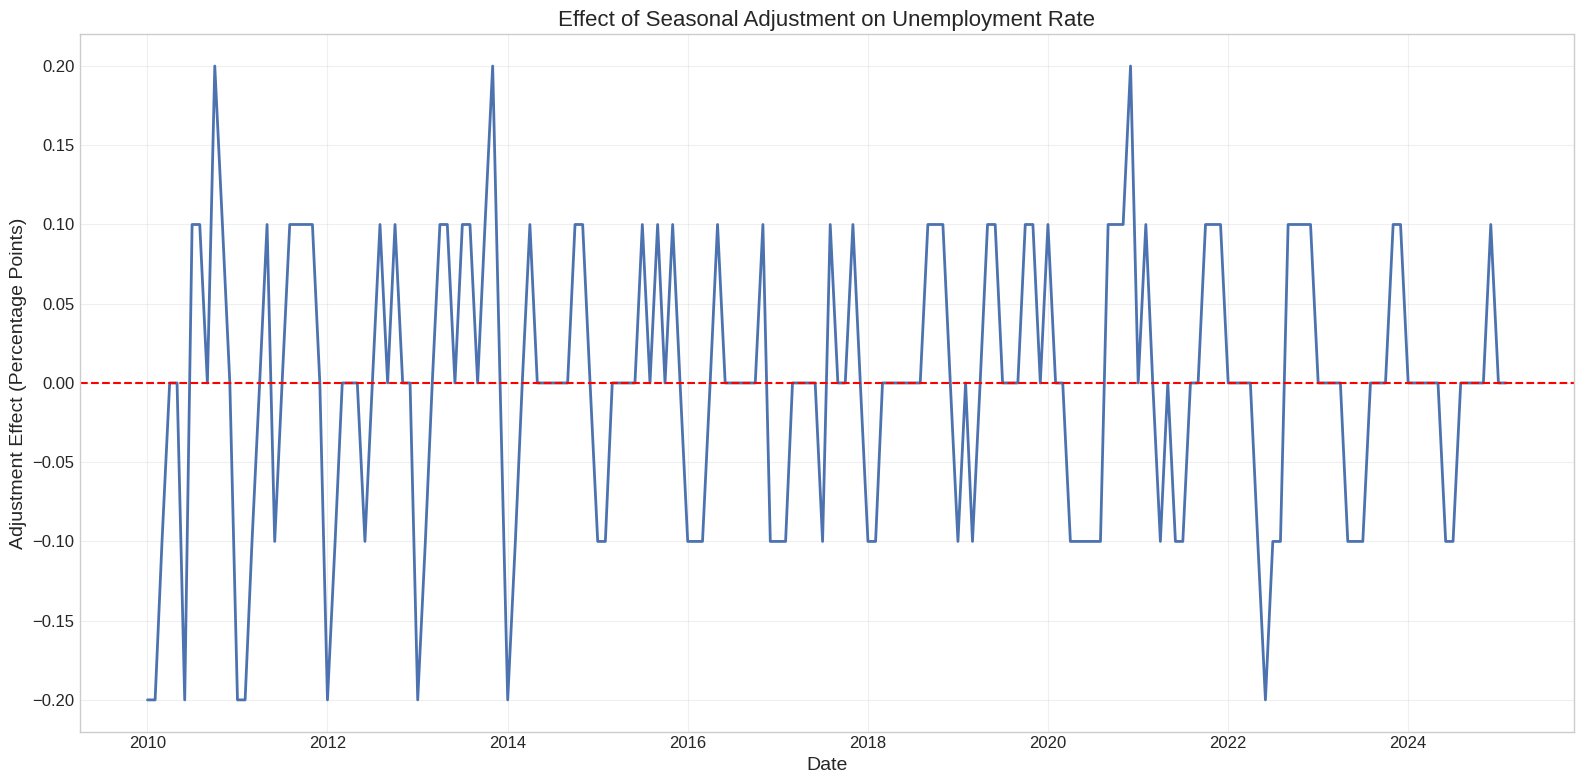

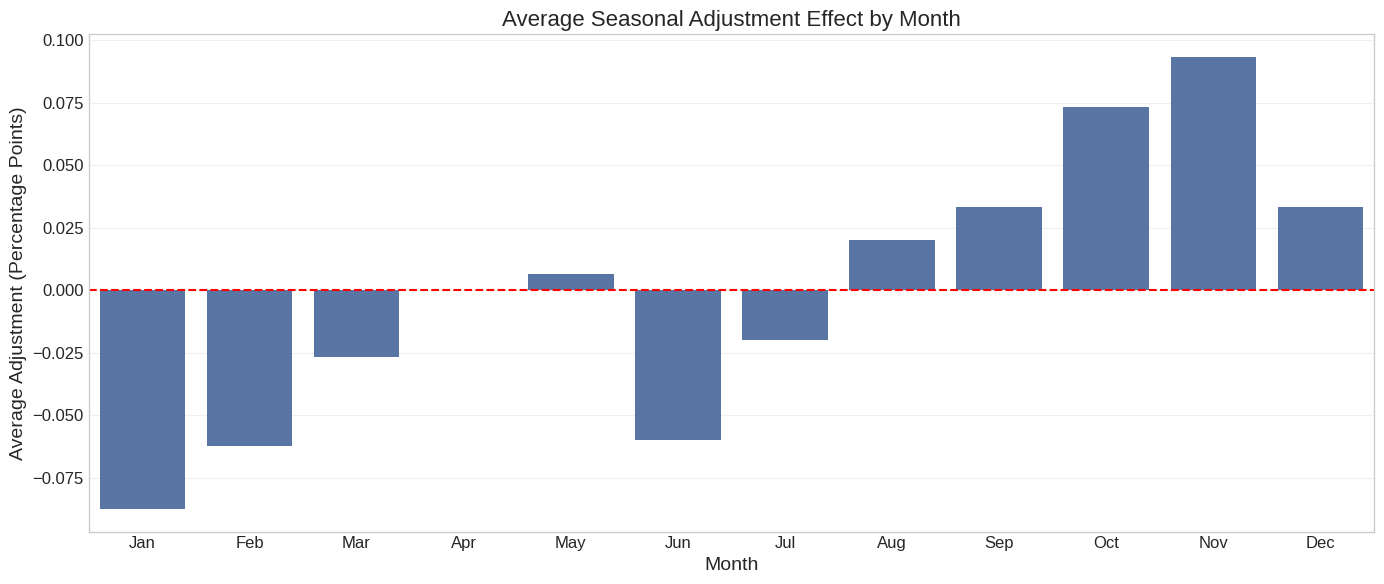

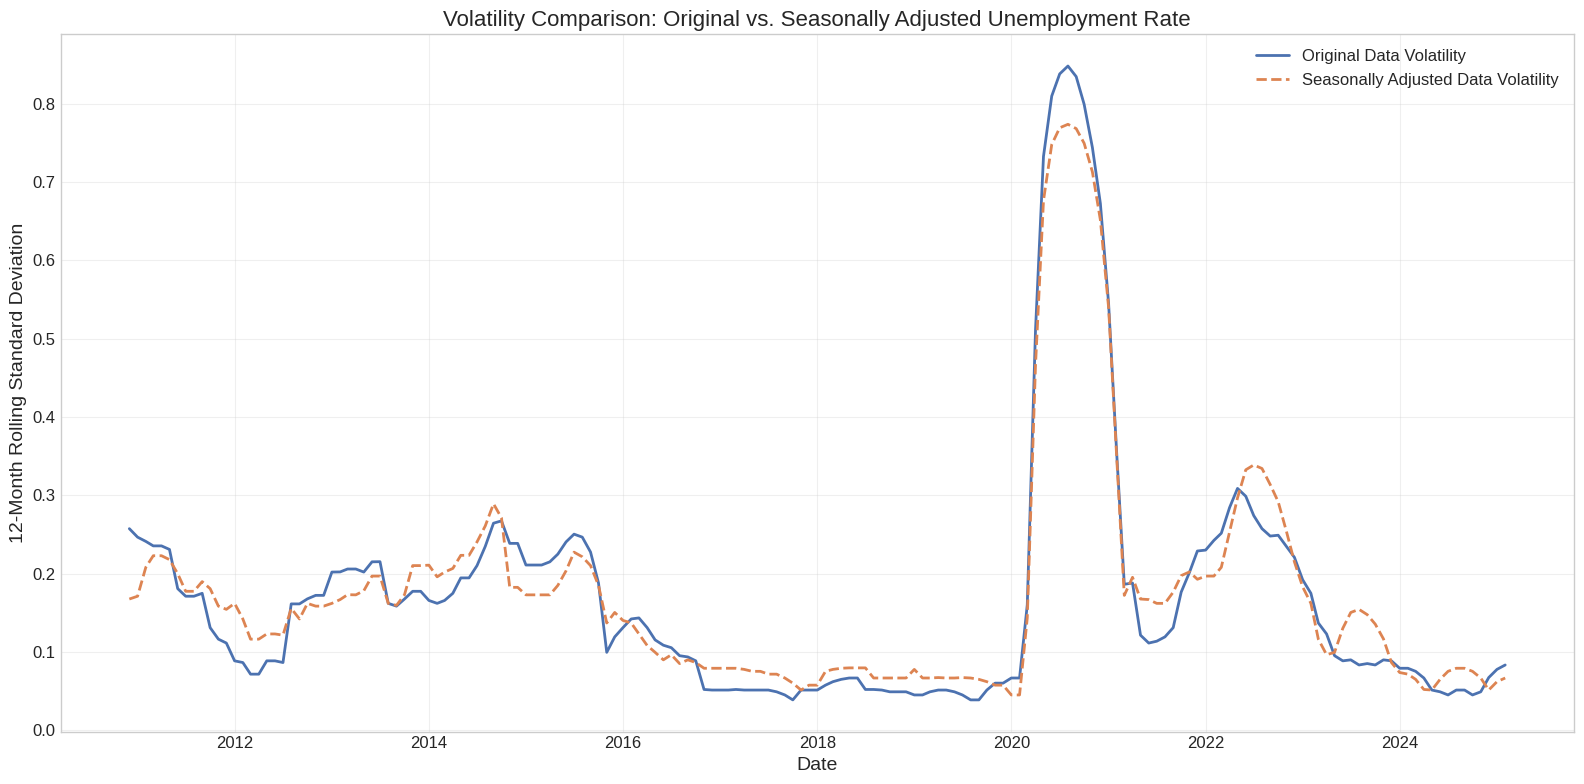

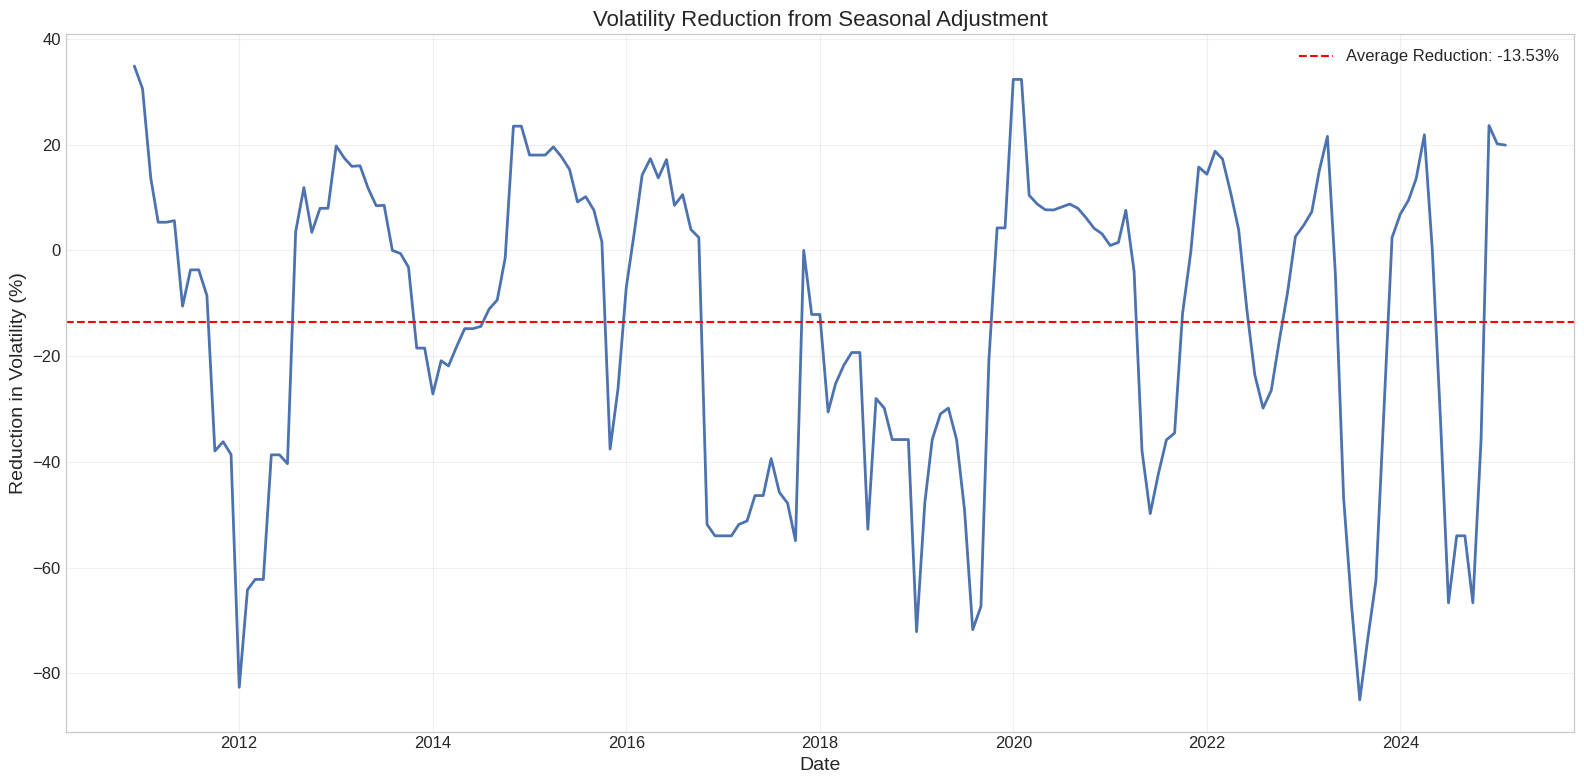

In [ ]:
# Plot the adjustment effect
plt.figure(figsize=(16, 8))

plt.plot(sa_comparison['date'], sa_comparison['adjustment_effect'], linewidth=2)
plt.axhline(y=0, color='r', linestyle='--')

plt.title('Effect of Seasonal Adjustment on Unemployment Rate', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjustment Effect (Percentage Points)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate monthly averages of adjustment effects to identify seasonal patterns
sa_comparison['month'] = sa_comparison['date'].dt.month
monthly_adjustments = sa_comparison.groupby('month')['adjustment_effect'].mean().reset_index()

plt.figure(figsize=(14, 6))

sns.barplot(x='month', y='adjustment_effect', data=monthly_adjustments)
plt.axhline(y=0, color='r', linestyle='--')

plt.title('Average Seasonal Adjustment Effect by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Adjustment (Percentage Points)', fontsize=14)
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Compare the volatility of original against seasonally adjusted data
original_volatility = sa_comparison['u_rate_original'].rolling(window=12).std()
sa_volatility = sa_comparison['u_rate_sa'].rolling(window=12).std()

plt.figure(figsize=(16, 8))

plt.plot(sa_comparison['date'], original_volatility,
         label='Original Data Volatility', linewidth=2)
plt.plot(sa_comparison['date'], sa_volatility,
         label='Seasonally Adjusted Data Volatility', linewidth=2, linestyle='--')

plt.title('Volatility Comparison: Original vs. Seasonally Adjusted Unemployment Rate', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('12-Month Rolling Standard Deviation', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate and display volatility reduction due to seasonal adjustment
volatility_reduction = (original_volatility - sa_volatility) / original_volatility * 100
avg_reduction = volatility_reduction.mean()

plt.figure(figsize=(16, 8))
plt.plot(sa_comparison['date'], volatility_reduction, linewidth=2)
plt.axhline(y=avg_reduction, color='r', linestyle='--',
           label=f'Average Reduction: {avg_reduction:.2f}%')

plt.title('Volatility Reduction from Seasonal Adjustment', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reduction in Volatility (%)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Relationships between seasonal adjustment and other metrics

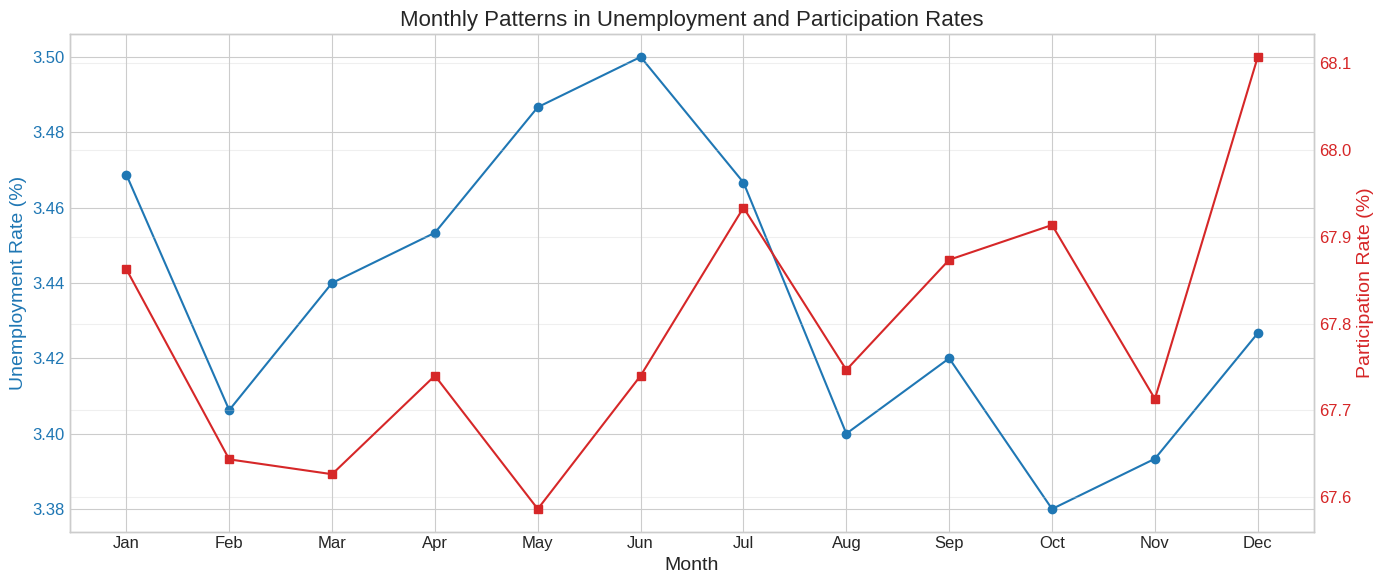

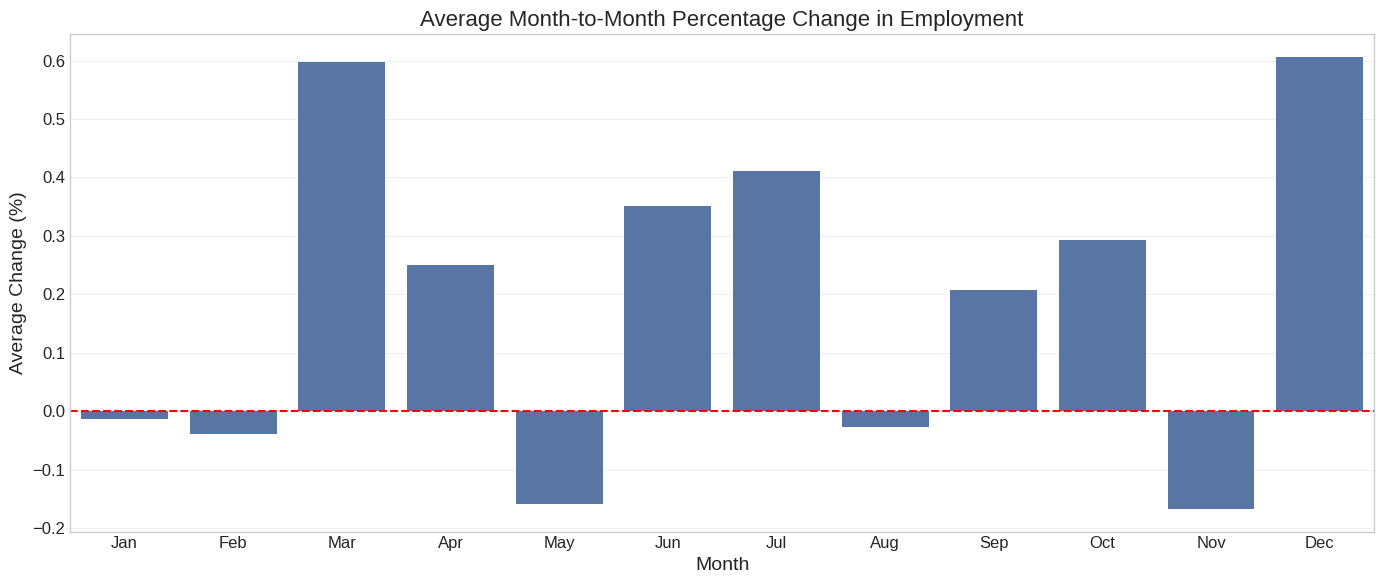

In [ ]:
# Compare seasonality in unemployment and participation rates 
if all(col in lfs_month.columns for col in ['u_rate', 'p_rate']):
    # Calculate month-to-month differences to identify seasonal patterns
    lfs_month['month'] = pd.to_datetime(lfs_month['date']).dt.month

    # Group by month and calculate average values
    monthly_averages = lfs_month.groupby('month').agg({
        'u_rate': 'mean',
        'p_rate': 'mean'
    }).reset_index()

    # Create figure with two y-axes for different scales
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Plot unemployment rate
    color = 'tab:blue'
    ax1.set_xlabel('Month', fontsize=14)
    ax1.set_ylabel('Unemployment Rate (%)', color=color, fontsize=14)
    ax1.plot(monthly_averages['month'], monthly_averages['u_rate'], color=color, marker='o')
    ax1.tick_params(axis='y', labelcolor=color)

    # Create second y-axis
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Participation Rate (%)', color=color, fontsize=14)
    ax2.plot(monthly_averages['month'], monthly_averages['p_rate'], color=color, marker='s')
    ax2.tick_params(axis='y', labelcolor=color)

    # Set x-ticks as month names
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    plt.title('Monthly Patterns in Unemployment and Participation Rates', fontsize=16)
    fig.tight_layout()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Calculate month-to-month percentage changes in employment
    if 'lf_employed' in lfs_month.columns:
        # Sort by date to ensure correct calculation
        lfs_month_sorted = lfs_month.sort_values('date')

        # Calculate month-to-month percentage change
        lfs_month_sorted['employment_pct_change'] = lfs_month_sorted['lf_employed'].pct_change() * 100

        # Extract month and year
        lfs_month_sorted['month'] = pd.to_datetime(lfs_month_sorted['date']).dt.month
        lfs_month_sorted['year'] = pd.to_datetime(lfs_month_sorted['date']).dt.year

        # Group by month and calculate average monthly change
        monthly_changes = lfs_month_sorted.groupby('month')['employment_pct_change'].mean().reset_index()

        plt.figure(figsize=(14, 6))

        sns.barplot(x='month', y='employment_pct_change', data=monthly_changes)
        plt.axhline(y=0, color='r', linestyle='--')

        plt.title('Average Month-to-Month Percentage Change in Employment', fontsize=16)
        plt.xlabel('Month', fontsize=14)
        plt.ylabel('Average Change (%)', fontsize=14)
        plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
else:
    print("Required columns for seasonal comparison of unemployment and participation rates not found.")

### Comparative Analysis of Employment Distribution Between Periods

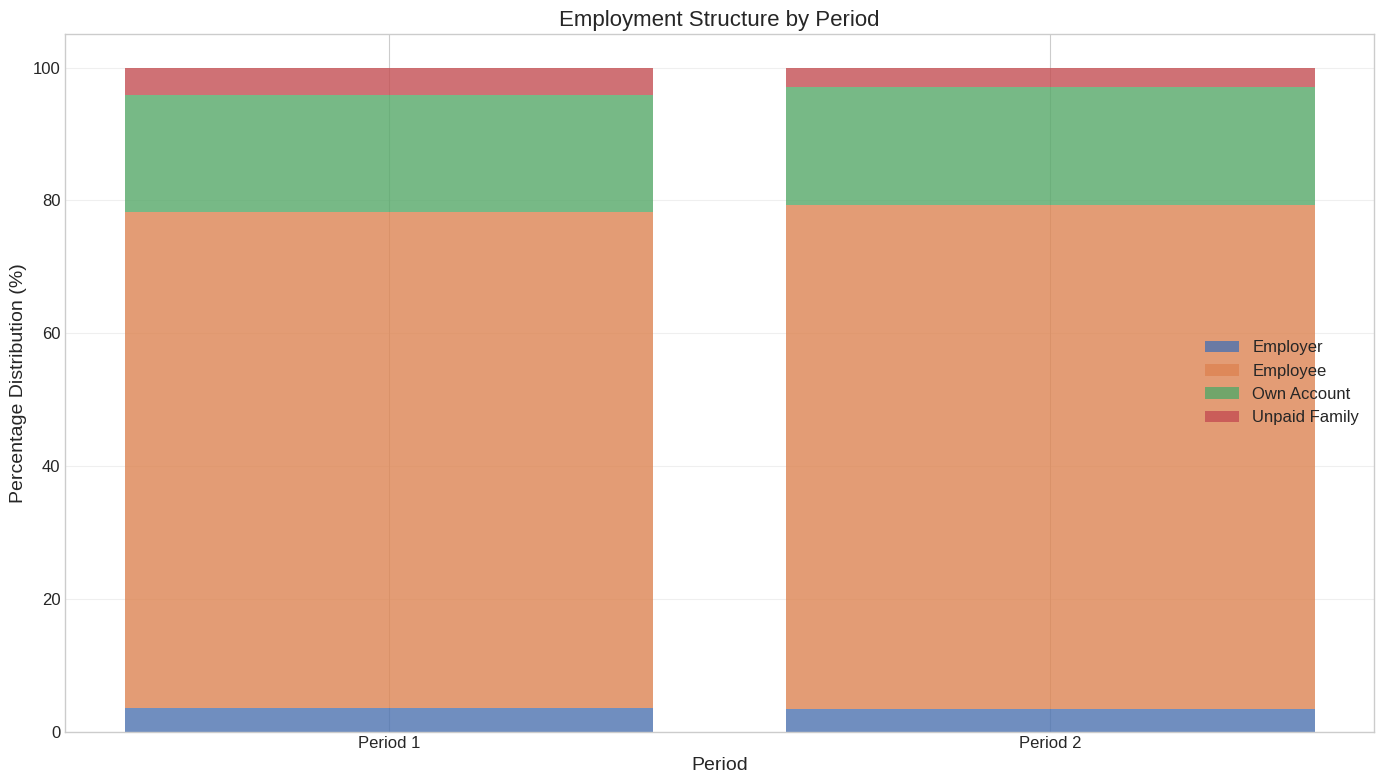

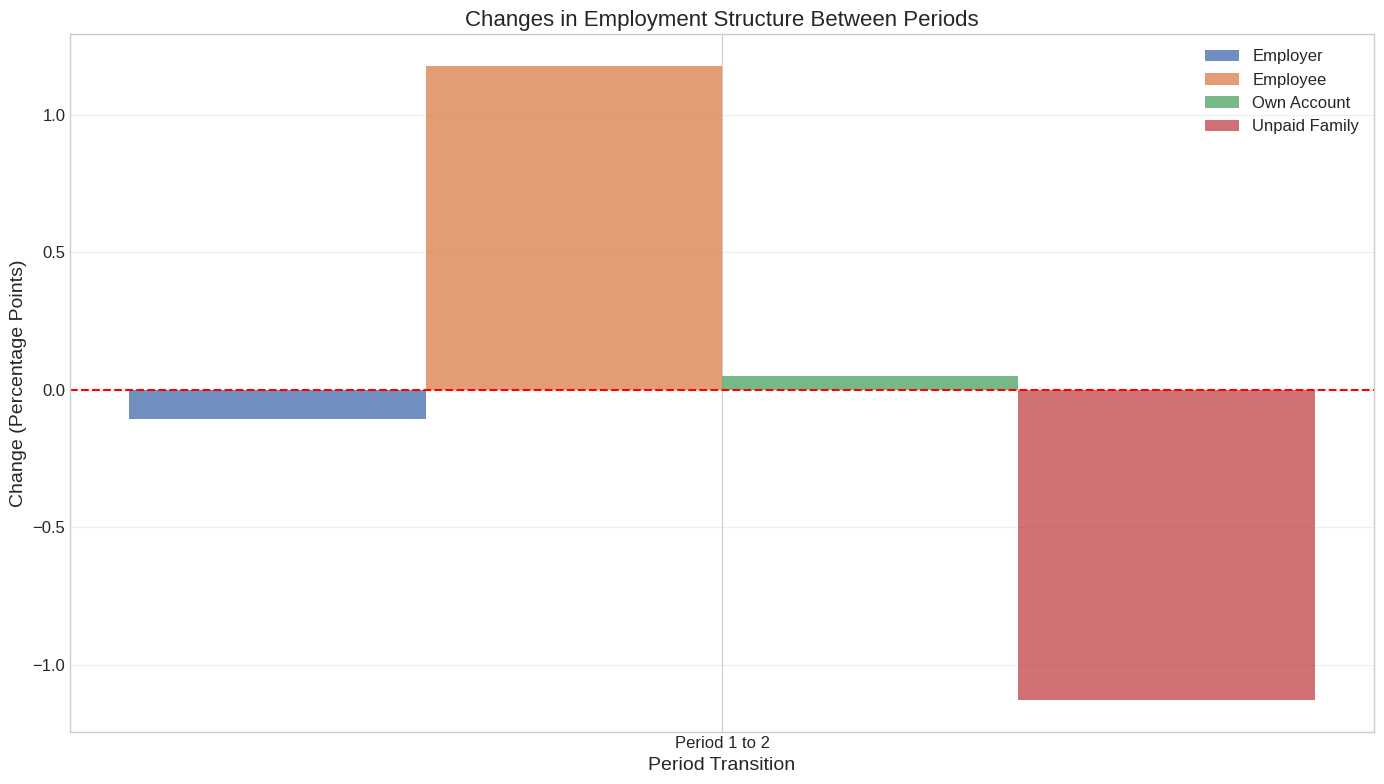


Changes in Employment Structure Between Periods:


Transition  Employer Change (pp)  Employee Change (pp)  \
0  Period 1 to 2              -0.10431              1.178253   

   Own Account Change (pp)  Unpaid Family Change (pp)  
0                 0.052375                  -1.127504

In [ ]:
if 'employed_employer' in lfs_month_status.columns and 'employed' in lfs_month_status.columns:
    lfs_month_status['date'] = pd.to_datetime(lfs_month_status['date'])
    lfs_status_ordered = lfs_month_status.sort_values('date')

    # Calculate percentage distribution
    status_cols = ['employed_employer', 'employed_employee', 'employed_own_account', 'employed_unpaid_family']
    for col in status_cols:
        lfs_status_ordered[f'{col}_pct'] = lfs_status_ordered[col] / lfs_status_ordered['employed'] * 100

    # Calculate average distribution for each period
    period_distributions = []

    for i in range(len(change_points) - 1):
        period_start = change_points[i]
        period_end = change_points[i+1]
        period_label = f"Period {i+1}: {period_start.strftime('%b %Y')} to {period_end.strftime('%b %Y')}"

        period_data = lfs_status_ordered[(lfs_status_ordered['date'] >= period_start) &
                                        (lfs_status_ordered['date'] <= period_end)]

        if len(period_data) > 0:
            period_dist = {
                'Period': period_label,
                'Employer (%)': period_data['employed_employer_pct'].mean(),
                'Employee (%)': period_data['employed_employee_pct'].mean(),
                'Own Account (%)': period_data['employed_own_account_pct'].mean(),
                'Unpaid Family (%)': period_data['employed_unpaid_family_pct'].mean()
            }

            period_distributions.append(period_dist)

    # Convert to DataFrame
    dist_df = pd.DataFrame(period_distributions)

    # Create a stacked bar chart
    plt.figure(figsize=(14, 8))

    # Extract just the period numbers for cleaner x-axis
    period_nums = [f"Period {i+1}" for i in range(len(dist_df))]

    # Create the stacked bar chart
    plt.bar(period_nums, dist_df['Employer (%)'], label='Employer', alpha=0.8)
    plt.bar(period_nums, dist_df['Employee (%)'], bottom=dist_df['Employer (%)'],
            label='Employee', alpha=0.8)

    bottom = dist_df['Employer (%)'] + dist_df['Employee (%)']
    plt.bar(period_nums, dist_df['Own Account (%)'], bottom=bottom,
            label='Own Account', alpha=0.8)

    bottom = bottom + dist_df['Own Account (%)']
    plt.bar(period_nums, dist_df['Unpaid Family (%)'], bottom=bottom,
            label='Unpaid Family', alpha=0.8)

    plt.title('Employment Structure by Period', fontsize=16)
    plt.xlabel('Period', fontsize=14)
    plt.ylabel('Percentage Distribution (%)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Calculate and display changes in structure between periods
    if len(dist_df) > 1:
        structure_changes = []

        for i in range(len(dist_df) - 1):
            changes = {
                'Transition': f"Period {i+1} to {i+2}",
                'Employer Change (pp)': dist_df['Employer (%)'].iloc[i+1] - dist_df['Employer (%)'].iloc[i],
                'Employee Change (pp)': dist_df['Employee (%)'].iloc[i+1] - dist_df['Employee (%)'].iloc[i],
                'Own Account Change (pp)': dist_df['Own Account (%)'].iloc[i+1] - dist_df['Own Account (%)'].iloc[i],
                'Unpaid Family Change (pp)': dist_df['Unpaid Family (%)'].iloc[i+1] - dist_df['Unpaid Family (%)'].iloc[i]
            }

            structure_changes.append(changes)

        # Convert to DataFrame
        changes_df = pd.DataFrame(structure_changes)

        # Plot the changes
        plt.figure(figsize=(14, 8))

        # Create a grouped bar chart
        bar_width = 0.2
        r1 = np.arange(len(changes_df))
        r2 = [x + bar_width for x in r1]
        r3 = [x + bar_width for x in r2]
        r4 = [x + bar_width for x in r3]

        plt.bar(r1, changes_df['Employer Change (pp)'], width=bar_width, label='Employer', alpha=0.8)
        plt.bar(r2, changes_df['Employee Change (pp)'], width=bar_width, label='Employee', alpha=0.8)
        plt.bar(r3, changes_df['Own Account Change (pp)'], width=bar_width, label='Own Account', alpha=0.8)
        plt.bar(r4, changes_df['Unpaid Family Change (pp)'], width=bar_width, label='Unpaid Family', alpha=0.8)

        plt.axhline(y=0, color='r', linestyle='--')

        plt.title('Changes in Employment Structure Between Periods', fontsize=16)
        plt.xlabel('Period Transition', fontsize=14)
        plt.ylabel('Change (Percentage Points)', fontsize=14)
        plt.xticks([r + bar_width*1.5 for r in range(len(changes_df))], changes_df['Transition'])
        plt.legend(fontsize=12)
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

        # Display the changes
        print("\nChanges in Employment Structure Between Periods:")
        display(changes_df)
else:
    print("Required columns for employment structure analysis across periods not found.")

### Active vs. Inactive Unemployment Analysis

In [ ]:
if all(col in lfs_month_duration.columns for col in ['unemployed_active', 'unemployed_inactive']):
    lfs_month_duration['date'] = pd.to_datetime(lfs_month_duration['date'])

    # Create a dataframe for active and inactive unemployment
    active_inactive_df = lfs_month_duration[['date', 'unemployed_active', 'unemployed_inactive']].copy()

    # Calculate total unemployment
    active_inactive_df['total_unemployment'] = active_inactive_df['unemployed_active'] + active_inactive_df['unemployed_inactive']

    # Calculate percentages
    active_inactive_df['active_pct'] = active_inactive_df['unemployed_active'] / active_inactive_df['total_unemployment'] * 100
    active_inactive_df['inactive_pct'] = active_inactive_df['unemployed_inactive'] / active_inactive_df['total_unemployment'] * 100

    print(f"Active vs. Inactive Unemployment Data Prepared: {active_inactive_df.shape}")
else:
    print("Required columns for active vs. inactive unemployment analysis not found.")

Active vs. Inactive Unemployment Data Prepared: (110, 6)


### Trend analysis of active vs. inactive unemployment

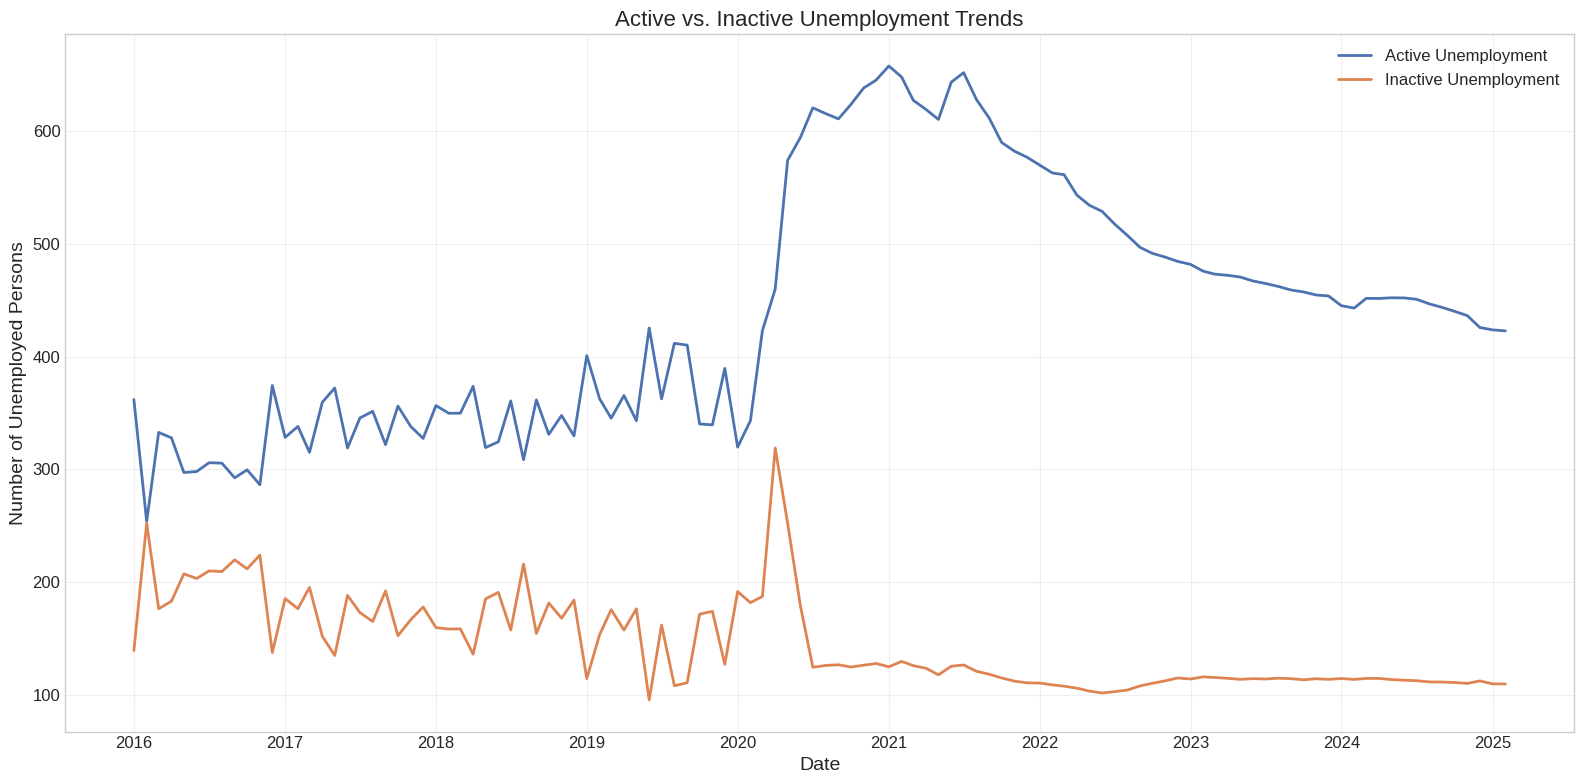

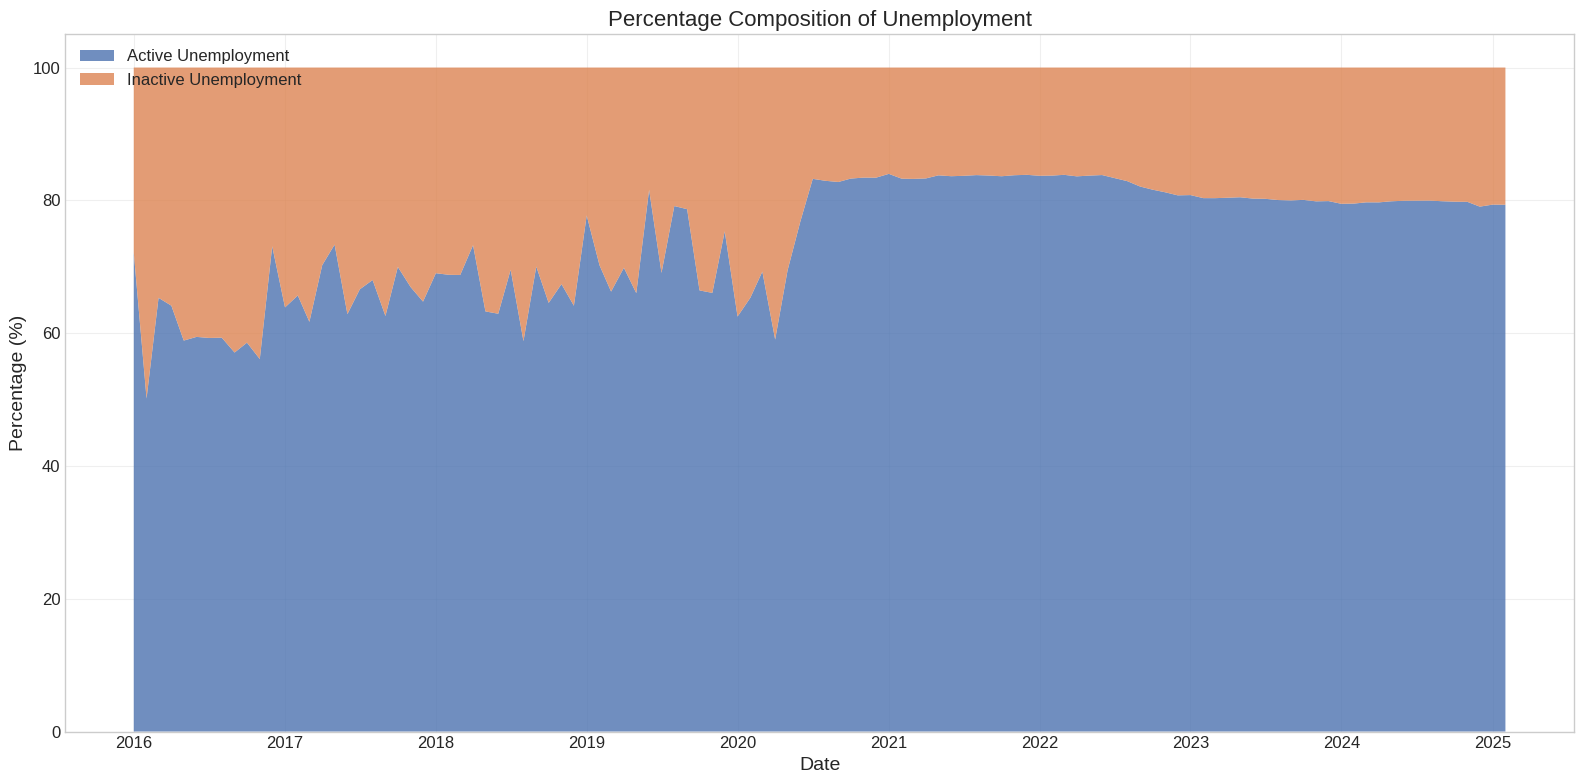

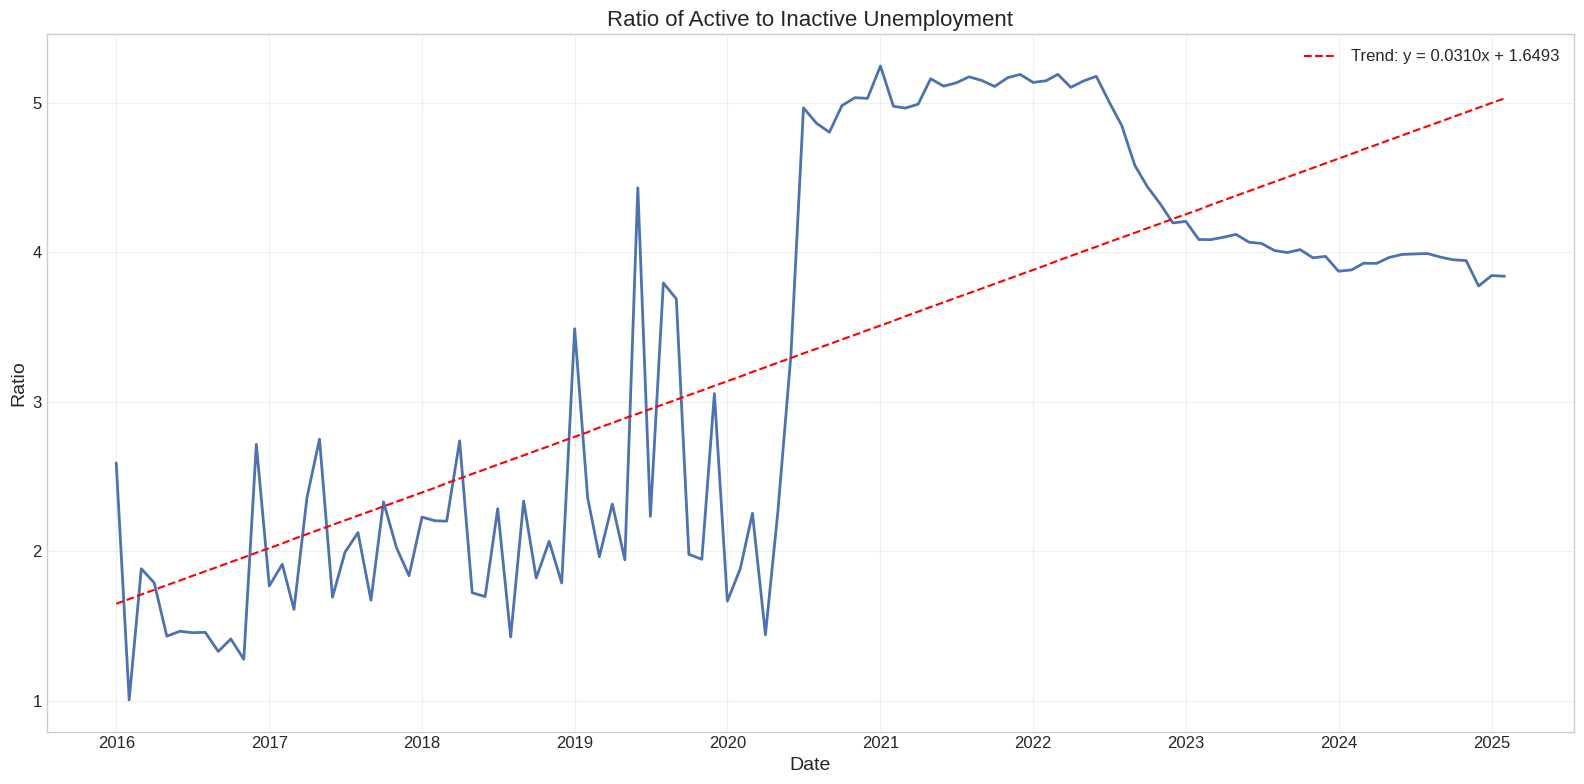

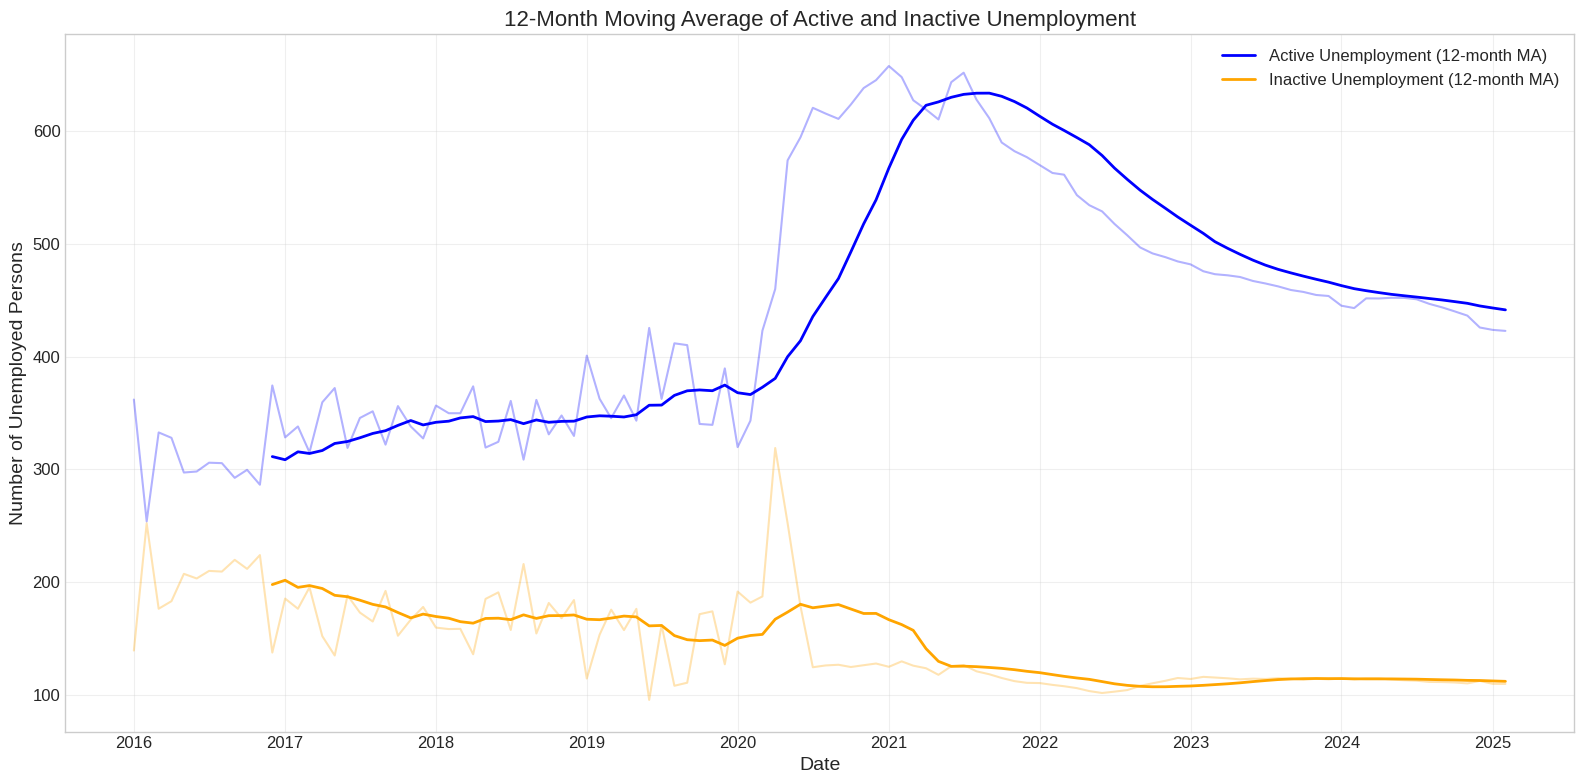

In [ ]:
if 'active_pct' in active_inactive_df.columns:
    # Plot the trends of active and inactive unemployment
    plt.figure(figsize=(16, 8))

    plt.plot(active_inactive_df['date'], active_inactive_df['unemployed_active'],
             label='Active Unemployment', linewidth=2)
    plt.plot(active_inactive_df['date'], active_inactive_df['unemployed_inactive'],
             label='Inactive Unemployment', linewidth=2)

    plt.title('Active vs. Inactive Unemployment Trends', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Number of Unemployed Persons', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Plot percentage composition
    plt.figure(figsize=(16, 8))

    plt.stackplot(active_inactive_df['date'],
                 active_inactive_df['active_pct'],
                 active_inactive_df['inactive_pct'],
                 labels=['Active Unemployment', 'Inactive Unemployment'],
                 alpha=0.8)

    plt.title('Percentage Composition of Unemployment', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Percentage (%)', fontsize=14)
    plt.legend(loc='upper left', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Calculate and plot the ratio of active to inactive unemployment
    active_inactive_df['active_to_inactive_ratio'] = active_inactive_df['unemployed_active'] / active_inactive_df['unemployed_inactive']

    plt.figure(figsize=(16, 8))

    plt.plot(active_inactive_df['date'], active_inactive_df['active_to_inactive_ratio'], linewidth=2)

    # Add a trend line
    z = np.polyfit(range(len(active_inactive_df)), active_inactive_df['active_to_inactive_ratio'], 1)
    p = np.poly1d(z)
    plt.plot(active_inactive_df['date'], p(range(len(active_inactive_df))),
             linestyle='--', color='r', label=f'Trend: y = {z[0]:.4f}x + {z[1]:.4f}')

    plt.title('Ratio of Active to Inactive Unemployment', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Ratio', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Calculate 12-month moving average to identify underlying trends
    active_inactive_df['active_ma'] = active_inactive_df['unemployed_active'].rolling(window=12).mean()
    active_inactive_df['inactive_ma'] = active_inactive_df['unemployed_inactive'].rolling(window=12).mean()

    plt.figure(figsize=(16, 8))

    plt.plot(active_inactive_df['date'], active_inactive_df['unemployed_active'],
             alpha=0.3, color='blue')
    plt.plot(active_inactive_df['date'], active_inactive_df['active_ma'],
             label='Active Unemployment (12-month MA)', linewidth=2, color='blue')

    plt.plot(active_inactive_df['date'], active_inactive_df['unemployed_inactive'],
             alpha=0.3, color='orange')
    plt.plot(active_inactive_df['date'], active_inactive_df['inactive_ma'],
             label='Inactive Unemployment (12-month MA)', linewidth=2, color='orange')

    plt.title('12-Month Moving Average of Active and Inactive Unemployment', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Number of Unemployed Persons', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Required columns for active vs. inactive unemployment trend analysis not found.")

### Cross metrics analaysis

In [ ]:
# Starting with main labor force data
cross_metrics_df = lfs_month[['date', 'u_rate', 'p_rate', 'ep_ratio']].copy() if all(col in lfs_month.columns for col in ['date', 'u_rate', 'p_rate', 'ep_ratio']) else pd.DataFrame()

if not cross_metrics_df.empty:
    # Add youth unemployment data from 2016
    if 'u_rate_15_24' in lfs_month_youth.columns:
        youth_df = lfs_month_youth[['date', 'u_rate_15_24']].copy()
        cross_metrics_df = pd.merge(cross_metrics_df, youth_df, on='date', how='outer')

    # Add unemployment duration data 2016
    if all(col in lfs_month_duration.columns for col in ['date', 'unemployed_active_long', 'unemployed_active']):
        duration_df = lfs_month_duration[['date', 'unemployed_active_long', 'unemployed_active']].copy()
        duration_df['long_term_pct'] = duration_df['unemployed_active_long'] / duration_df['unemployed_active'] * 100
        cross_metrics_df = pd.merge(cross_metrics_df, duration_df[['date', 'long_term_pct']], on='date', how='outer')

    # Add employment structure status from 2016
    if all(col in lfs_month_status.columns for col in ['date', 'employed_employee', 'employed']):
        structure_df = lfs_month_status[['date', 'employed_employee', 'employed']].copy()
        structure_df['employee_pct'] = structure_df['employed_employee'] / structure_df['employed'] * 100
        cross_metrics_df = pd.merge(cross_metrics_df, structure_df[['date', 'employee_pct']], on='date', how='outer')

    # Add active unemployment percentage 
    if all(col in active_inactive_df.columns for col in ['date', 'active_pct']):
        cross_metrics_df = pd.merge(cross_metrics_df, active_inactive_df[['date', 'active_pct']], on='date', how='outer')

    # Sort by date
    cross_metrics_df = cross_metrics_df.sort_values('date')

    print(f"Cross-metrics dataset created with shape: {cross_metrics_df.shape}")
    print(f"Columns available: {cross_metrics_df.columns.tolist()}")
else:
    print("Not enough data available to create cross-metrics dataset.")

Cross-metrics dataset created with shape: (292, 8)
Columns available: ['date', 'u_rate', 'p_rate', 'ep_ratio', 'u_rate_15_24', 'long_term_pct', 'employee_pct', 'active_pct']


### Comprehensive Correlation Analysis Across Key Metrics

Original dataframe shape: (292, 8)
Original columns: ['date', 'u_rate', 'p_rate', 'ep_ratio', 'u_rate_15_24', 'long_term_pct', 'employee_pct', 'active_pct']

Missing values by column:
date              0
u_rate            0
p_rate            0
ep_ratio          0
u_rate_15_24     72
long_term_pct    72
employee_pct     72
active_pct       72
dtype: int64

Numeric columns for correlation: ['u_rate', 'p_rate', 'ep_ratio', 'u_rate_15_24', 'long_term_pct', 'employee_pct', 'active_pct']

Missing value rates:
u_rate           0.000000
p_rate           0.000000
ep_ratio         0.000000
u_rate_15_24     0.246575
long_term_pct    0.246575
employee_pct     0.246575
active_pct       0.246575
dtype: float64
Filling missing values in u_rate_15_24 with column mean
Filling missing values in long_term_pct with column mean
Filling missing values in employee_pct with column mean
Filling missing values in active_pct with column mean

Total missing values after filling: 0

Calculating correlation matrix.

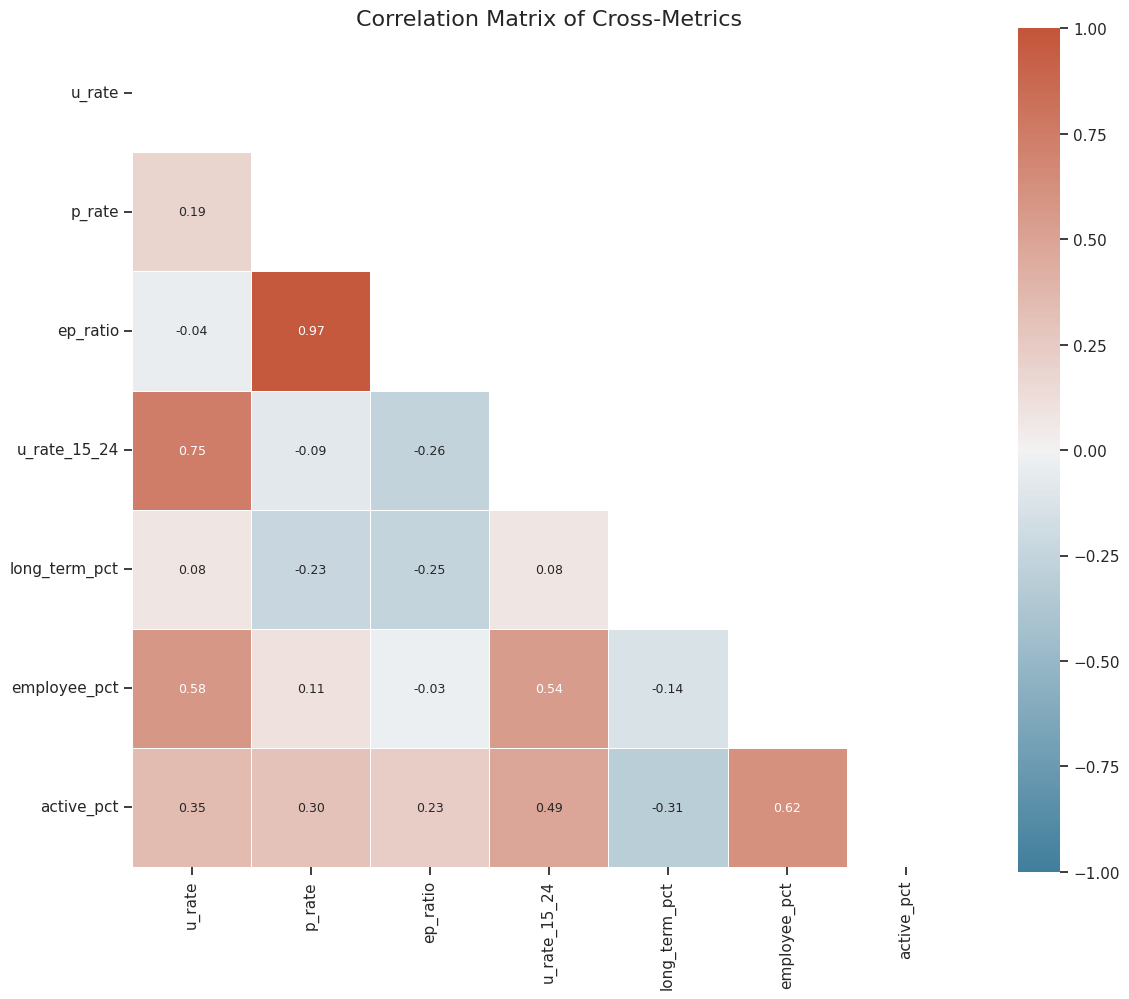


Top 3 Positive Correlations:


Variable 1    Variable 2  Correlation  Abs Correlation
6         p_rate      ep_ratio     0.972570         0.972570
2         u_rate  u_rate_15_24     0.749109         0.749109
20  employee_pct    active_pct     0.618805         0.618805


Top 3 Negative Correlations:


Variable 1     Variable 2  Correlation  Abs Correlation
19  long_term_pct     active_pct    -0.305753         0.305753
11       ep_ratio   u_rate_15_24    -0.262950         0.262950
12       ep_ratio  long_term_pct    -0.250414         0.250414


Visualizing top correlations:

Top positive correlation: p_rate vs ep_ratio (r = 0.97)


<Figure size 1000x600 with 0 Axes>

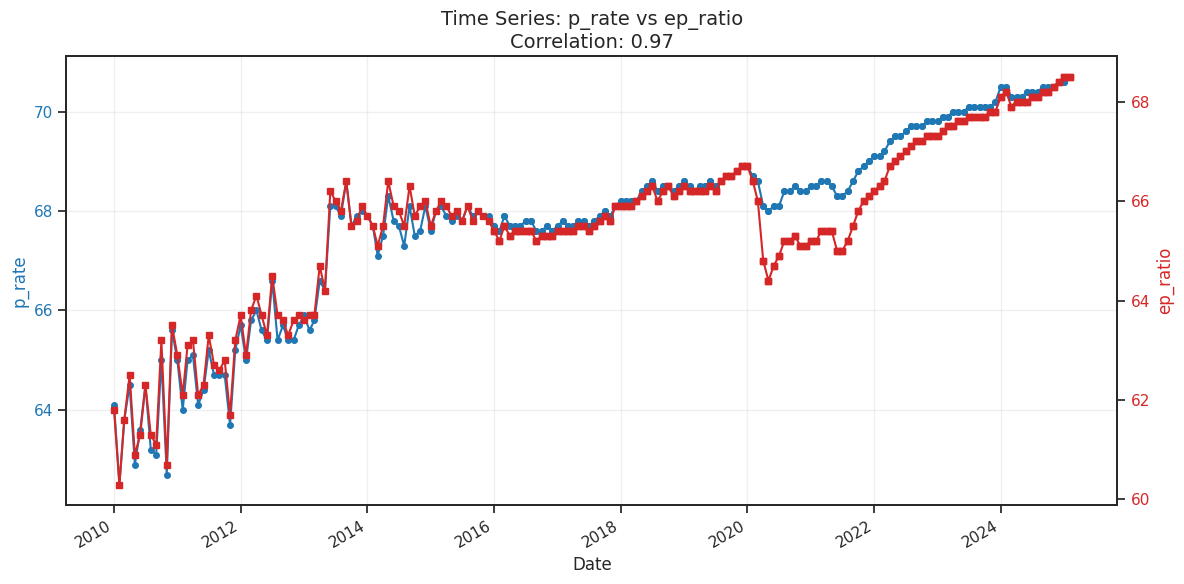

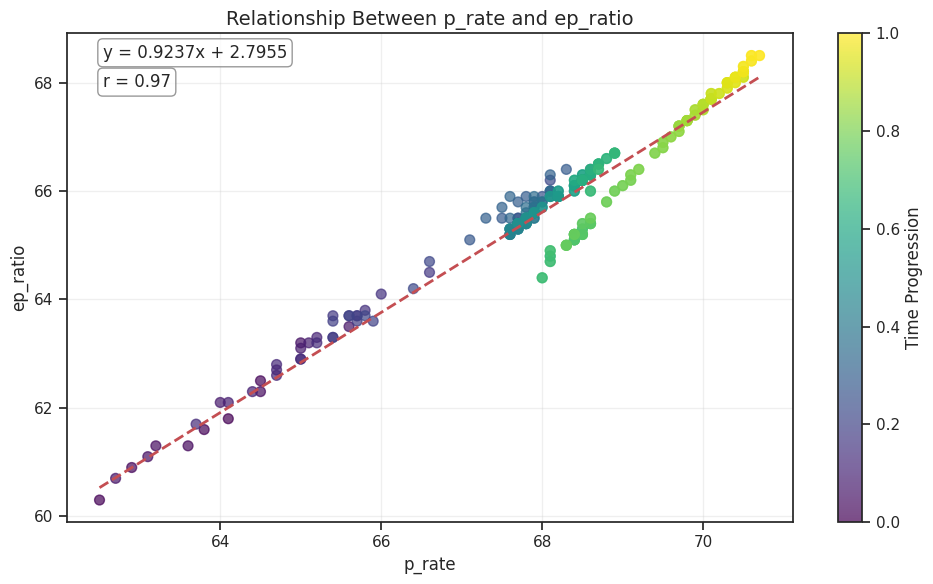


Top negative correlation: long_term_pct vs active_pct (r = -0.31)


<Figure size 1000x600 with 0 Axes>

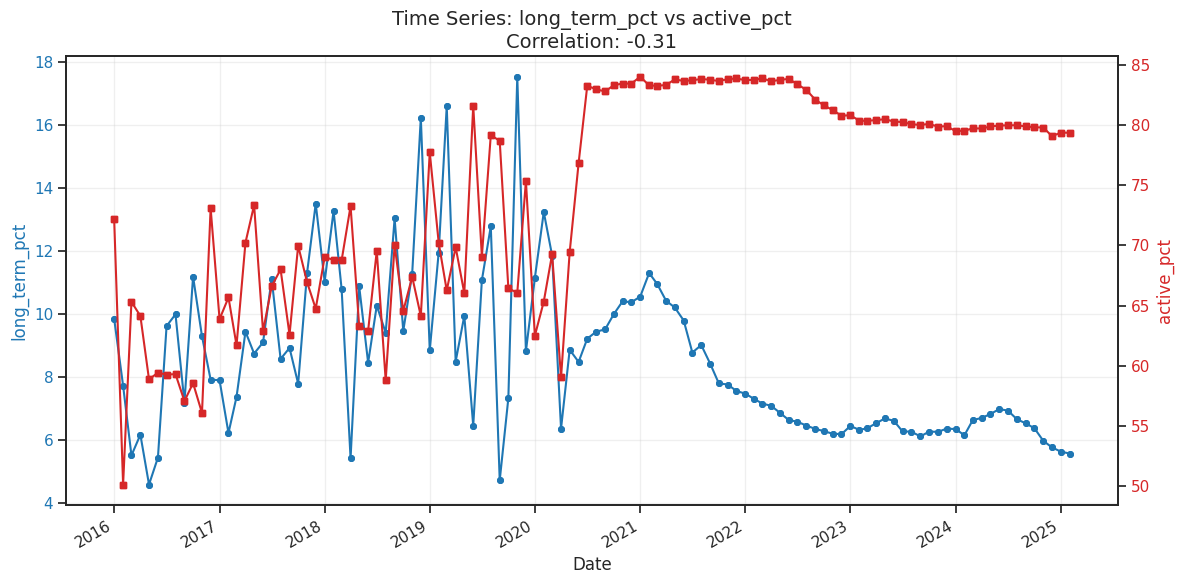

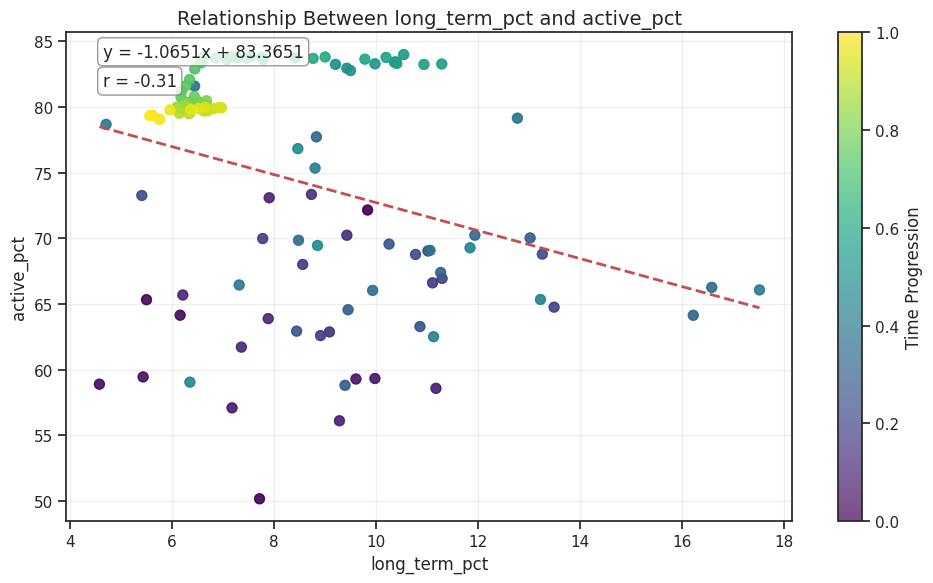

In [ ]:
if 'cross_metrics_df' in locals() and not cross_metrics_df.empty:
    df = cross_metrics_df.copy()

    # Display basic information
    print(f"Original dataframe shape: {df.shape}")
    print(f"Original columns: {df.columns.tolist()}")
    print("\nMissing values by column:")
    print(df.isnull().sum())

    # Select only numeric columns for correlation analysis
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    print(f"\nNumeric columns for correlation: {numeric_cols}")

    # Check for columns with too many missing values
    missing_rates = df[numeric_cols].isnull().mean()
    print("\nMissing value rates:")
    print(missing_rates)

    # Create a dataframe with only the relevant columns
    corr_df = df[numeric_cols].copy()

    # Fill missing values with column means to ensure complete matrix
    for col in corr_df.columns:
        if corr_df[col].isnull().any():
            print(f"Filling missing values in {col} with column mean")
            corr_df[col] = corr_df[col].fillna(corr_df[col].mean())

    # Verify we have no missing values
    missing_after = corr_df.isnull().sum().sum()
    print(f"\nTotal missing values after filling: {missing_after}")

    # Calculate correlation matrix
    print("\nCalculating correlation matrix...")
    corr_matrix = corr_df.corr()

    # Check if the matrix has any missing values
    if corr_matrix.isnull().any().any():
        print("Warning: Correlation matrix still has missing values!")
        print(corr_matrix.isnull().sum())

        # Further fix - replace any remaining NaNs with 0
        corr_matrix = corr_matrix.fillna(0)
        print("Filling remaining NaNs with 0")

    # Create the heatmap
    plt.figure(figsize=(12, 10))

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Create a custom colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap
    sns.heatmap(
        corr_matrix,
        mask=mask,
        cmap=cmap,
        vmax=1,
        vmin=-1,
        center=0,
        square=True,
        linewidths=.5,
        annot=True,
        fmt=".2f",
        annot_kws={"size": 9}
    )

    plt.title('Correlation Matrix of Cross-Metrics', fontsize=16)
    plt.tight_layout()
    plt.show()

    # Find the strongest correlations (positive and negative)
    corr_pairs = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):  
            corr_pairs.append({
                'Variable 1': corr_matrix.columns[i],
                'Variable 2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j],
                'Abs Correlation': abs(corr_matrix.iloc[i, j])
            })

    # Sort and display
    corr_pairs_df = pd.DataFrame(corr_pairs)

    # Top positive correlations
    top_pos = corr_pairs_df[corr_pairs_df['Correlation'] > 0].sort_values('Correlation', ascending=False).head(3)
    print("\nTop 3 Positive Correlations:")
    display(top_pos)

    # Top negative correlations
    top_neg = corr_pairs_df[corr_pairs_df['Correlation'] < 0].sort_values('Correlation', ascending=True).head(3)
    print("\nTop 3 Negative Correlations:")
    display(top_neg)

    # Create visualization for top correlations
    def plot_correlation(var1, var2, correlation):
        plt.figure(figsize=(10, 6))

        # Ensure we have the data and it's not missing
        if var1 in df.columns and var2 in df.columns:
            # Drop rows where either variable is missing
            plot_data = df[['date', var1, var2]].dropna()

            if len(plot_data) > 5:  
                plot_data['date'] = pd.to_datetime(plot_data['date'])

                # Sort by date
                plot_data = plot_data.sort_values('date')

                # Get min and max for normalization
                min1, max1 = plot_data[var1].min(), plot_data[var1].max()
                min2, max2 = plot_data[var2].min(), plot_data[var2].max()

                # Create primary y-axis
                fig, ax1 = plt.subplots(figsize=(12, 6))

                # Plot first variable
                color1 = 'tab:blue'
                ax1.set_xlabel('Date', fontsize=12)
                ax1.set_ylabel(var1, color=color1, fontsize=12)
                ax1.plot(plot_data['date'], plot_data[var1], color=color1, marker='o', markersize=4)
                ax1.tick_params(axis='y', labelcolor=color1)

                # Create secondary y-axis
                ax2 = ax1.twinx()
                color2 = 'tab:red'
                ax2.set_ylabel(var2, color=color2, fontsize=12)
                ax2.plot(plot_data['date'], plot_data[var2], color=color2, marker='s', markersize=4)
                ax2.tick_params(axis='y', labelcolor=color2)

                # Add a title with correlation value
                plt.title(f'Time Series: {var1} vs {var2}\nCorrelation: {correlation:.2f}', fontsize=14)

                # Add a grid
                ax1.grid(True, alpha=0.3)

                # Format x-axis dates
                fig.autofmt_xdate()

                plt.tight_layout()
                plt.show()

                # Create scatter plot
                plt.figure(figsize=(10, 6))

                # Create colors based on date for time progression
                dates = plot_data['date']
                norm_dates = (dates - dates.min()) / (dates.max() - dates.min())

                # Create scatter plot
                sc = plt.scatter(
                    plot_data[var1],
                    plot_data[var2],
                    c=norm_dates,
                    cmap='viridis',
                    alpha=0.7,
                    s=50
                )

                # Add a colorbar for dates
                cbar = plt.colorbar(sc)
                cbar.set_label('Time Progression')

                # Add a trendline
                z = np.polyfit(plot_data[var1], plot_data[var2], 1)
                p = np.poly1d(z)
                x_range = np.linspace(min1, max1, 100)
                plt.plot(x_range, p(x_range), 'r--', linewidth=2)

                # Add equation of trendline
                plt.annotate(f'y = {z[0]:.4f}x + {z[1]:.4f}',
                             xy=(0.05, 0.95),
                             xycoords='axes fraction',
                             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

                # Add correlation coefficient
                plt.annotate(f'r = {correlation:.2f}',
                             xy=(0.05, 0.89),
                             xycoords='axes fraction',
                             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

                # Add labels and title
                plt.xlabel(var1, fontsize=12)
                plt.ylabel(var2, fontsize=12)
                plt.title(f'Relationship Between {var1} and {var2}', fontsize=14)
                plt.grid(True, alpha=0.3)
                plt.tight_layout()
                plt.show()
            else:
                print(f"Not enough data points for {var1} vs {var2}")
        else:
            print(f"One or both variables ({var1}, {var2}) not found in dataframe")

    # Plot top positive and negative correlations
    print("\nVisualizing top correlations:")

    # Plot top positive correlation
    if len(top_pos) > 0:
        var1 = top_pos.iloc[0]['Variable 1']
        var2 = top_pos.iloc[0]['Variable 2']
        corr = top_pos.iloc[0]['Correlation']
        print(f"\nTop positive correlation: {var1} vs {var2} (r = {corr:.2f})")
        plot_correlation(var1, var2, corr)

    # Plot top negative correlation
    if len(top_neg) > 0:
        var1 = top_neg.iloc[0]['Variable 1']
        var2 = top_neg.iloc[0]['Variable 2']
        corr = top_neg.iloc[0]['Correlation']
        print(f"\nTop negative correlation: {var1} vs {var2} (r = {corr:.2f})")
        plot_correlation(var1, var2, corr)
else:
    print("Cross metrics dataframe not available or empty")